In [1]:
import cv2 as cv
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import seaborn as sns
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
import re
import time
from sklearn import decomposition, manifold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as shc
pd.set_option('display.max_columns', None)
%matplotlib inline
# Libraries for CNN part
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import decode_predictions
from keras import Input
from keras import Model

## **I) Exploring our CSV file**

### Reading file and first explorations

In [2]:
df_data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
df_data

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [4]:
df_data['uniq_id'].duplicated().sum()

0

In [5]:
df_data['product_url'].duplicated().sum()

0

--> all articles have unique id and photo url<br/>
--> let's try to create a function to find the main category of an item

In [6]:
def main_cat_find(text_cat_tree):
    ''' Function to find the main category of a product, product_category_tree list should be the input
    the function separate words with << and then find the first words with regular expression
    it returns the first category'''

    text = text_cat_tree
    text = re.findall(r'\w+', text.lower().split(sep='>>')[0])
    text = '_'.join(text)
    return text

In [7]:
df_data['main_category'] = df_data['product_category_tree'].apply(
    main_cat_find)
df_data

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

--> let's evaluate the main categories of our product

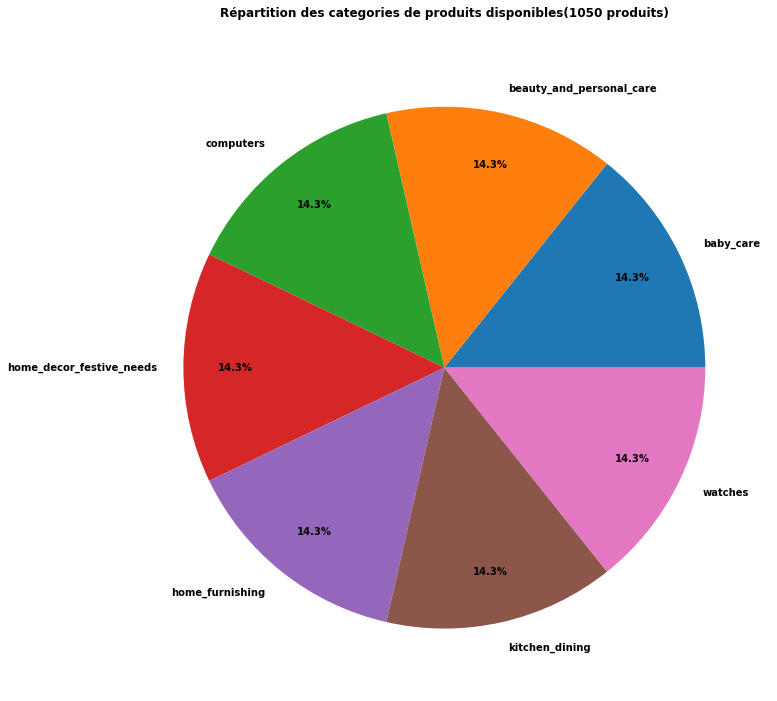

In [8]:
figure0 = plt.figure(figsize=(15, 12), facecolor='w')
x = df_data['main_category'].value_counts().sort_index()
plt.title(
    f'Répartition des categories de produits disponibles({x.sum()} produits)', pad=25, fontweight='bold')
plt.axis('off')
expl = [0 if i/x.sum() > 0.02 else 0.8 for i in x]
plt.pie(x, labels=[i for i in x.index], autopct="%.1f%%", pctdistance=0.8,
        explode=expl, textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.show()

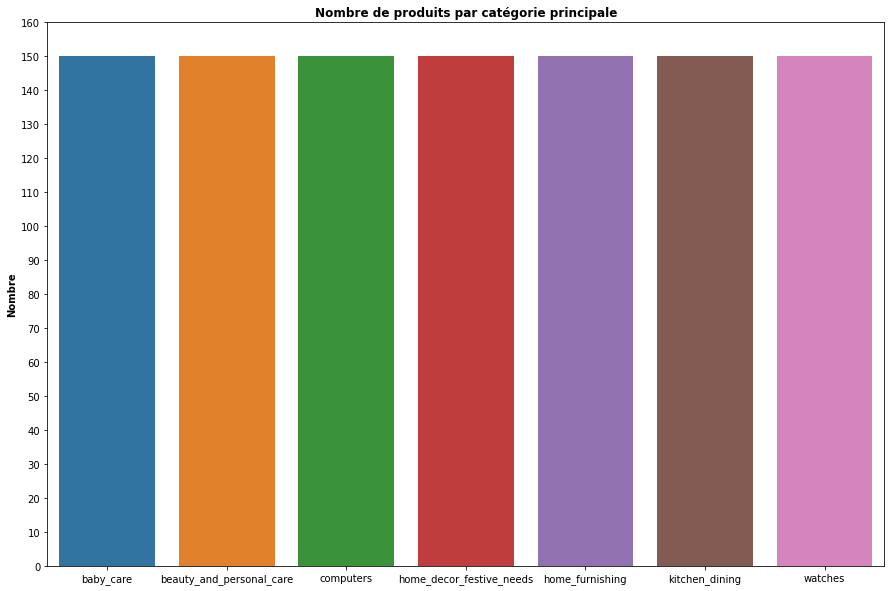

In [9]:
figure_1 = plt.figure(figsize=(15,10))
plt.title('Nombre de produits par catégorie principale', fontweight='bold')
sns.barplot(x = df_data['main_category'].value_counts().sort_index().index, 
            y = df_data['main_category'].value_counts().sort_index())
plt.yticks(range(0,170,10))
plt.ylabel( 'Nombre',fontweight = 'bold')
# plt.savefig('Répartition_des_produits_par_catégorie.jpg', dpi=300, bbox_inches='tight')
plt.show()

--> In each main categories we have the same number of articles (150)

## **II) Description Text**

### **Getting article id and description associeted to create our corpus**

In [10]:
df_data_text = df_data[['uniq_id', 'description', 'main_category']].copy()
df_data_text['description']

0       Key Features of Elegance Polyester Multicolor ...
1       Specifications of Sathiyas Cotton Bath Towel (...
2       Key Features of Eurospa Cotton Terry Face Towe...
3       Key Features of SANTOSH ROYAL FASHION Cotton P...
4       Key Features of Jaipur Print Cotton Floral Kin...
                              ...                        
1045    Oren Empower Extra Large Self Adhesive Sticker...
1046    Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048    Buy Wallmantra Medium Vinyl Sticker Sticker fo...
1049    Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...
Name: description, Length: 1050, dtype: object

### **Preprocessing text to get tokens and create bag of words / tf_idf features**

In [11]:
# Getting words and remove numerical data
test = df_data_text['description'][0]
tokenizer = nltk.RegexpTokenizer(r'[A-Za-z]+')
tok_test = tokenizer.tokenize(test.lower())
print(f'Description brute ({len(test)} caractères): {test} \n ************************************************')
print(f'Après Tokenisation ({len(tok_test)} mots): {tok_test}')

Description brute (1420 caractères): Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly fi

In [12]:
# Lemmatization
lemmatizer = nltk.stem.WordNetLemmatizer()
lem_test = [lemmatizer.lemmatize(token) for token in tok_test]

# Stemming
stemmer = nltk.stem.snowball.EnglishStemmer()
stem_test = [stemmer.stem(token) for token in lem_test]

In [13]:
print(f'Exemple Stemming ({len(stem_test)} mots): {stem_test} \n ************************************************')
print(f'Exemple Lemmatisation ({len(lem_test)} mots): {lem_test}')

Exemple Stemming (226 mots): ['key', 'featur', 'of', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'cm', 'in', 'height', 'pack', 'of', 'price', 'r', 'this', 'curtain', 'enhanc', 'the', 'look', 'of', 'the', 'interior', 'this', 'curtain', 'is', 'made', 'from', 'high', 'qualiti', 'polyest', 'fabric', 'it', 'featur', 'an', 'eyelet', 'style', 'stitch', 'with', 'metal', 'ring', 'it', 'make', 'the', 'room', 'environ', 'romant', 'and', 'love', 'this', 'curtain', 'is', 'ant', 'wrinkl', 'and', 'anti', 'shrinkag', 'and', 'have', 'eleg', 'appar', 'give', 'your', 'home', 'a', 'bright', 'and', 'modernist', 'appeal', 'with', 'these', 'design', 'the', 'surreal', 'attent', 'is', 'sure', 'to', 'steal', 'heart', 'these', 'contemporari', 'eyelet', 'and', 'valanc', 'curtain', 'slide', 'smooth', 'so', 'when', 'you', 'draw', 'them', 'apart', 'first', 'thing', 'in', 'the', 'morn', 'to', '

--> We choose to keep stemming. Not sure of the vocabulary of the lemmatisation. Keep it simple for a first time

In [14]:
# Create stop-words
defaultsw = nltk.corpus.stopwords.words('english')
freq_total = nltk.Counter()

for desc in df_data_text['description']:
    tokenizer = nltk.RegexpTokenizer(r'[A-Za-z]+')
    tokens = tokenizer.tokenize(desc.lower())
    freq_total += nltk.FreqDist(tokens)

stop_words_txt = freq_total.most_common(30)
stop_words_txt = [a[0] for a in stop_words_txt]
sw = set()
sw.update(stop_words_txt)
sw.update(tuple(defaultsw))
sw = list(sw)

In [15]:
len(sw)

194

--> we choose to use only stemmer and not lemmatization (not sure of our base for lemmatization)

In [16]:
# Create function to tokenize and stemming
def tokenizer_stem_sw(text, stopwords):
    '''This function tokenize a single text (str) apply stemming to tokens and remove stopwords
    It returns the new list of tokens. NLTK library is needed!!. Text is lower!'''
    # Tokenization
    tokenizer = nltk.RegexpTokenizer(r'[A-Za-z]+')
    tokens = tokenizer.tokenize(text.lower())
    # Stemming and stopwords removing
    stemmer = nltk.stem.snowball.EnglishStemmer()
    stem_tokens = [stemmer.stem(tok) for tok in tokens if tok not in stopwords]

    return stem_tokens

In [17]:
# Testing our function on the first description
test_post_treatment = tokenizer_stem_sw(test, stopwords=sw)
print(f'Dictionnaire de mots courants ({len(sw)} mots): {sw} \n ************************************************')
print(f'Après stemming ({len(test_post_treatment)} mots): {test_post_treatment}')

Dictionnaire de mots courants (194 mots): ['been', 'off', 'any', 'do', 'too', "you'll", 'll', 'cash', "mightn't", 'couldn', "needn't", "didn't", 'day', 'yours', 'yourself', 'how', "that'll", 'we', 'own', 've', 'hasn', 'each', 'no', 'nor', "you'd", "won't", 'me', 'he', 'during', 'with', 'at', 'her', "you're", 'their', 'them', 'didn', 'not', 'were', 'she', "she's", "it's", 'where', 'his', 'our', "wouldn't", 'on', "hadn't", 'am', 'against', 'shouldn', 'above', 'through', 'ma', "couldn't", 'these', 'both', 'does', 'so', 'shipping', "isn't", 'wasn', 'its', 'than', 'itself', 'had', "aren't", 'was', 'all', 'most', "don't", 'if', 'while', 'herself', 'there', "mustn't", 'delivery', 'out', 'doesn', 'what', 'before', 'ain', 'as', 'needn', 'those', 'same', 'you', 'replacement', "doesn't", "hasn't", 'it', 'genuine', 'be', 'because', 'just', 'then', 'free', 'down', 'him', 'doing', 'ours', 'only', 'o', 'a', 'cm', 'com', 'about', "shan't", 'online', 'who', 'which', 'y', 're', 'some', 'won', 'myself', 

In [18]:
# Testing if the function is properly working over all our descriptions
df_data_text['description_tokens'] = df_data_text['description'].apply(
    lambda x: tokenizer_stem_sw(x, stopwords=sw))

In [19]:
# Creating a bag of words for our descriptions
count_words = CountVectorizer(
    tokenizer=lambda text: tokenizer_stem_sw(text, stopwords=sw))
bow_features = count_words.fit_transform(df_data_text['description'])
bow_features.toarray().shape

(1050, 4079)

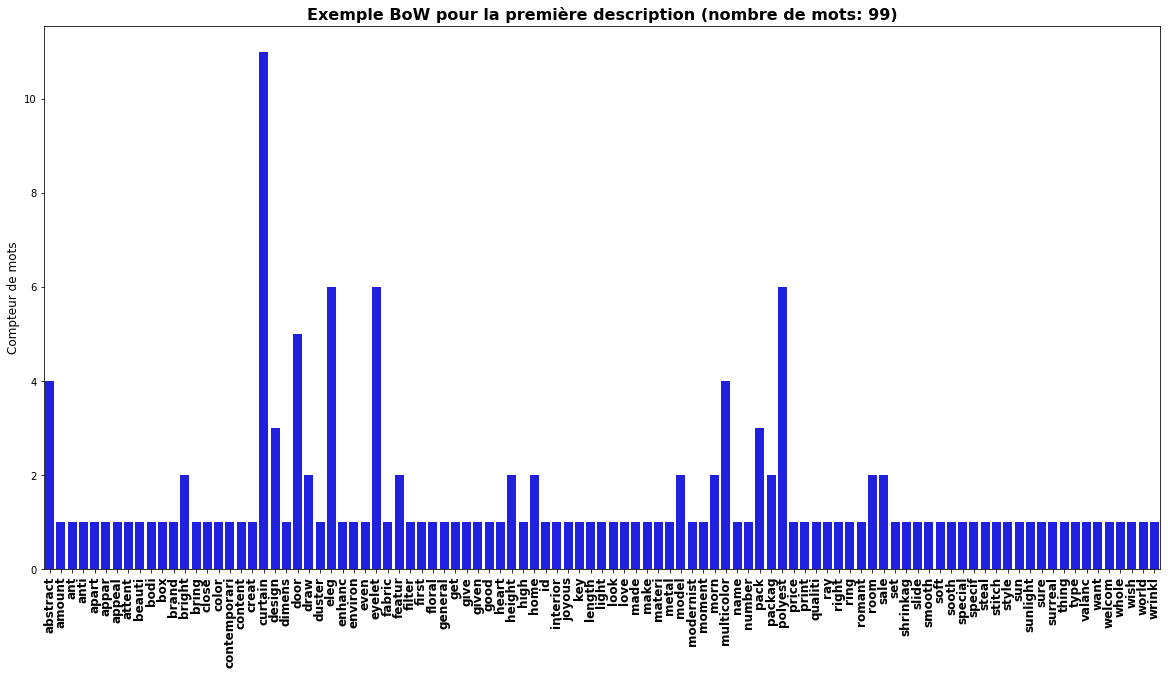

In [20]:
# Represent an example of bow feature
df_bow = pd.DataFrame(data = bow_features.toarray(), columns=count_words.get_feature_names())
example_bow = df_bow.iloc[0,:].copy()
example_bow = example_bow[example_bow != 0]
figure_2 = plt.figure(figsize=(20,10))
plt.title(f'Exemple BoW pour la première description (nombre de mots: {len(example_bow.index)})', fontweight = 'bold', fontsize=16)
sns.barplot(x = example_bow.index, y = example_bow.values, color='b')
plt.ylabel('Compteur de mots', fontsize=12)
plt.xticks(rotation=90, fontweight='bold', fontsize=12)
# plt.savefig('BoW exemple.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# Creating tf_idf for our descriptions
tf_idf = TfidfVectorizer(
    tokenizer=lambda text: tokenizer_stem_sw(text, stopwords=sw))
tf_idf_features = tf_idf.fit_transform(df_data_text['description'])
tf_idf_features.toarray().shape

(1050, 4079)

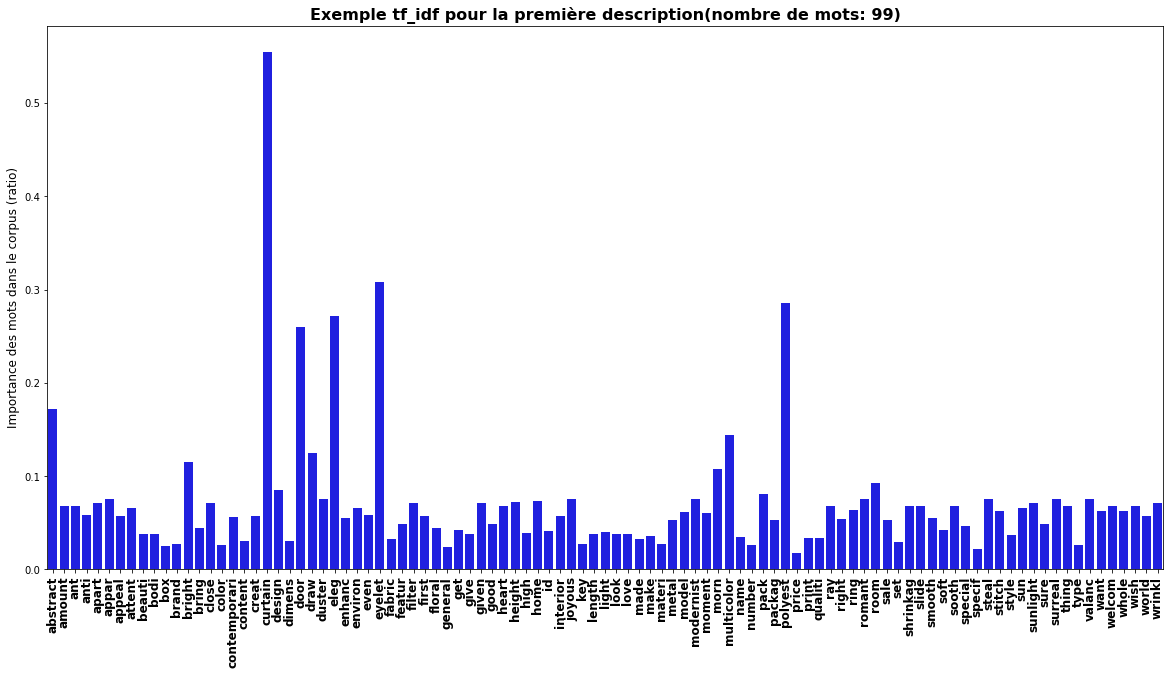

In [22]:
# Represent an example of tf_idf feature
df_tf_idf = pd.DataFrame(data = tf_idf_features.toarray(), columns=tf_idf.get_feature_names())
example_tf_idf = df_tf_idf.iloc[0,:].copy()
example_tf_idf = example_tf_idf[example_tf_idf != 0]
figure_3 = plt.figure(figsize=(20,10))
plt.title(f'Exemple tf_idf pour la première description(nombre de mots: {len(example_tf_idf.index)})', fontweight = 'bold', fontsize=16)
sns.barplot(x = example_tf_idf.index, y = example_tf_idf.values, color='b')
plt.ylabel('Importance des mots dans le corpus (ratio)', fontsize=12)
plt.xticks(rotation=90, fontweight='bold', fontsize=12)
# plt.savefig('Exemple tf_idf.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# NOT USED
# create numbers from main category for ploting legend
# def c_list_funct(str_labels_col):
#    list_labels = str_labels_col.copy()
#    count = 0
#    '''Function to attribute numbers to labels str
#    it returns the list of numbers for labels in datas
#    str labels should be a column of a dataframe'''
#    for element in str_labels_col.unique():
#        list_labels.loc[list_labels == element] = count
#        count += 1
#    return list_labels
# not used finally...

### **Visualization of our features**

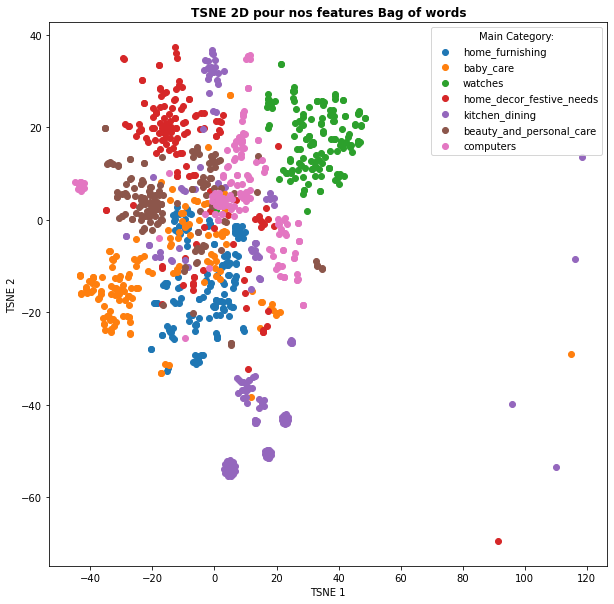

In [23]:
# Trying TSNE visualisation
tsne_red = manifold.TSNE(n_components=2, perplexity=30,
                         n_jobs=-1, random_state=0)
data_tsne_projected = tsne_red.fit_transform(bow_features.toarray())
figure_tsne = plt.figure(figsize=(10, 10))
plt.title('TSNE 2D pour nos features Bag of words',
          fontweight='bold')
for g in df_data_text['main_category'].unique():
    i = np.where(df_data_text['main_category'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Main Category:')
# plt.savefig('TSNE_Features_Bag_of_words_répartition_des_produits.jpg', dpi=300, bbox_inches='tight')
plt.show()

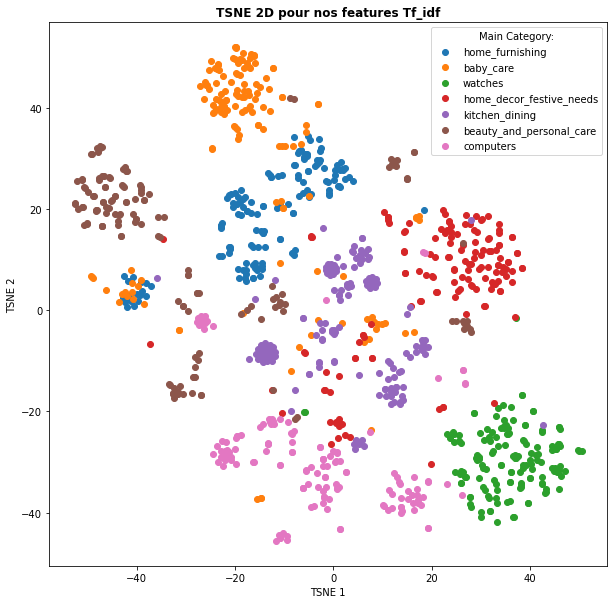

In [24]:
tsne_red = manifold.TSNE(n_components=2, perplexity=30,
                         n_jobs=-1, random_state=0)
data_tsne_projected = tsne_red.fit_transform(tf_idf_features.toarray())
figure_tsne = plt.figure(figsize=(10, 10))
plt.title('TSNE 2D pour nos features Tf_idf', fontweight='bold')
for g in df_data_text['main_category'].unique():
    i = np.where(df_data_text['main_category'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Main Category:')
plt.savefig('TSNE_Features_Tf_idf_répartition_des_produits.jpg', dpi=300, bbox_inches='tight')
plt.show()

PCA in 2 dimension explain  12.69 % of the variance of our input data


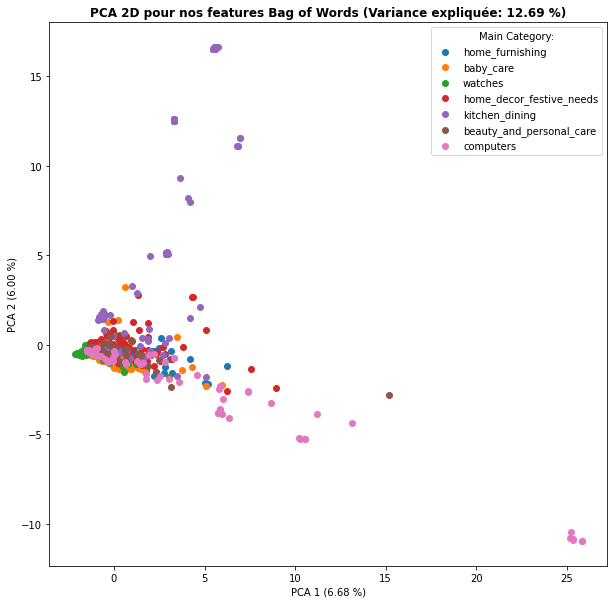

In [25]:
# Trying PCA and tSNE visualisations
pca_red = decomposition.PCA(n_components=2)
data_pca_projected = pca_red.fit_transform(bow_features.toarray())
print(
    f'PCA in 2 dimension explain {pca_red.explained_variance_ratio_.sum()*100: .2f} % of the variance of our input data')
figure_pca = plt.figure(figsize=(10, 10))
plt.title(f'PCA 2D pour nos features Bag of Words (Variance expliquée: {pca_red.explained_variance_ratio_.sum()*100:.2f} %)', fontweight='bold')
for g in df_data_text['main_category'].unique():
    i = np.where(df_data_text['main_category'] == g)
    plt.scatter(data_pca_projected[i, 0], data_pca_projected[i, 1], label=g)
plt.xlabel(f'PCA 1 ({pca_red.explained_variance_ratio_[0]*100:.2f} %)')
plt.ylabel(f'PCA 2 ({pca_red.explained_variance_ratio_[1]*100:.2f} %)')
plt.legend(title='Main Category:')
plt.show()

PCA in 2 dimension explain  4.98 % of the variance of our input data


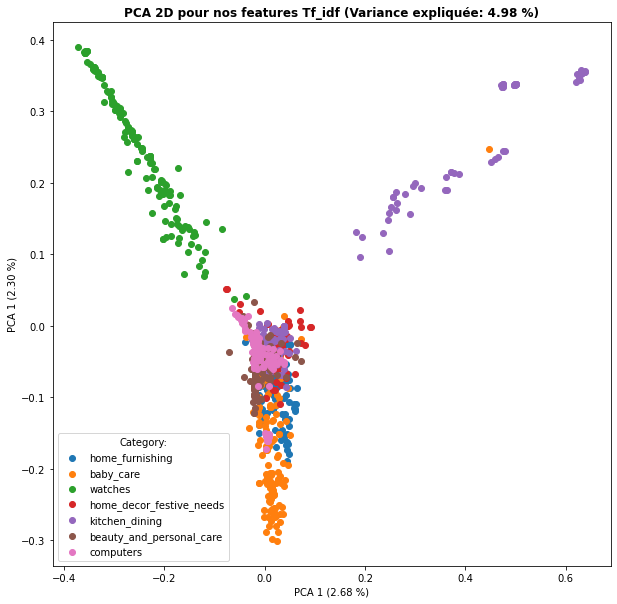

In [26]:
pca_red = decomposition.PCA(n_components=2)
data_pca_projected = pca_red.fit_transform(tf_idf_features.toarray())
print(
    f'PCA in 2 dimension explain {pca_red.explained_variance_ratio_.sum()*100: .2f} % of the variance of our input data')
figure_pca = plt.figure(figsize=(10, 10))
plt.title(f'PCA 2D pour nos features Tf_idf (Variance expliquée: {pca_red.explained_variance_ratio_.sum()*100:.2f} %)', fontweight='bold')
for g in df_data_text['main_category'].unique():
    i = np.where(df_data_text['main_category'] == g)
    plt.scatter(data_pca_projected[i, 0], data_pca_projected[i, 1], label=g)
plt.xlabel(f'PCA 1 ({pca_red.explained_variance_ratio_[0]*100:.2f} %)')
plt.ylabel(f'PCA 1 ({pca_red.explained_variance_ratio_[1]*100:.2f} %)')
plt.legend(title='Category:')
plt.show()

--> We have only 12% (bag of words) and 5%(tf_idf) of variance explained in 2 dimensions reduction...

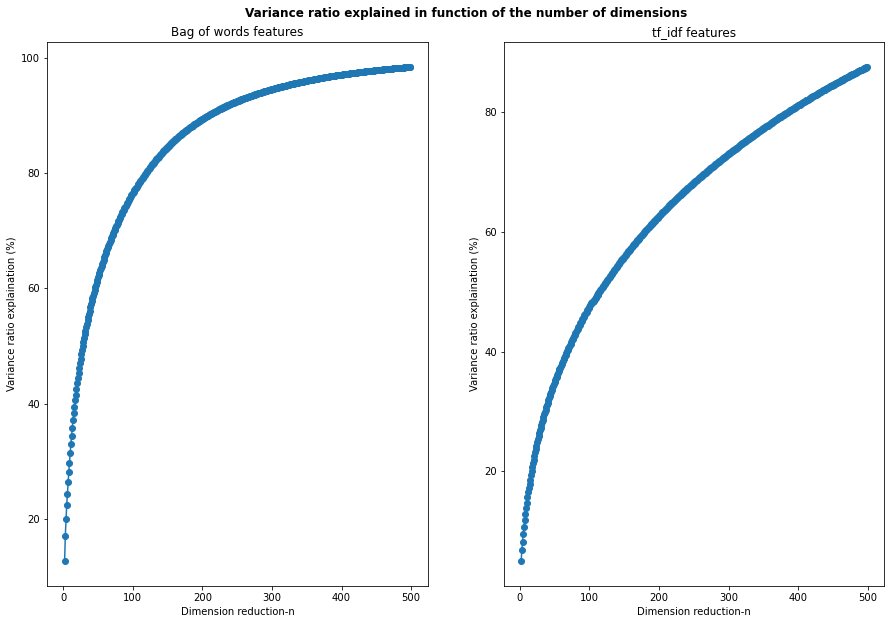

In [27]:
variance_expl_bow = list()
variance_expl_tf_idf = list()
# bow variance calcul
for n in range(2, 500):
    pca_red = decomposition.PCA(n_components=n)
    data_pca_projected = pca_red.fit_transform(bow_features.toarray())
    variance_expl_bow.append(pca_red.explained_variance_ratio_.sum()*100)
# tf_idf variance calcul
for n in range(2, 500):
    pca_red = decomposition.PCA(n_components=n)
    data_pca_projected = pca_red.fit_transform(tf_idf_features.toarray())
    variance_expl_tf_idf.append(pca_red.explained_variance_ratio_.sum()*100)

figure_PCA_variance = plt.figure(figsize=(15, 10))
plt.title('Variance ratio explained in function of the number of dimensions',
          fontweight='bold', pad=25)
plt.axis('off')
figure_PCA_variance.add_subplot(1, 2, 1)
plt.title('Bag of words features')
plt.plot(range(2, 500), variance_expl_bow, 'o-')
plt.xlabel('Dimension reduction-n')
plt.ylabel('Variance ratio explaination (%)')
figure_PCA_variance.add_subplot(1, 2, 2)
plt.title('tf_idf features')
plt.plot(range(2, 500), variance_expl_tf_idf, 'o-')
plt.xlabel('Dimension reduction-n')
plt.ylabel('Variance ratio explaination (%)')
plt.show()

### **Clustering with text features and comparison with real main categories**

#### Without dimension reduction Bag of words features<br/>
--> K_means no preprocessing on features

In [27]:
X = bow_features.toarray()
# We use a K_means with 7 cluster to compare with true categories
k_means7_model0 = KMeans(n_clusters=7, random_state = 4)  # init kmeans ++
k_means7_model0.fit(X)

KMeans(n_clusters=7, random_state=4)

In [28]:
def cluster_2D_TSNE_viz(data, cluster_model, savefig=False, comment=''):
    '''Function to represent in 2D cluster distribution via TSNE transformation
    manifold library should be imported
    comment --> use this to add specific comment to the name of the file if saved
    '''

    tsne_red = manifold.TSNE(
        n_components=2, perplexity=30, n_jobs=-1, random_state=0)
    data_tsne_projected = tsne_red.fit_transform(data)
    figure_tsne = plt.figure(figsize=(10, 10))
    plt.title(
        f'TSNE réduction 2D visualisation: {comment}', fontweight='bold')
    a = plt.scatter(data_tsne_projected[:, 0], data_tsne_projected[:, 1],
                    c=cluster_model.labels_, cmap='Set1')
    plt.legend(*a.legend_elements(), title='Clusters:')
    plt.xlabel('TSNE 1')
    plt.ylabel('TSNE 2')
    if savefig == True:
        plt.savefig(f'TSNE_2D_viz_cluster_model_{comment}.jpg', dpi=300)
    else:
        print('figure not saved')
    plt.show()

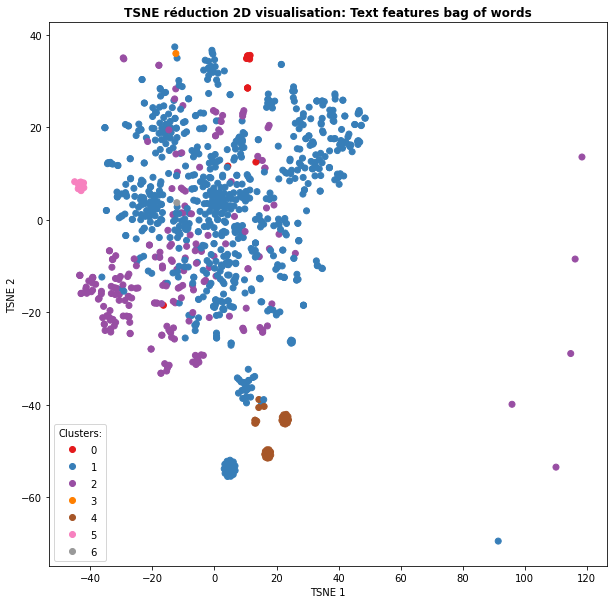

In [29]:
cluster_2D_TSNE_viz(X, k_means7_model0, savefig=True , comment='Text features bag of words')

--> Kmeans with preprocessing on our features (MinMax_scaler)

figure not saved


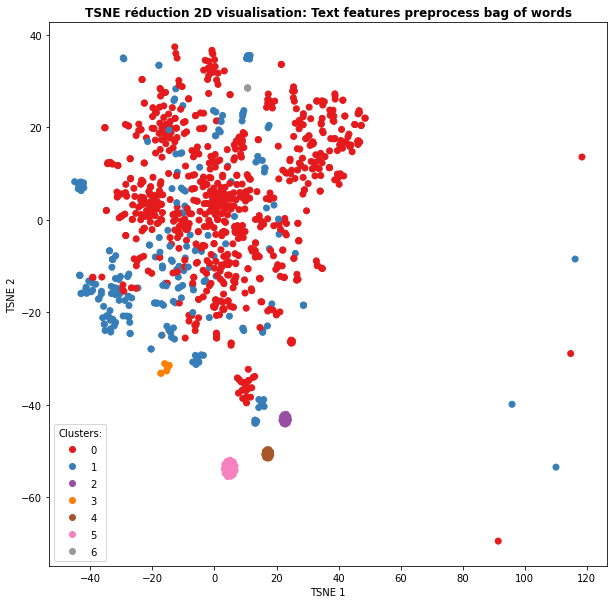

In [30]:
minmax_sc = MinMaxScaler()
minmax_sc.fit(X)
X_min_max = minmax_sc.transform(X)

k_means7_model1 = KMeans(n_clusters=7, random_state=4)  # init kmeans ++
k_means7_model1.fit(X_min_max)

cluster_2D_TSNE_viz(X, k_means7_model1,
                    comment='Text features preprocess bag of words')

K_means clustering stability

In [31]:
# Function to evaluate the stability of the cluster with ARI score
def K_means_stability(data_clustering, n_clusters, n_training):
    ''' Function to evaluate the stability of a K_means cluster at T, it uses 'k_means++' init method
    data_clustering --> numerical data to input to the algorithm should be standardized!
    n_clusters --> number of cluster of the K_means algorithm
    n_training --> number of different training to use
    It returns the ARI mean score between a reference algorithm 0 and all the other algorithm clustering and the labels from the first trained model'''

    cluster_labels = list()
    ARI_scores = list()

    kmeans_model_0 = KMeans(n_clusters=n_clusters)
    kmeans_model_0.fit(data_clustering)
    cluster_labels.append(kmeans_model_0.labels_)

    # loop to train several time the clustering
    for clusteri in range(1, n_training + 1):
        kmeans_model_i = KMeans(n_clusters=n_clusters)
        kmeans_model_i.fit(data_clustering)
        cluster_labels.append(kmeans_model_i.labels_)

    # loop for calculate each ARI scores
    for modeli in range(1, n_training + 1):
        ARI_scores.append(metrics.adjusted_rand_score(
            cluster_labels[0], cluster_labels[modeli]))
    mean_ARI = np.mean(ARI_scores)
    return mean_ARI

In [32]:
tab_result = pd.DataFrame(
    [], columns=['Model', 'Parameter_nb_cluster', 'Davies_bouldin_score', 'Silhouette_score', 'Cluster_stability', 'comment'])
# Function to add result to our dataframe results


def metrics_clusters_kmeans(data, nb_clusters, cluster_model, model_name, tab_result, comment=None):
    '''Function create a Series of metrics for a model input with its data
    You must enter model name, nb of cluster as str and the data used for the model'''
    row = pd.Series(data={'Model': model_name, 'Parameter_nb_cluster': nb_clusters, 'Davies_bouldin_score': metrics.davies_bouldin_score(
        data, cluster_model.labels_), 'Silhouette_score': metrics.silhouette_score(data, cluster_model.labels_),
        'Cluster_stability': K_means_stability(data, nb_clusters, 100), 'comment': comment}, name=len(tab_result))
    tab_result = tab_result.append(row)
    return tab_result

In [33]:
tab_result = metrics_clusters_kmeans(
    X, 7, k_means7_model0, 'K_means', tab_result, comment='raw features')
tab_result = metrics_clusters_kmeans(
    X_min_max, 7, k_means7_model1, 'K_means', tab_result, comment='features scaled minmax')
tab_result

Model Parameter_nb_cluster  Davies_bouldin_score  Silhouette_score  \
0  K_means                    7              1.962405          0.308543   
1  K_means                    7              2.335227          0.231764   

   Cluster_stability                 comment  
0           0.544823            raw features  
1           0.459923  features scaled minmax

--> DBSCAN no preprocessing on features

In [34]:
noise_list = list()
n_clusters_list = list()
# loop on epsilon
for epsi in np.arange(0.1, 20, 0.1):
    epsi = np.round(epsi, decimals=1)
    dbscan_model_0 = DBSCAN(eps=epsi, min_samples=3, n_jobs=-1)
    dbscan_model_0.fit(X)
    labels = dbscan_model_0.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_dbscan = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    # append n_cluster and n_noise to lists for epsi
    noise_list.append(n_noise)
    n_clusters_list.append(n_clusters_dbscan)

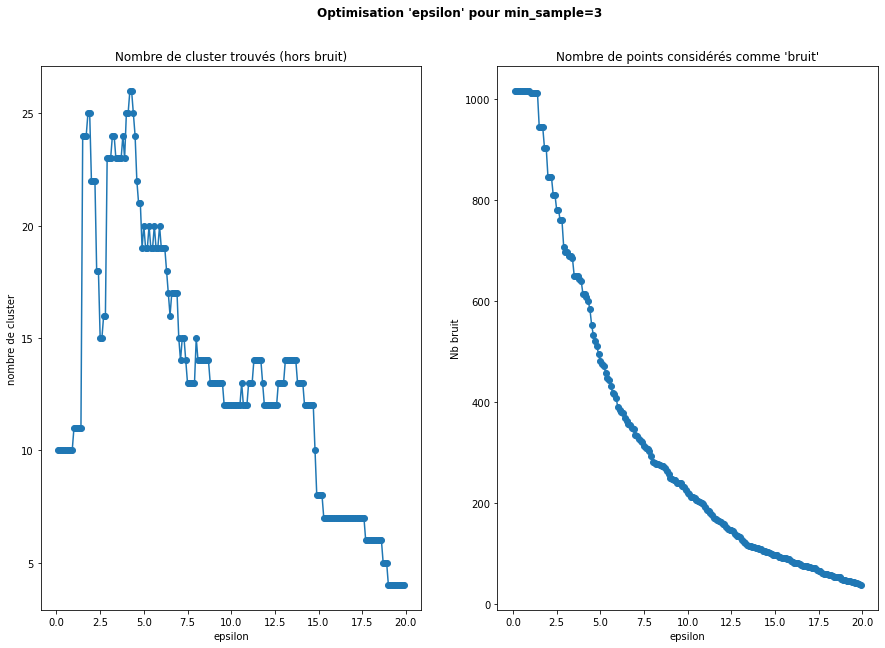

In [35]:
# Graph number of cluster and number of noise points for each epsi
figure_DBSCAN_opti = plt.figure(figsize=(15, 10))
plt.title("Optimisation 'epsilon' pour min_sample=3",
          fontweight='bold',  pad=50)
plt.axis('off')
figure_DBSCAN_opti.add_subplot(1, 2, 1)
plt.title('Nombre de cluster trouvés (hors bruit)')
plt.plot(np.arange(0.1, 20, 0.1), n_clusters_list, 'o-')
plt.xlabel('epsilon')
plt.ylabel('nombre de cluster')
figure_DBSCAN_opti.add_subplot(1, 2, 2)
plt.title("Nombre de points considérés comme 'bruit'")
plt.plot(np.arange(0.1, 20, 0.1), noise_list, 'o-')
plt.xlabel('epsilon')
plt.ylabel("Nb bruit")
#plt.savefig('DBSCAN_optimisation.jpg', dpi=300, bbox_inches='tight')
plt.show()

--> let's try epsilon = 17.4 and min sample = 3 we should have 7 clusters

figure not saved


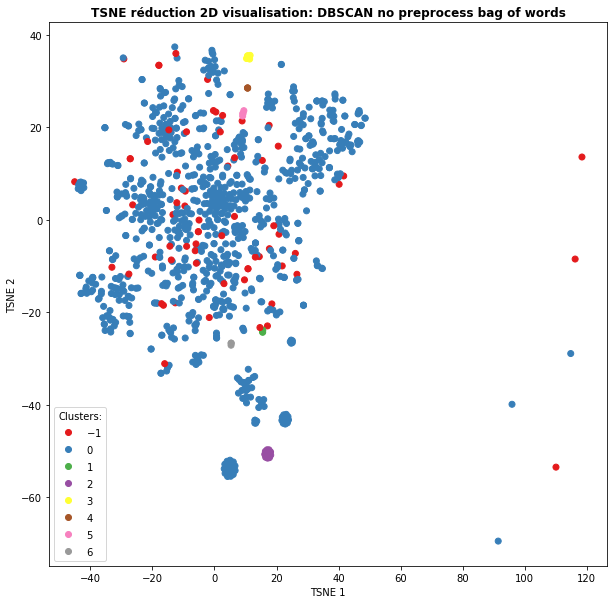

In [36]:
DBSCAN_model0 = DBSCAN(eps=17.4, min_samples=3, n_jobs=-1)
DBSCAN_model0.fit(X)

cluster_2D_TSNE_viz(X, DBSCAN_model0,
                    comment='DBSCAN no preprocess bag of words')

--> It is seems hard to tune DBSCAN to obtain our number of clusters (7)<br/>
--> Noise points are bigger that some cluster...

--> Agglomerative clustering no preprocessing  on features

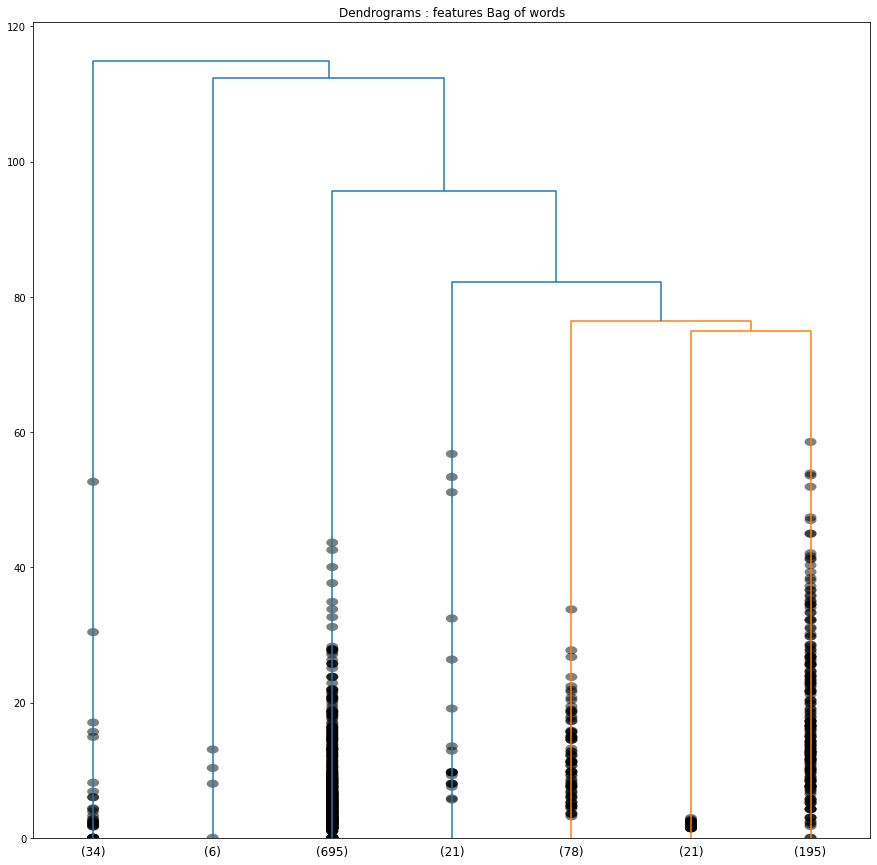

In [37]:
# let's use a dendogram to represent our data
plt.figure(figsize=(15, 15))
plt.title("Dendrograms : features Bag of words")
dend = shc.dendrogram(shc.linkage(X, method='ward'), p=7,
                      truncate_mode='lastp', show_contracted=True)
plt.show()

figure not saved


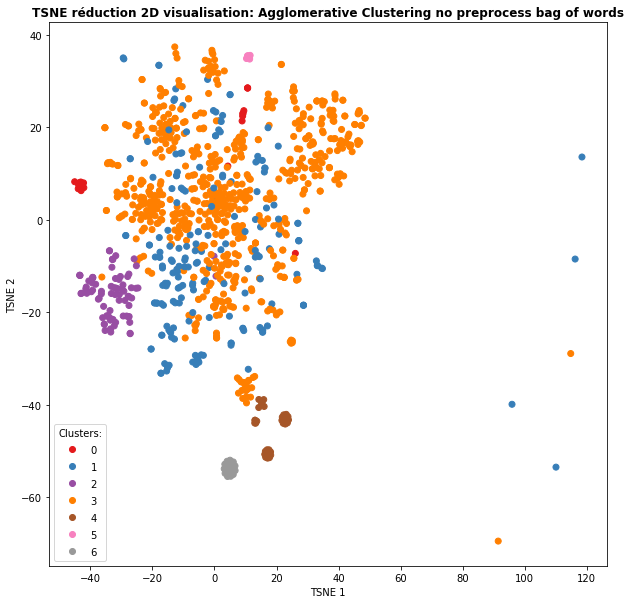

In [38]:
H_model0 = AgglomerativeClustering(n_clusters=7)
H_model0.fit_predict(X)
cluster_2D_TSNE_viz(X, H_model0,
                    comment='Agglomerative Clustering no preprocess bag of words')

Metrics

In [39]:
tab_result1 = pd.DataFrame(
    [], columns=['Model', 'nb_cluster', 'Davies_bouldin_score', 'Silhouette_score', 'comment', 'similarity with category'])
# Function to add result to our dataframe results


def metrics_clusters(data, nb_clusters, cluster_model, model_name, tab_result, comment=None):
    '''Function create a Series of metrics for a model input with its data
    You must enter model name as str, nb of cluster and the data used for the model'''
    row = pd.Series(data={'Model': model_name, 'nb_cluster': f'{nb_clusters:.0f}', 'Davies_bouldin_score': metrics.davies_bouldin_score(
        data, cluster_model.labels_), 'Silhouette_score': metrics.silhouette_score(data, cluster_model.labels_), 'comment': comment,
        'similarity with category': metrics.adjusted_rand_score(df_data_text['main_category'], cluster_model.labels_)}, name=len(tab_result))
    tab_result = tab_result.append(row)
    return tab_result

In [40]:
list_models = [k_means7_model0, DBSCAN_model0, H_model0]
for mod in list_models:
    tab_result1 = metrics_clusters(X, 7, mod, str(
        mod), tab_result1, comment='raw features Bag of words')
tab_result1

Model nb_cluster  \
0        KMeans(n_clusters=7, random_state=4)          7   
1  DBSCAN(eps=17.4, min_samples=3, n_jobs=-1)          7   
2       AgglomerativeClustering(n_clusters=7)          7   

   Davies_bouldin_score  Silhouette_score                    comment  \
0              1.962405          0.308543  raw features Bag of words   
1              2.269214          0.401409  raw features Bag of words   
2              2.651601          0.234225  raw features Bag of words   

   similarity with category  
0                  0.040611  
1                  0.001634  
2                  0.054947

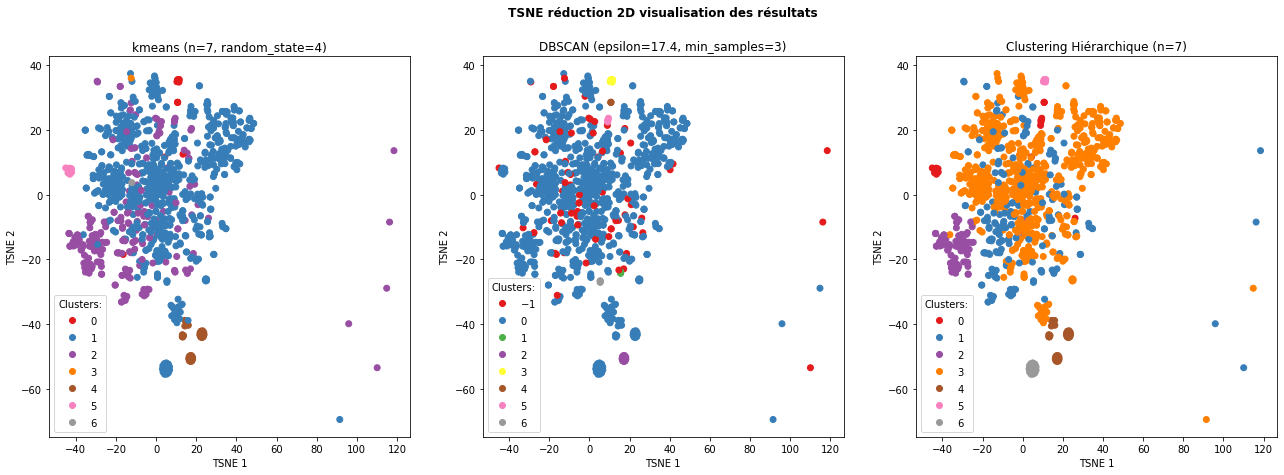

In [41]:
# Ploting 2D results
tsne_red = manifold.TSNE(
        n_components=2, perplexity=30, n_jobs=-1, random_state=0)
data_tsne_projected = tsne_red.fit_transform(X)
figure_results = plt.figure(figsize=(22, 7))
plt.title(f'TSNE réduction 2D visualisation des résultats', fontweight='bold', pad=40)
plt.axis('off')
figure_results.add_subplot(1,3,1)
plt.title('kmeans (n=7, random_state=4)')
a = plt.scatter(data_tsne_projected[:, 0], data_tsne_projected[:, 1],
                    c=k_means7_model0.labels_, cmap='Set1')
plt.legend(*a.legend_elements(), title='Clusters:')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
figure_results.add_subplot(1,3,2)
plt.title('DBSCAN (epsilon=17.4, min_samples=3)')
b = plt.scatter(data_tsne_projected[:, 0], data_tsne_projected[:, 1],
                    c=DBSCAN_model0.labels_, cmap='Set1')
plt.legend(*b.legend_elements(), title='Clusters:')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
figure_results.add_subplot(1,3,3)
plt.title('Clustering Hiérarchique (n=7)')
c = plt.scatter(data_tsne_projected[:, 0], data_tsne_projected[:, 1],
                    c=H_model0.labels_, cmap='Set1')
plt.legend(*c.legend_elements(), title='Clusters:')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
# plt.savefig('Resultats_BoW_clustering_TSNE.jpg', dpi=300, bbox_inches='tight') 
plt.show()

#### Without dimension reduction tf_idf features

Kmeans

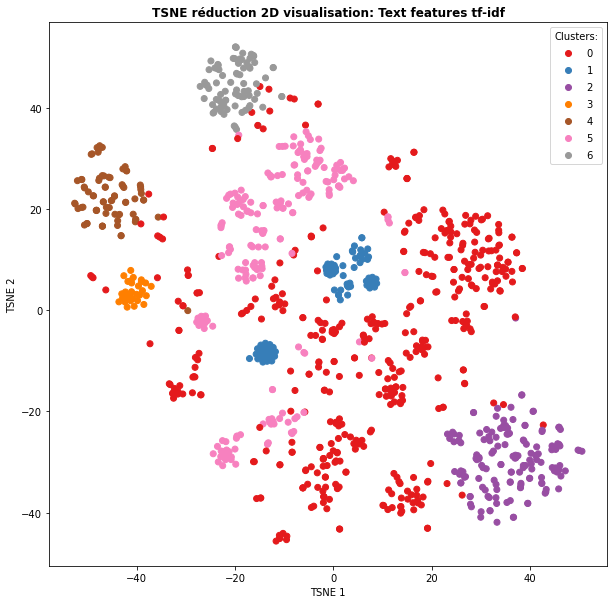

In [42]:
X_tfidf = tf_idf_features.toarray()
# We use a K_means with 7 cluster to compare with true categories
k_means7_model_tfidf0 = KMeans(n_clusters=7, random_state = 4)  # init kmeans ++
k_means7_model_tfidf0.fit(X_tfidf)

cluster_2D_TSNE_viz(X_tfidf, k_means7_model_tfidf0, savefig=True,
                    comment='Text features tf-idf')

In [43]:
tab_result_kmeans1 = pd.DataFrame(
    [], columns=['Model', 'Parameter_nb_cluster', 'Davies_bouldin_score', 'Silhouette_score', 'Cluster_stability', 'comment'])
tab_result_kmeans1 = metrics_clusters_kmeans(
    X_tfidf, 7, k_means7_model_tfidf0, 'K_means', tab_result_kmeans1, comment='raw features')
tab_result_kmeans1

Model Parameter_nb_cluster  Davies_bouldin_score  Silhouette_score  \
0  K_means                    7              4.897084          0.047969   

   Cluster_stability       comment  
0           0.619406  raw features

DBSCAN

In [44]:
noise_list = list()
n_clusters_list = list()
# loop on epsilon
for epsi in np.arange(0.1, 5, 0.05):
    epsi = np.round(epsi, decimals=1)
    dbscan_model_0 = DBSCAN(eps=epsi, min_samples=6, n_jobs=-1)
    dbscan_model_0.fit(X_tfidf)
    labels = dbscan_model_0.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_dbscan = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    # append n_cluster and n_noise to lists for epsi
    noise_list.append(n_noise)
    n_clusters_list.append(n_clusters_dbscan)

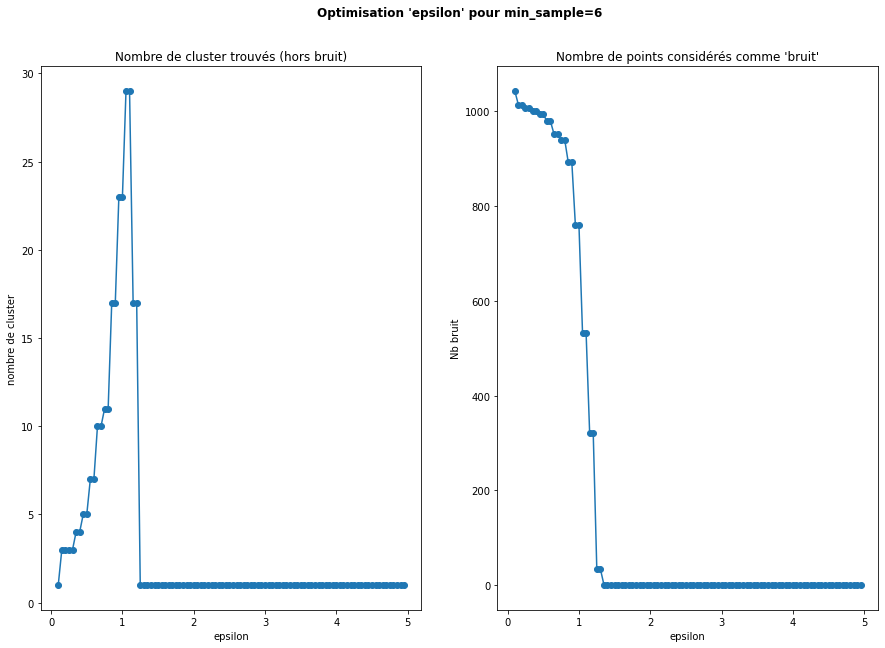

In [45]:
# Graph number of cluster and number of noise points for each epsi
figure_DBSCAN_opti = plt.figure(figsize=(15, 10))
plt.title("Optimisation 'epsilon' pour min_sample=6",
          fontweight='bold',  pad=50)
plt.axis('off')
figure_DBSCAN_opti.add_subplot(1, 2, 1)
plt.title('Nombre de cluster trouvés (hors bruit)')
plt.plot(np.arange(0.1, 5, 0.05), n_clusters_list, 'o-')
plt.xlabel('epsilon')
plt.ylabel('nombre de cluster')
figure_DBSCAN_opti.add_subplot(1, 2, 2)
plt.title("Nombre de points considérés comme 'bruit'")
plt.plot(np.arange(0.1, 5, 0.05), noise_list, 'o-')
plt.xlabel('epsilon')
plt.ylabel("Nb bruit")
#plt.savefig('DBSCAN_optimisation.jpg', dpi=300, bbox_inches='tight')
plt.show()

--> let's try epsilon = 0.6 and min sample = 6 we should have 7 clusters

figure not saved


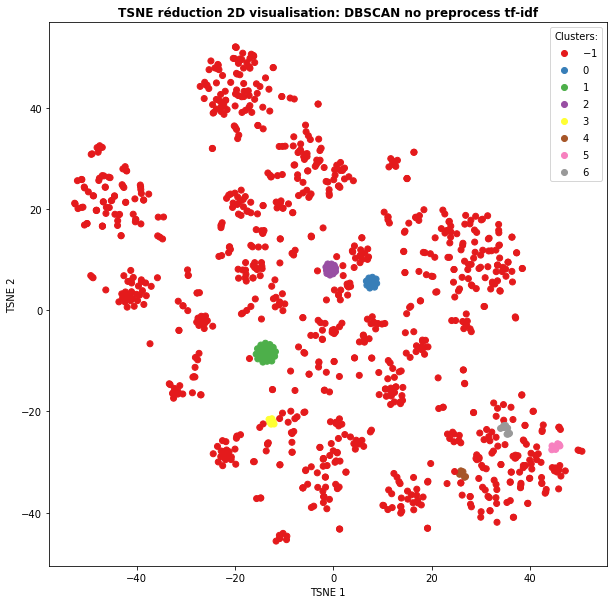

In [46]:
DBSCAN_model_tfidf0 = DBSCAN(eps=0.6, min_samples=6, n_jobs=-1)
DBSCAN_model_tfidf0.fit(X_tfidf)

cluster_2D_TSNE_viz(X_tfidf, DBSCAN_model_tfidf0,
                    comment='DBSCAN no preprocess tf-idf')

Agglomerative clustering no preprocessing  on features

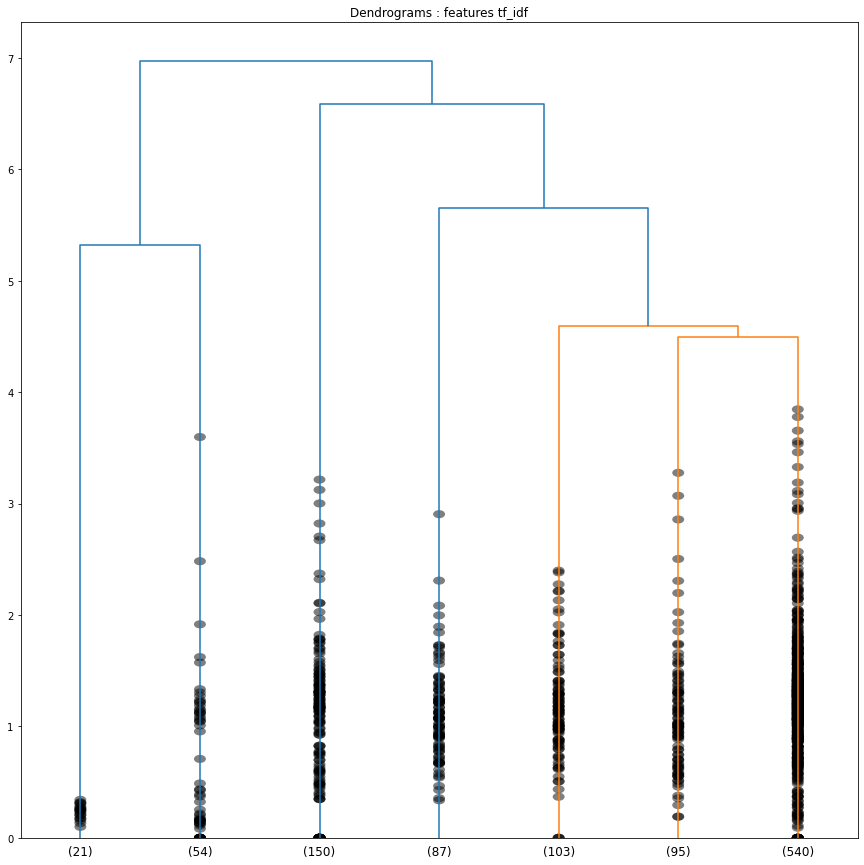

In [47]:
# let's use a dendogram to represent our data
plt.figure(figsize=(15, 15))
plt.title("Dendrograms : features tf_idf")
dend = shc.dendrogram(shc.linkage(X_tfidf, method='ward'),
                      p=7, truncate_mode='lastp', show_contracted=True)
plt.show()

figure not saved


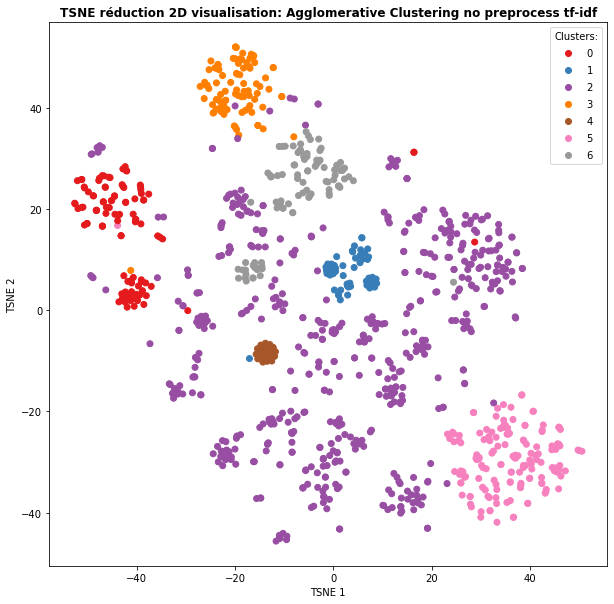

In [48]:
H_model_tfidf0 = AgglomerativeClustering(n_clusters=7)
H_model_tfidf0.fit_predict(X_tfidf)
cluster_2D_TSNE_viz(X_tfidf, H_model_tfidf0,
                    comment='Agglomerative Clustering no preprocess tf-idf')

Metrics

In [49]:
list_models1 = [k_means7_model_tfidf0, DBSCAN_model_tfidf0, H_model_tfidf0]
for mod in list_models1:
    tab_result1 = metrics_clusters(X_tfidf, 7, mod, str(
        mod), tab_result1, comment='raw features tf-idf')
tab_result1

Model nb_cluster  \
0        KMeans(n_clusters=7, random_state=4)          7   
1  DBSCAN(eps=17.4, min_samples=3, n_jobs=-1)          7   
2       AgglomerativeClustering(n_clusters=7)          7   
3        KMeans(n_clusters=7, random_state=4)          7   
4   DBSCAN(eps=0.6, min_samples=6, n_jobs=-1)          7   
5       AgglomerativeClustering(n_clusters=7)          7   

   Davies_bouldin_score  Silhouette_score                    comment  \
0              1.962405          0.308543  raw features Bag of words   
1              2.269214          0.401409  raw features Bag of words   
2              2.651601          0.234225  raw features Bag of words   
3              4.897084          0.047969        raw features tf-idf   
4              1.262782          0.027384        raw features tf-idf   
5              4.201250          0.049079        raw features tf-idf   

   similarity with category  
0                  0.040611  
1                  0.001634  
2                  0.054947  
3                  0.343890  
4                  0.005554  
5                  0.270394

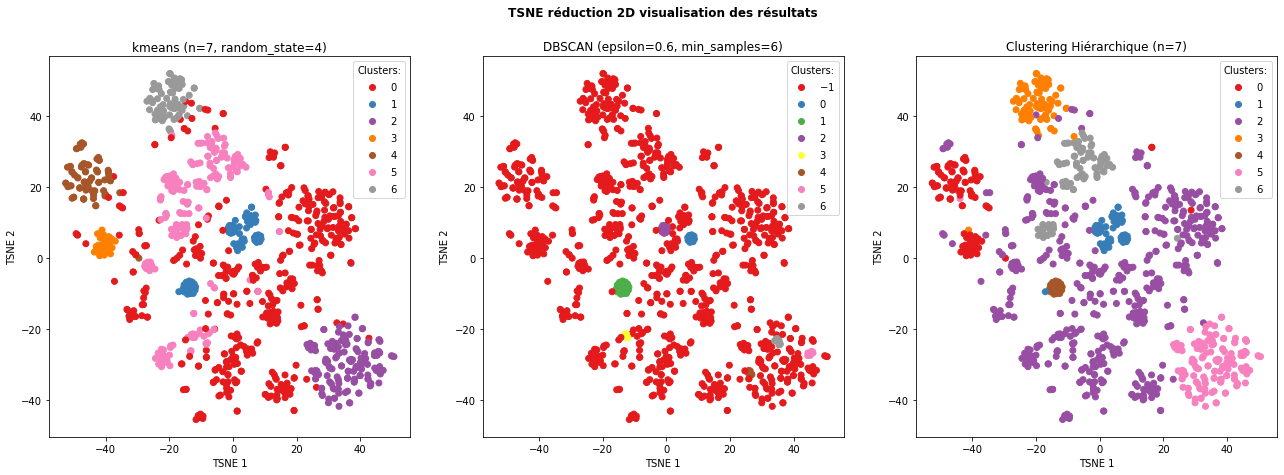

In [50]:
# Ploting 2D results
tsne_red = manifold.TSNE(
        n_components=2, perplexity=30, n_jobs=-1, random_state=0)
data_tsne_projected = tsne_red.fit_transform(X_tfidf)
figure_results = plt.figure(figsize=(22, 7))
plt.title(f'TSNE réduction 2D visualisation des résultats', fontweight='bold', pad=40)
plt.axis('off')
figure_results.add_subplot(1,3,1)
plt.title('kmeans (n=7, random_state=4)')
a = plt.scatter(data_tsne_projected[:, 0], data_tsne_projected[:, 1],
                    c=k_means7_model_tfidf0.labels_, cmap='Set1')
plt.legend(*a.legend_elements(), title='Clusters:')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
figure_results.add_subplot(1,3,2)
plt.title('DBSCAN (epsilon=0.6, min_samples=6)')
b = plt.scatter(data_tsne_projected[:, 0], data_tsne_projected[:, 1],
                    c=DBSCAN_model_tfidf0.labels_, cmap='Set1')
plt.legend(*b.legend_elements(), title='Clusters:')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
figure_results.add_subplot(1,3,3)
plt.title('Clustering Hiérarchique (n=7)')
c = plt.scatter(data_tsne_projected[:, 0], data_tsne_projected[:, 1],
                    c=H_model_tfidf0.labels_, cmap='Set1')
plt.legend(*c.legend_elements(), title='Clusters:')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
# plt.savefig('Resultats_TF_IDF_clustering_TSNE.jpg', dpi=300, bbox_inches='tight') 
plt.show()

#### With dimension reduction Bag of words features: PCA reduction to have 99% of the variance explained

In [51]:
# Reduction
pca_reduc = decomposition.PCA(n_components=0.99)
X_pca_bow = pca_reduc.fit_transform(bow_features.toarray())
X_pca_bow.shape

(1050, 568)

--> Visualization

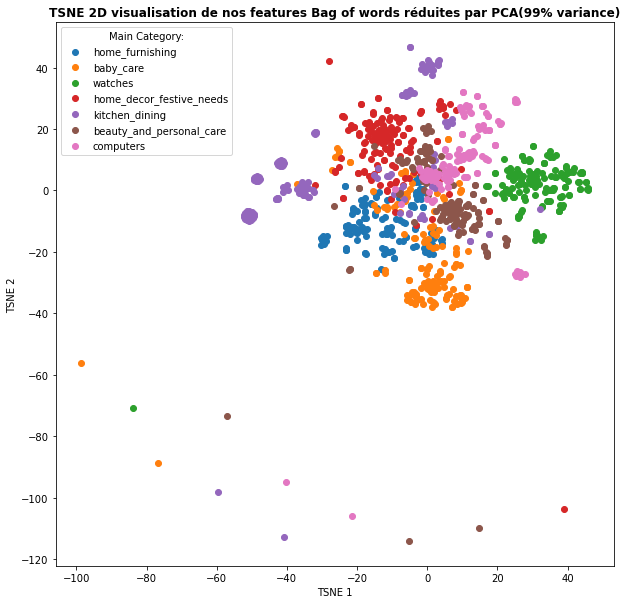

In [52]:
tsne_red = manifold.TSNE(n_components=2, perplexity=30,
                         n_jobs=-1, random_state=0)
data_tsne_projected = tsne_red.fit_transform(X_pca_bow)
figure_tsne = plt.figure(figsize=(10, 10))
plt.title('TSNE 2D visualisation de nos features Bag of words réduites par PCA(99% variance)',
          fontweight='bold')
for g in df_data_text['main_category'].unique():
    i = np.where(df_data_text['main_category'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Main Category:')
plt.show()

--> Kmeans

figure not saved


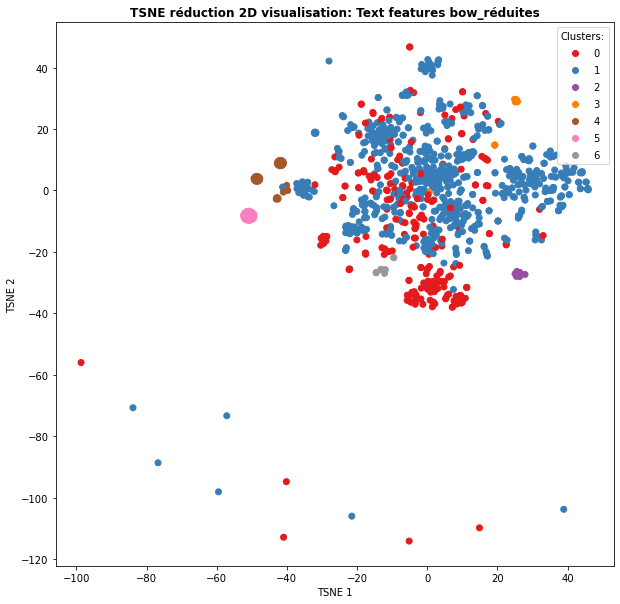

In [53]:
# We use a K_means with 7 cluster to compare with true categories
k_means7_model_pca_bow = KMeans(n_clusters=7, random_state=4)  # init kmeans ++
k_means7_model_pca_bow.fit(X_pca_bow)
cluster_2D_TSNE_viz(X_pca_bow, k_means7_model_pca_bow,
                    comment='Text features bow_réduites')

#### With dimension reduction tf_idf features: PCA reduction to have 99% of the variance explained

In [54]:
# Reduction
pca_reduc = decomposition.PCA(n_components=0.99)
X_pca_tfidf = pca_reduc.fit_transform(tf_idf_features.toarray())
X_pca_tfidf.shape

(1050, 809)

--> Visualization

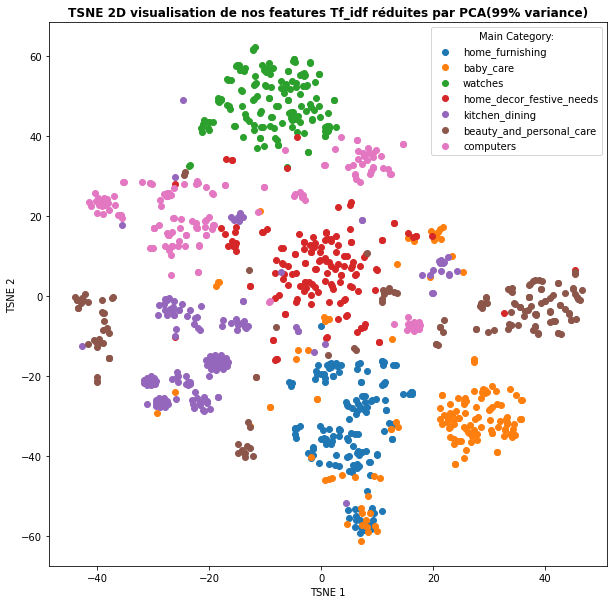

In [55]:
tsne_red = manifold.TSNE(n_components=2, perplexity=30,
                         n_jobs=-1, random_state=0)
data_tsne_projected = tsne_red.fit_transform(X_pca_tfidf)
figure_tsne = plt.figure(figsize=(10, 10))
plt.title('TSNE 2D visualisation de nos features Tf_idf réduites par PCA(99% variance)',
          fontweight='bold')
for g in df_data_text['main_category'].unique():
    i = np.where(df_data_text['main_category'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Main Category:')
plt.show()

Kmeans

figure not saved


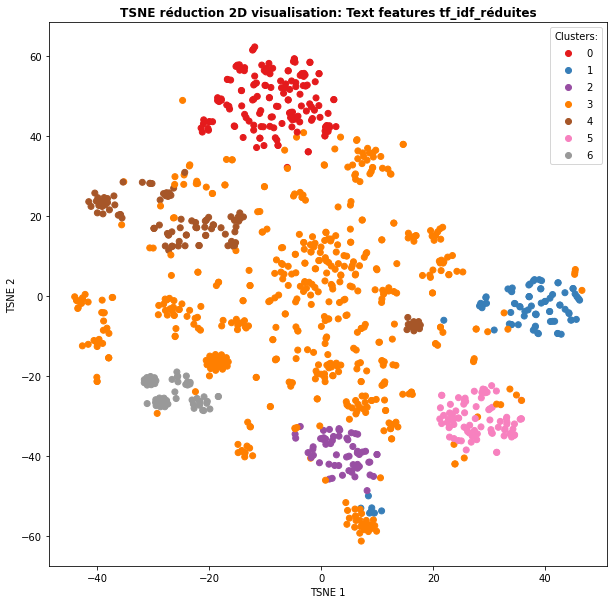

In [56]:
# We use a K_means with 7 cluster to compare with true categories
k_means7_model_pca_tfidf = KMeans(n_clusters=7, random_state=4)  # init kmeans ++
k_means7_model_pca_tfidf.fit(X_pca_tfidf)
cluster_2D_TSNE_viz(X_pca_tfidf, k_means7_model_pca_tfidf,
                    comment='Text features tf_idf_réduites')

In [57]:
tab_result1 = metrics_clusters(X_pca_bow, 7, k_means7_model_pca_bow, str(
    k_means7_model_pca_bow), tab_result1, comment='reduce features Bag of words')
tab_result1 = metrics_clusters(X_pca_tfidf, 7, k_means7_model_pca_tfidf, str(
    k_means7_model_pca_tfidf), tab_result1, comment='reduce features tf-idf')
tab_result1

Model nb_cluster  \
0        KMeans(n_clusters=7, random_state=4)          7   
1  DBSCAN(eps=17.4, min_samples=3, n_jobs=-1)          7   
2       AgglomerativeClustering(n_clusters=7)          7   
3        KMeans(n_clusters=7, random_state=4)          7   
4   DBSCAN(eps=0.6, min_samples=6, n_jobs=-1)          7   
5       AgglomerativeClustering(n_clusters=7)          7   
6        KMeans(n_clusters=7, random_state=4)          7   
7        KMeans(n_clusters=7, random_state=4)          7   

   Davies_bouldin_score  Silhouette_score                       comment  \
0              1.962405          0.308543     raw features Bag of words   
1              2.269214          0.401409     raw features Bag of words   
2              2.651601          0.234225     raw features Bag of words   
3              4.897084          0.047969           raw features tf-idf   
4              1.262782          0.027384           raw features tf-idf   
5              4.201250          0.049079           raw features tf-idf   
6              2.274031          0.263548  reduce features Bag of words   
7              4.564332          0.043283        reduce features tf-idf   

   similarity with category  
0                  0.040611  
1                  0.001634  
2                  0.054947  
3                  0.343890  
4                  0.005554  
5                  0.270394  
6                  0.044166  
7                  0.247483

--> We keep the best results in ARI score tf_idf features without dimension reduction

In [58]:
tab_result1['Test'] = ['BoW_Kmeans', 'BoW_DBSCAN', 'BoW_Clustering_Hiérarchique',
                       'tfidf_Kmeans', 'tfidf_DBSCAN', 'tfidf_Clustering_Hiérarchique', 'BoW_Kmeans_red99', 'tfidf_Kmeans_red99']
tab_result1

Model nb_cluster  \
0        KMeans(n_clusters=7, random_state=4)          7   
1  DBSCAN(eps=17.4, min_samples=3, n_jobs=-1)          7   
2       AgglomerativeClustering(n_clusters=7)          7   
3        KMeans(n_clusters=7, random_state=4)          7   
4   DBSCAN(eps=0.6, min_samples=6, n_jobs=-1)          7   
5       AgglomerativeClustering(n_clusters=7)          7   
6        KMeans(n_clusters=7, random_state=4)          7   
7        KMeans(n_clusters=7, random_state=4)          7   

   Davies_bouldin_score  Silhouette_score                       comment  \
0              1.962405          0.308543     raw features Bag of words   
1              2.269214          0.401409     raw features Bag of words   
2              2.651601          0.234225     raw features Bag of words   
3              4.897084          0.047969           raw features tf-idf   
4              1.262782          0.027384           raw features tf-idf   
5              4.201250          0.049079           raw features tf-idf   
6              2.274031          0.263548  reduce features Bag of words   
7              4.564332          0.043283        reduce features tf-idf   

   similarity with category                           Test  
0                  0.040611                     BoW_Kmeans  
1                  0.001634                     BoW_DBSCAN  
2                  0.054947    BoW_Clustering_Hiérarchique  
3                  0.343890                   tfidf_Kmeans  
4                  0.005554                   tfidf_DBSCAN  
5                  0.270394  tfidf_Clustering_Hiérarchique  
6                  0.044166               BoW_Kmeans_red99  
7                  0.247483             tfidf_Kmeans_red99

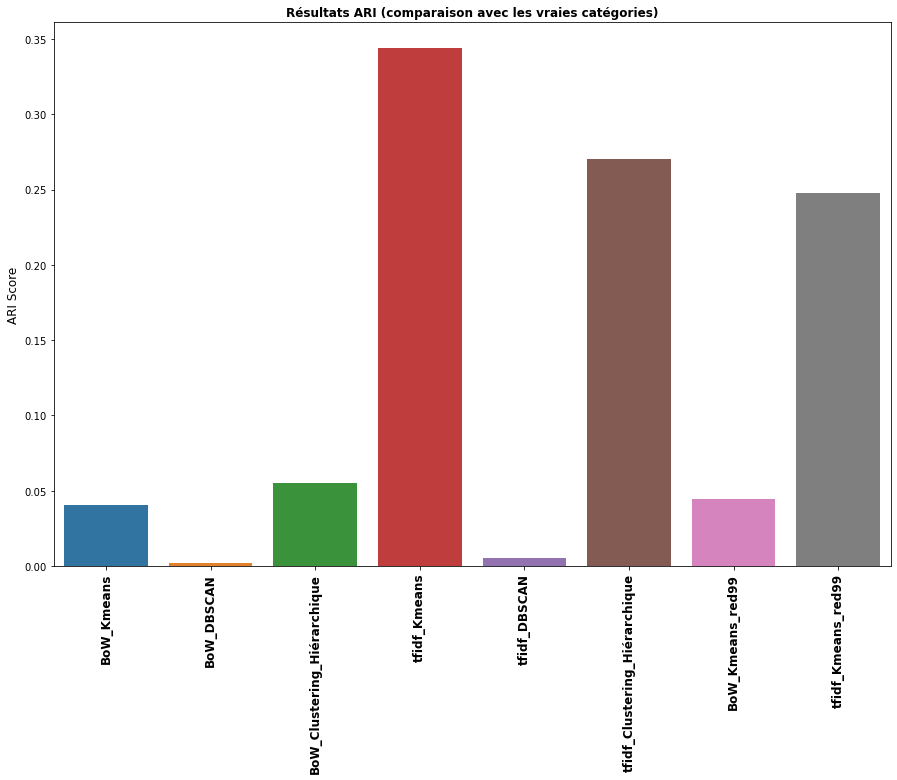

In [59]:
figure_results = plt.figure(figsize=(15,10))
plt.title('Résultats ARI (comparaison avec les vraies catégories)', fontweight='bold')
sns.barplot(x = tab_result1['Test'], y = tab_result1['similarity with category'])
plt.xticks(rotation=90, fontweight='bold', fontsize=12)
plt.xlabel('')
plt.ylabel( 'ARI Score', fontsize=12)
# plt.savefig('Résultats ARI Texte.jpg', dpi=300, bbox_inches='tight')
plt.show()

#### Confusion matrix with real category and selected model

* True labels and cluster visualization (reminder)

In [60]:
df_data_text['kmeans_clusters_tfidf'] = k_means7_model_tfidf0.labels_

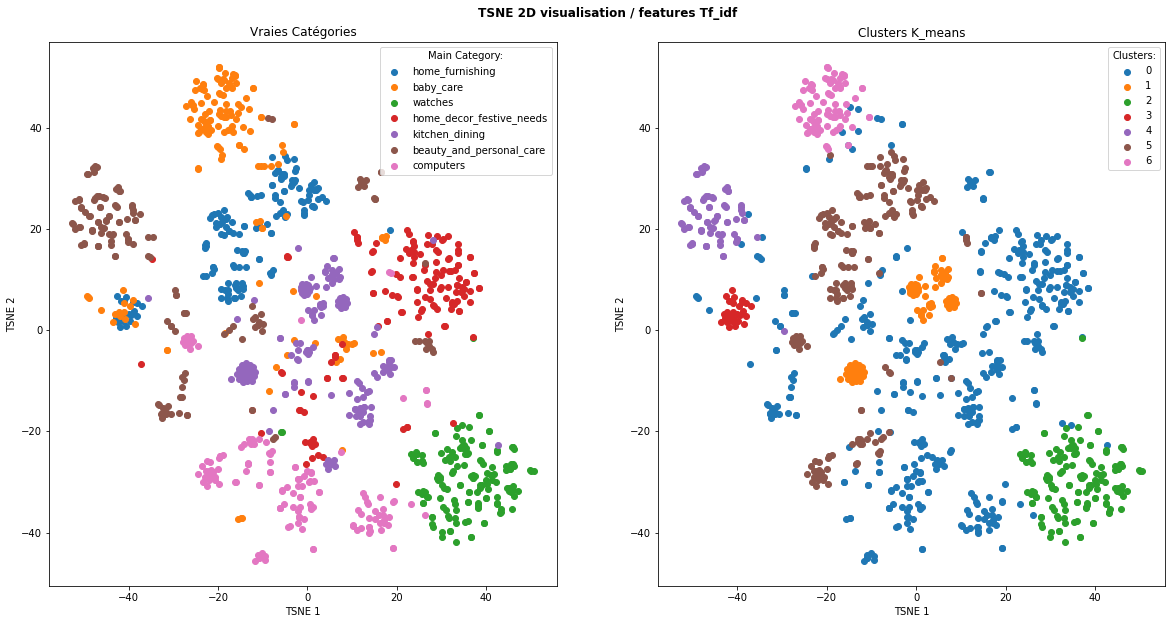

In [61]:
tsne_red = manifold.TSNE(n_components=2, perplexity=30,
                         n_jobs=-1, random_state=0)
data_tsne_projected = tsne_red.fit_transform(X_tfidf)
figure_tsne = plt.figure(figsize=(20, 10))
plt.title('TSNE 2D visualisation / features Tf_idf',
          fontweight='bold', pad=25)
plt.axis('off')
figure_tsne.add_subplot(1, 2, 1)
plt.title('Vraies Catégories')
for g in df_data_text['main_category'].unique():
    i = np.where(df_data_text['main_category'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Main Category:')
figure_tsne.add_subplot(1, 2, 2)
plt.title('Clusters K_means')
for g in df_data_text['kmeans_clusters_tfidf'].value_counts().sort_index().index:
    i = np.where(df_data_text['kmeans_clusters_tfidf'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Clusters:')
# plt.savefig('TSNE_Features_Tf_idf_comparaison_catégories_clusters.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [62]:
# ecoding our category name
label_encod = LabelEncoder()
df_data_text['True_labels'] = label_encod.fit_transform(
    df_data_text['main_category'])
df_data_text['True_labels'].value_counts()

4    150
0    150
6    150
3    150
5    150
1    150
2    150
Name: True_labels, dtype: int64

In [63]:
# category labelling (labelencoder)
count = 0
for lab in label_encod.classes_:
    print(f'{lab}: {count}')
    count += 1

baby_care: 0
beauty_and_personal_care: 1
computers: 2
home_decor_festive_needs: 3
home_furnishing: 4
kitchen_dining: 5
watches: 6


In [64]:
# recalculate ARI score with labels number
labels = df_data_text['True_labels']
metrics.adjusted_rand_score(labels, k_means7_model_tfidf0.labels_)

0.34389020438667084

In [65]:
metrics.confusion_matrix(labels, k_means7_model_tfidf0.labels_)

array([[ 45,   1,   0,  11,   0,  13,  80],
       [ 72,   0,   0,   0,  75,   3,   0],
       [101,   0,   0,   0,   0,  49,   0],
       [138,   0,   0,   0,   0,  12,   0],
       [  5,   0,   0,  19,   0, 126,   0],
       [ 76,  74,   0,   0,   0,   0,   0],
       [  2,   0, 147,   0,   0,   1,   0]], dtype=int64)

--> tree categories are difficults to match with cluster: computer, home_decor_festive_needs and home furnishing<br/>
--> let's try to transforms our confusion matrix to match cluster labelling (manually)

In [66]:
def transform_manu_clusters(cluster_labels, corresp):
    ''' Function to transforms our predict labels to match as much as possible with our true labels
    corresp can be tuned to match specific problem, be sure true_labels = [0,1,2,3,4,5,6]'''
    cluster_labels_transform = list()
    for i in cluster_labels:
        cluster_labels_transform.append(corresp[i])
    return cluster_labels_transform

In [67]:
metrics.confusion_matrix(
    labels, transform_manu_clusters(k_means7_model_tfidf0.labels_, corresp = [3, 5, 6, 4, 1, 2, 0]))

array([[ 80,   0,  13,  45,  11,   1,   0],
       [  0,  75,   3,  72,   0,   0,   0],
       [  0,   0,  49, 101,   0,   0,   0],
       [  0,   0,  12, 138,   0,   0,   0],
       [  0,   0, 126,   5,  19,   0,   0],
       [  0,   0,   0,  76,   0,  74,   0],
       [  0,   0,   1,   2,   0,   0, 147]], dtype=int64)

In [68]:
confu_m = metrics.confusion_matrix(
    labels, transform_manu_clusters(k_means7_model_tfidf0.labels_, corresp = [3, 5, 6, 4, 1, 2, 0]))

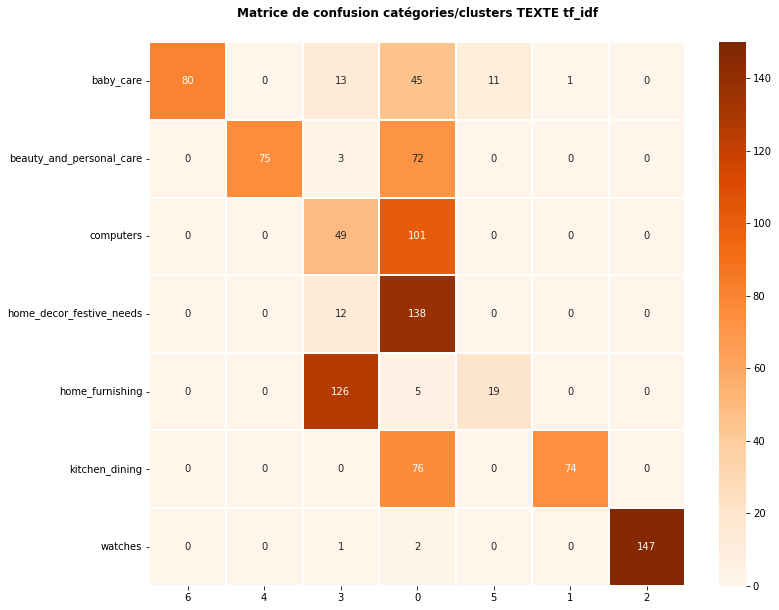

ARI score: 0.34


In [69]:
df_confusion_m = pd.DataFrame(confu_m, index=label_encod.classes_,
                              columns=[6, 4, 3, 0, 5, 1, 2])
figure_confm = plt.figure(figsize=(12, 10))
plt.title('Matrice de confusion catégories/clusters TEXTE tf_idf', fontweight='bold', pad=25)
sns.heatmap(df_confusion_m, fmt='.3g',cmap='Oranges', annot=True, vmin=0, vmax=150, linewidths= 0.3)
# plt.savefig('Matrice_de_confusion_partie_texte.jpg', dpi=300, bbox_inches='tight')
plt.show()
print(f'ARI score: {metrics.adjusted_rand_score(labels, k_means7_model_tfidf0.labels_):.2f}')

--> let's try to understand why we have 3 products on the wrong category for cluster associated with watches

In [70]:
wrong_watch_cluster_item = df_data_text.loc[(df_data_text['main_category'] == 'watches')&
                                            (df_data_text['kmeans_clusters_tfidf'] != 2)]
i = 0
for desc in wrong_watch_cluster_item['description']:
    print(f'{wrong_watch_cluster_item.main_category[wrong_watch_cluster_item.index[i]]} // {desc} \n *************************')
    i+=1

watches // T STAR UFT-TSW-005-BK-BR Analog Watch  - For Boys
                         Price: Rs. 399
				
			Whether you are on your way to work or travelling abroad with family, lifestyle accessories like watches, wallets and belts help to add a touch of sophistication and class to your otherwise mundane and regular daily wear. When it all comes down to it, suave leather belts and intricately designed and finished timepieces are what separate you from the rest.
Whether you are on your way to work or travelling abroad with family, lifestyle accessories like watches, wallets and belts help to add a touch of sophistication and class to your otherwise mundane and regular daily wear. When it all comes down to it, suave leather belts and intricately designed and finished timepieces are what separate you from the rest. 
 *************************
watches // Vizion 8502-7PURPLE Sports Series Digital Watch  - For Boys, Girls
                         Price: Rs. 595
				
			Brand: Vizion,Sports 

* the two first descriptions can be associated to home, lifestile that maybe a reason why our clustering with tf_idf can't identified it correctly even if watches is in the description.
* For the other product it can also be explained by the information closed to computer descrptions (batteries, display, power...)

## **III) Images**

In [71]:
df_data_img = df_data[['uniq_id', 'image', 'main_category']].copy()
df_data_img

uniq_id                                 image  \
0     55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1     7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2     64d5d4a258243731dc7bbb1eef49ad74  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3     d4684dcdc759dd9cdf41504698d737d8  d4684dcdc759dd9cdf41504698d737d8.jpg   
4     6325b6870c54cd47be6ebfbffa620ec7  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...                                ...                                   ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046  fd6cbcc22efb6b761bd564c28928483c  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047  5912e037d12774bb73a2048f35a00009  5912e037d12774bb73a2048f35a00009.jpg   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049  f2f027ad6a6df617c9f125173da71e44  f2f027ad6a6df617c9f125173da71e44.jpg   

        main_category  
0     home_furnishing  
1           baby_care  
2           baby_care  
3     home_furnishing  
4     home_furnishing  
...               ...  
1045        baby_care  
1046        baby_care  
1047        baby_care  
1048        baby_care  
1049        baby_care  

[1050 rows x 3 columns]

In [72]:
label_encod = LabelEncoder()
df_data_img['True_labels'] = label_encod.fit_transform(
    df_data_img['main_category'])
df_data_img

uniq_id                                 image  \
0     55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1     7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2     64d5d4a258243731dc7bbb1eef49ad74  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3     d4684dcdc759dd9cdf41504698d737d8  d4684dcdc759dd9cdf41504698d737d8.jpg   
4     6325b6870c54cd47be6ebfbffa620ec7  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...                                ...                                   ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046  fd6cbcc22efb6b761bd564c28928483c  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047  5912e037d12774bb73a2048f35a00009  5912e037d12774bb73a2048f35a00009.jpg   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049  f2f027ad6a6df617c9f125173da71e44  f2f027ad6a6df617c9f125173da71e44.jpg   

        main_category  True_labels  
0     home_furnishing            4  
1           baby_care            0  
2           baby_care            0  
3     home_furnishing            4  
4     home_furnishing            4  
...               ...          ...  
1045        baby_care            0  
1046        baby_care            0  
1047        baby_care            0  
1048        baby_care            0  
1049        baby_care            0  

[1050 rows x 4 columns]

In [73]:
df_data_img.groupby('True_labels').count()

uniq_id  image  main_category
True_labels                               
0                150    150            150
1                150    150            150
2                150    150            150
3                150    150            150
4                150    150            150
5                150    150            150
6                150    150            150

In [74]:
for im in df_data_img['image'][0:3]:
    print(f'Images\\{im}')

Images\55b85ea15a1536d46b7190ad6fff8ce7.jpg
Images\7b72c92c2f6c40268628ec5f14c6d590.jpg
Images\64d5d4a258243731dc7bbb1eef49ad74.jpg


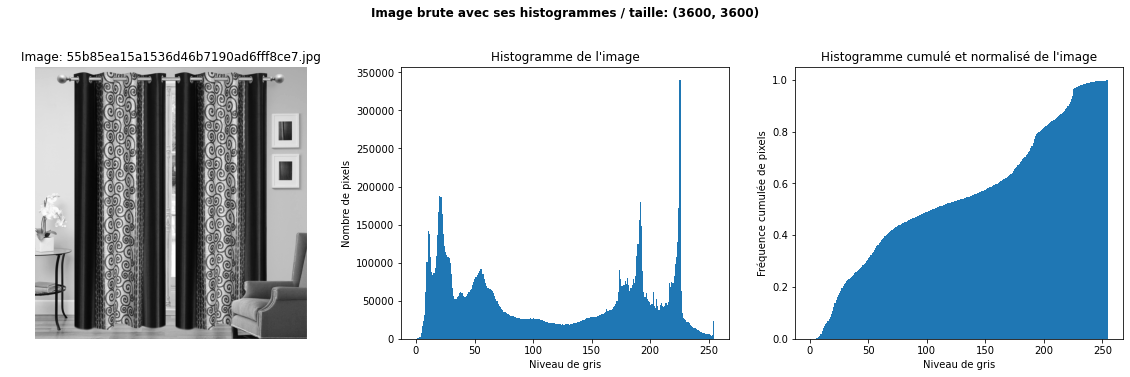

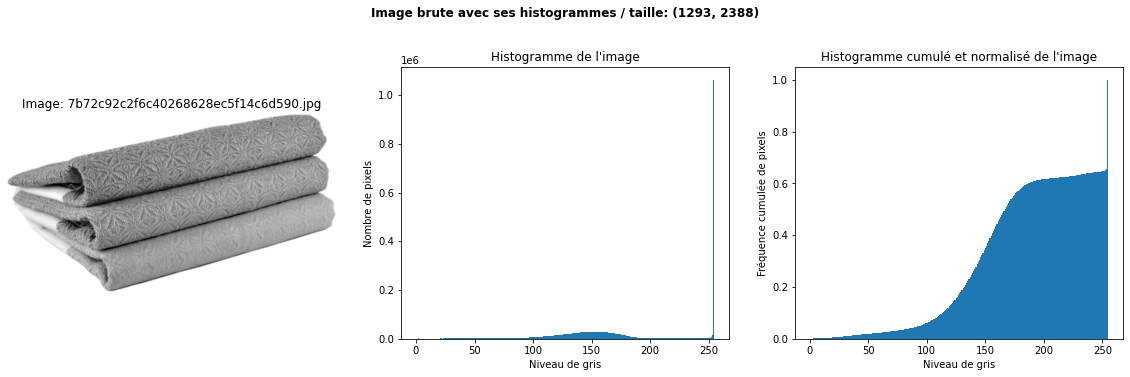

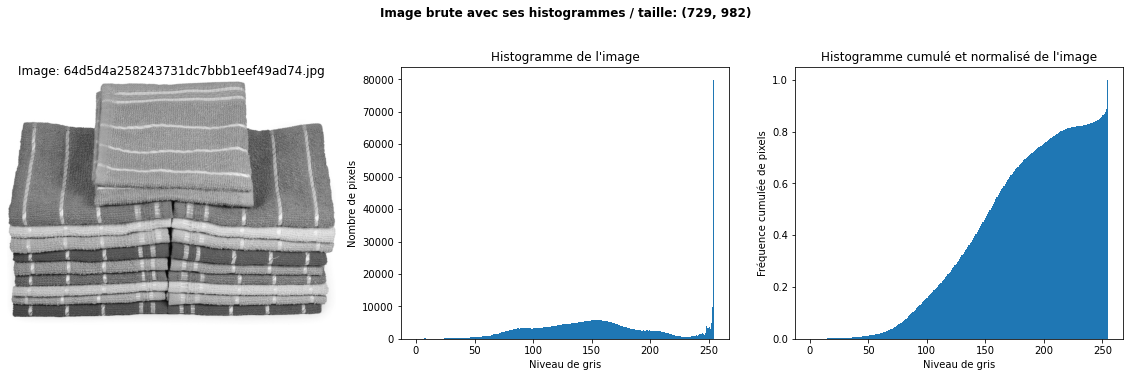

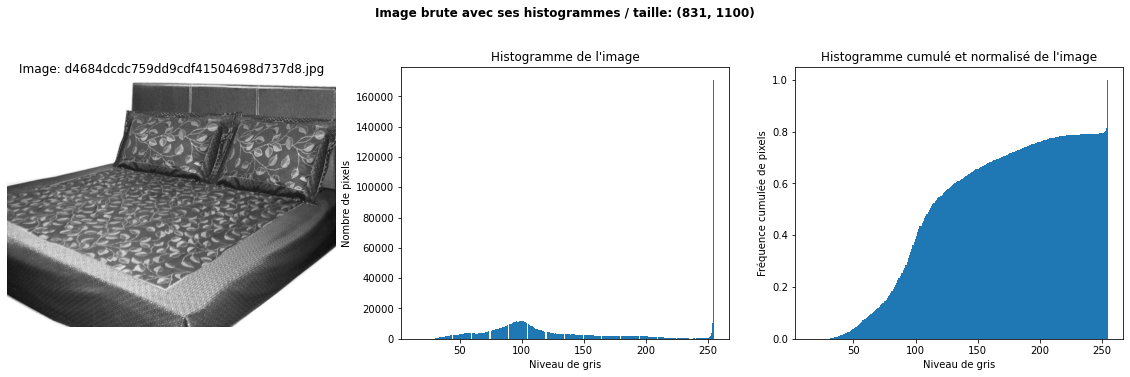

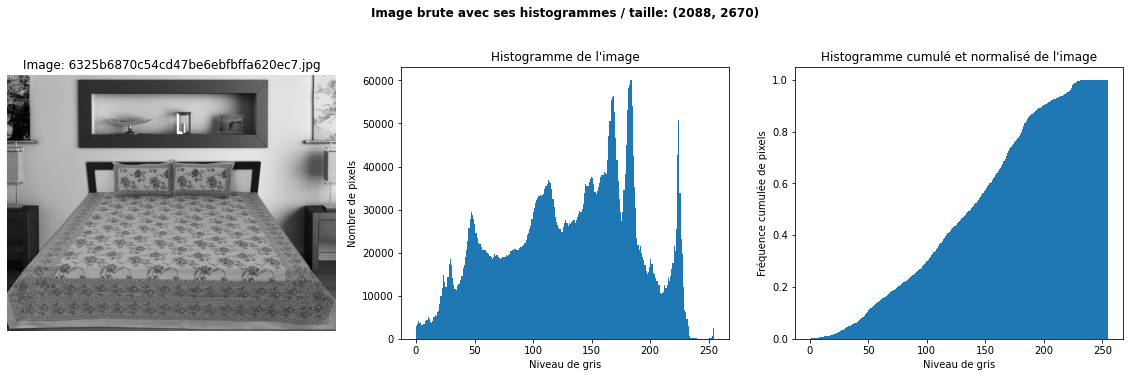

In [75]:
# test importing images and represent their histograms
for im in df_data_img['image'][0:5]:
    # image display in black and white
    img = cv.imread(f'Images\\{im}', cv.IMREAD_GRAYSCALE)
    # on peut passer aussi par l'étape cv.cvtColor(img,cv.COLOR_BGR2GRAY) après avoir importé l'image en couleur à voir laquelle est mieux
    figure = plt.figure(figsize=(20, 5))
    plt.title(
        f'Image brute avec ses histogrammes / taille: {img.shape}', fontweight='bold', pad=50)
    plt.axis('off')
    figure.add_subplot(1, 3, 1)
    plt.axis('off')
    plt.title(f'Image: {im}')
    plt.imshow(img, cmap='gray')
    figure.add_subplot(1, 3, 2)
    plt.title("Histogramme de l'image")
    plt.hist(img.flatten(), bins=256)
    plt.xlabel('Niveau de gris')
    plt.ylabel('Nombre de pixels')
    figure.add_subplot(1, 3, 3)
    plt.title("Histogramme cumulé et normalisé de l'image")
    plt.hist(img.flatten(), bins=256, density=True, cumulative=True)
    plt.xlabel('Niveau de gris')
    plt.ylabel('Fréquence cumulée de pixels')
    plt.show()

### **Definition of a function to preprocess our images**

In [76]:
def img_preprocess(image, new_dim):
    '''Function to preprocess our image'''
    # Blurring
    image = cv.GaussianBlur(image, (5, 5), 0)
    # equalization
    image = cv.equalizeHist(image)
    # Resize
    image = cv.resize(image, new_dim)
    return image

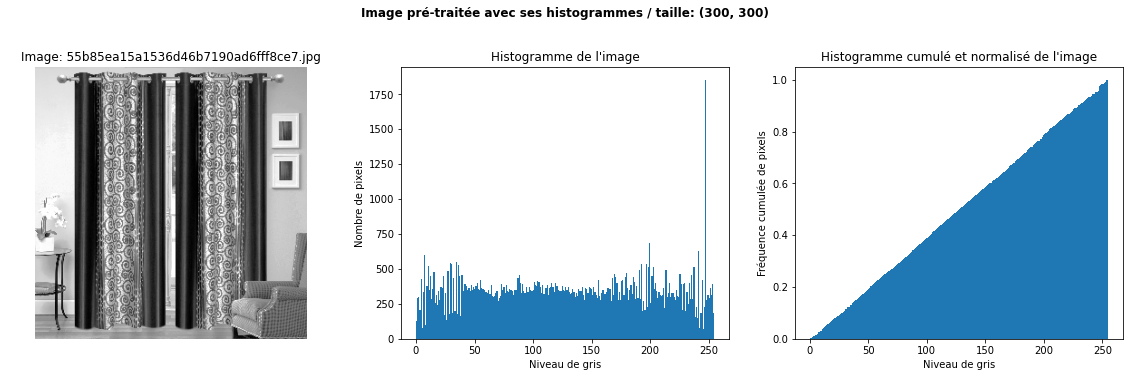

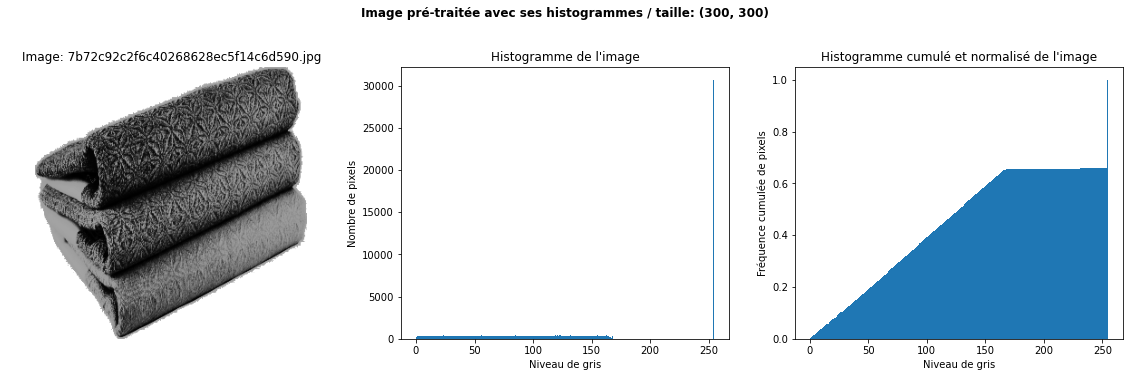

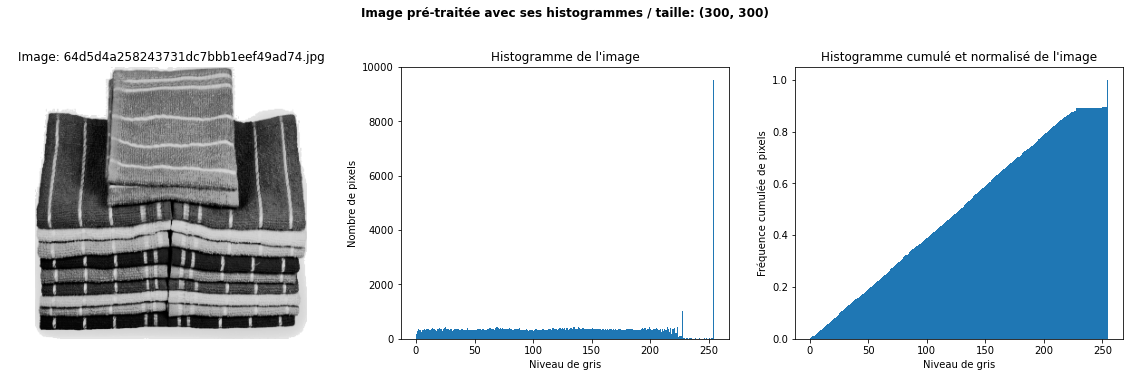

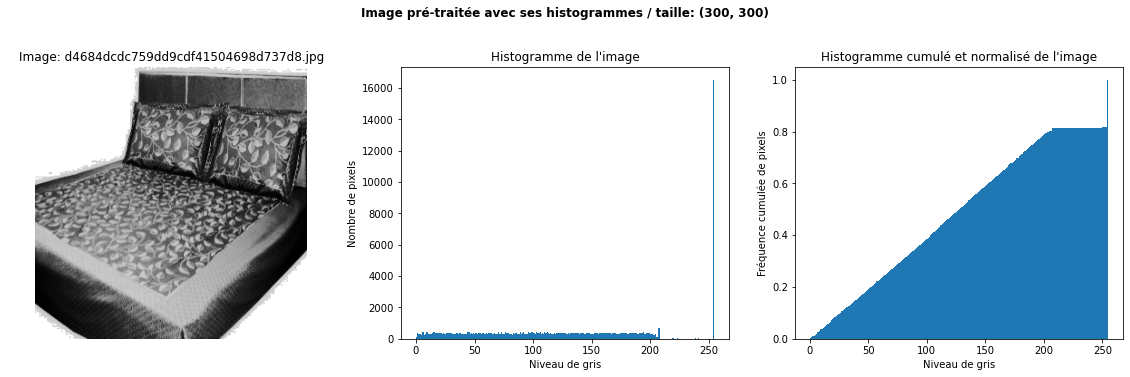

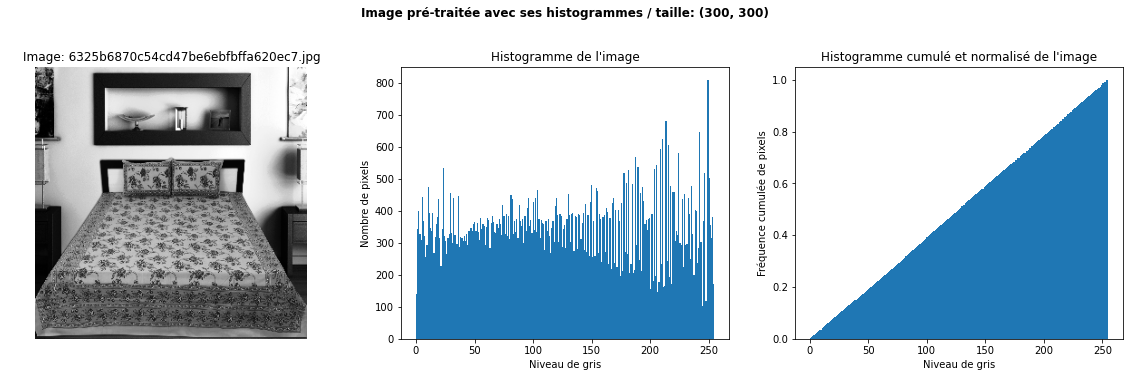

In [77]:
# Visualization of our preprocessing function on the 5 first image
for im in df_data_img['image'][0:5]:
    # image display in black and white
    img = cv.imread(f'Images\\{im}', cv.IMREAD_GRAYSCALE)
    img = img_preprocess(img, (300, 300))
    # on peut passer aussi par l'étape cv.cvtColor(img,cv.COLOR_BGR2GRAY) après avoir importé l'image en couleur à voir laquelle est mieux
    figure = plt.figure(figsize=(20, 5))
    plt.title(
        f'Image pré-traitée avec ses histogrammes / taille: {img.shape}', fontweight='bold', pad=50)
    plt.axis('off')
    figure.add_subplot(1, 3, 1)
    plt.axis('off')
    plt.title(f'Image: {im}')
    plt.imshow(img, cmap='gray')
    figure.add_subplot(1, 3, 2)
    plt.title("Histogramme de l'image")
    plt.hist(img.flatten(), bins=256)
    plt.xlabel('Niveau de gris')
    plt.ylabel('Nombre de pixels')
    figure.add_subplot(1, 3, 3)
    plt.title("Histogramme cumulé et normalisé de l'image")
    plt.hist(img.flatten(), bins=256, density=True, cumulative=True)
    plt.xlabel('Niveau de gris')
    plt.ylabel('Fréquence cumulée de pixels')
    plt.show()

### **Features detection and clustering with SIFT**

#### Example features detection on one image

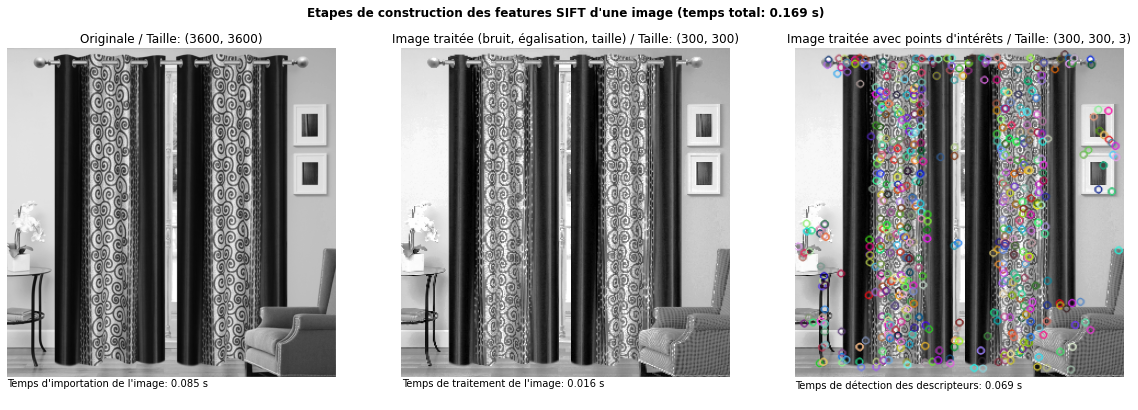

In [78]:
init_time = time.time()
# Image import
img = cv.imread(f'Images\\{df_data_img.image[0]}', cv.IMREAD_GRAYSCALE)
time1 = time.time()
# Image preprocessing
img_test = img_preprocess(img, (300, 300))
time2 = time.time()
# Features extraction with SIFT
sift = cv.xfeatures2d.SIFT_create()
kp, desc = sift.detectAndCompute(img_test, None)
time3 = time.time()
img_test_sift = cv.drawKeypoints(img_test, kp, None)
# Plotting
figure_treatment = plt.figure(figsize=(20, 7))
plt.title(f"Etapes de construction des features SIFT d'une image (temps total: {time3-init_time:.3f} s)", fontweight='bold')
plt.axis('off')
figure_treatment.add_subplot(1,3,1)
plt.title(f"Originale / Taille: {img.shape}")
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.text( 0, 3700, f"Temps d'importation de l'image: {time1-init_time:.3f} s")
figure_treatment.add_subplot(1,3,2)
plt.title(f"Image traitée (bruit, égalisation, taille) / Taille: {img_test.shape}")
plt.axis('off')
plt.imshow(img_test, cmap='gray')
plt.text( 0, 308, f"Temps de traitement de l'image: {time2-time1:.3f} s")
figure_treatment.add_subplot(1,3,3)
plt.title(f"Image traitée avec points d'intérêts / Taille: {img_test_sift.shape}")
plt.axis('off')
plt.imshow(img_test_sift)
plt.text( 0, 310, f"Temps de détection des descripteurs: {time3-time2:.3f} s")
plt.show()

In [79]:
# descriptors matrix
print(f'Descripteur: {desc.shape}')
desc

Descripteur: (612, 128)


array([[  0.,   1.,  17., ...,   0.,   0.,   0.],
       [  7., 135., 106., ...,   0.,   0.,   1.],
       [  3.,   0.,   0., ...,   0.,   0.,  10.],
       ...,
       [  1.,   0.,   0., ...,   3.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   8.,   1.],
       [  0.,  11., 132., ...,   0.,   0.,   9.]], dtype=float32)

--> we have 612 SIFT descriptors for the first image (without specifying how many descriptors we want) 

#### Treatment and features on all images

In [80]:
init_time = time.time()
sift_descr_img = list()
sift = cv.SIFT_create() # trying to use the recommandation of the library "SIFT_create()"
for im in df_data_img['image']:
    img = cv.imread(f'Images\\{im}', cv.IMREAD_GRAYSCALE)
    img = img_preprocess(img, (300, 300))
    kp, desc = sift.detectAndCompute(img, None)
    sift_descr_img.append(desc)
    time_end = time.time()
sift_descr_all = np.concatenate(sift_descr_img, axis=0)
print(f"Temps de traitement SIFT: {time_end - init_time:.2f} s")
print(f"Nombre total de descpriteurs: {sift_descr_all.shape[0]}")

Temps de traitement SIFT: 32.98 s
Nombre total de descpriteurs: 575610


#### Create a clustering of descriptors

--> K_means

In [79]:
init_time = time.time()
# let's use the square roots of our number of cluster to find kmeans clusters of our descriptors
k_clusters = int(round(np.sqrt(sift_descr_all.shape[0]),0))
# clustering
k_means_descr = KMeans(n_clusters=k_clusters, n_jobs=-1)
k_means_descr.fit(sift_descr_all)
time1 = time.time()

print(f"Nombre de clusters pour les descripteurs: {k_clusters} ")
print(f"Temps de traitement du clustering: {time1 - init_time} s")


C:\Users\ysene\anaconda3\envs\OpenClassRooms2\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Nombre de clusters pour les descripteurs: 759 
Temps de traitement du clustering: 7253.851681947708 s


In [80]:
time_kmeans = time1 - init_time

--> MiniBatchKmeans

In [81]:
init_time = time.time()
# let's use the square roots of our number of cluster to find kmeans clusters of our descriptors
k_clusters = int(round(np.sqrt(sift_descr_all.shape[0]),0))
# clustering
k_means_mini_batch_descr = MiniBatchKMeans(n_clusters=k_clusters, init_size=3*k_clusters, batch_size=3*k_clusters, random_state=10)
k_means_mini_batch_descr.fit(sift_descr_all)
time1 = time.time()
time_minibatch_kmeans = time1 - init_time

print(f"Nombre de clusters pour les descripteurs: {k_clusters} ")
print(f"Temps de traitement du clustering: {time_minibatch_kmeans} s")

Nombre de clusters pour les descripteurs: 759 
Temps de traitement du clustering: 59.72056579589844 s


In [82]:
print(f"Kmeans inertia: {k_means_descr.inertia_} / MiniBatchKmeans inertia: {k_means_mini_batch_descr.inertia_}")

Kmeans inertia: 36908351488.0 / MiniBatchKmeans inertia: 37642703320.0


#### Create Histogram (bag of visual words) for eachs images in function of there descpritors clusters

In [82]:
# function to create histogram for an image
def hist_count_img(cluster_model_desc, descriptors):
    '''Function to create for an image a counting histogram of the clusters present in function of the descriptors
    cluster_model --> clusering model of the descpritors
    descriptors --> matrix of each descriptors presents in an image
    img_index --> index of the image'''
    
    hist = np.zeros(cluster_model_desc.n_clusters)
    clusters_present = cluster_model_desc.predict(descriptors)
    nb_descr = len(descriptors)
    for i in clusters_present:
        hist[i] += 1/nb_descr # Trying to weight the apparition of a description by the total number of descriptor in the image
    return hist

# treatment of all the image
hist_desc_all_img = list()
for index, desc_img in enumerate(sift_descr_img):
    hist_img = hist_count_img(k_means_mini_batch_descr, desc_img)
    hist_desc_all_img.append(hist_img)

print(f'Taille du bag of visual words: {len(hist_desc_all_img)}')

Taille du bag of visual words: 1050


In [83]:
img_features_sift = np.asarray(hist_desc_all_img)
print(f"Dimension des features BoVW:{img_features_sift.shape}")

Dimension des features BoVW:(1050, 759)


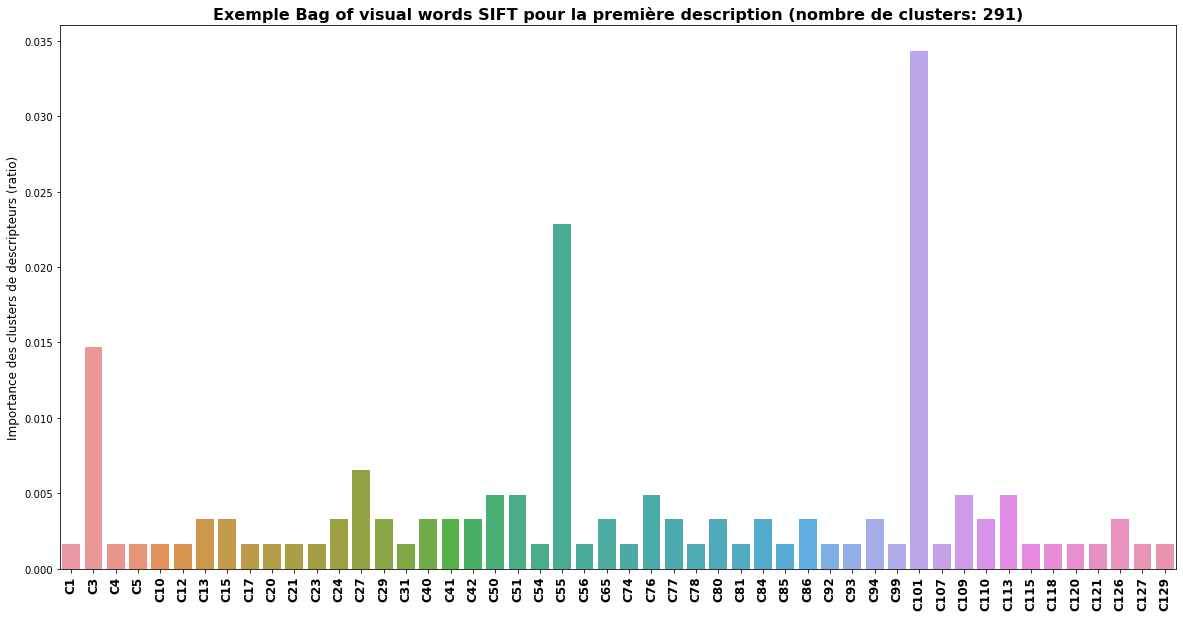

In [84]:
# Represent an example of Bag of visual words SIFT feature
df_SIFT_feat = pd.DataFrame(data = img_features_sift, columns=[f'C{i}' for i in range(0, img_features_sift.shape[1])])
example_SIFT = df_SIFT_feat.iloc[0,:].copy()
example_SIFT = example_SIFT[example_SIFT != 0]
figure_4 = plt.figure(figsize=(20,10))
plt.title(f'Exemple Bag of visual words SIFT pour la première description (nombre de clusters: {len(example_SIFT.index)})',
          fontweight = 'bold', fontsize=16)
sns.barplot(x = example_SIFT.index[0:50], y = example_SIFT.values[0:50]) # There is to many visual words to represent we only take the first 50.
plt.ylabel('Importance des clusters de descripteurs (ratio)', fontsize=12)
plt.xticks(rotation = 90, fontweight='bold', fontsize=12)
# plt.savefig('Exemple SIFT_50_first_cluster.jpg', dpi=300, bbox_inches='tight')
plt.show()

#### Visualization and evaluate dimension reduction

--> PCA reduction

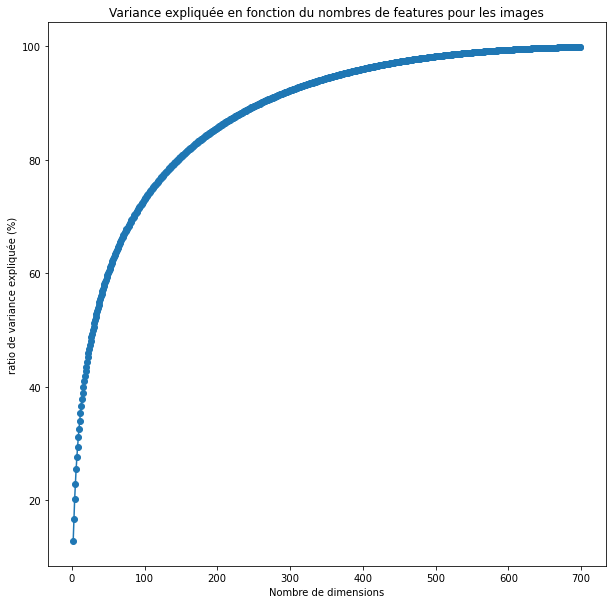

In [25]:
variance_expl_bovw = list()
for n in range(2, 700):
    pca_red = decomposition.PCA(n_components=n)
    data_pca_projected = pca_red.fit_transform(img_features_sift)
    variance_expl_bovw.append(pca_red.explained_variance_ratio_.sum()*100)

figure_PCA_variance = plt.figure(figsize=(10,10))
plt.title("Variance expliquée en fonction du nombres de features pour les images")
plt.plot(range(2, 700), variance_expl_bovw, 'o-')
plt.xlabel('Nombre de dimensions')
plt.ylabel('ratio de variance expliquée (%)')
plt.show()

Dimension reduction at 300 features should keep at least 90% of the variance explained

--> PCA and tSNE 2D visualization with categories

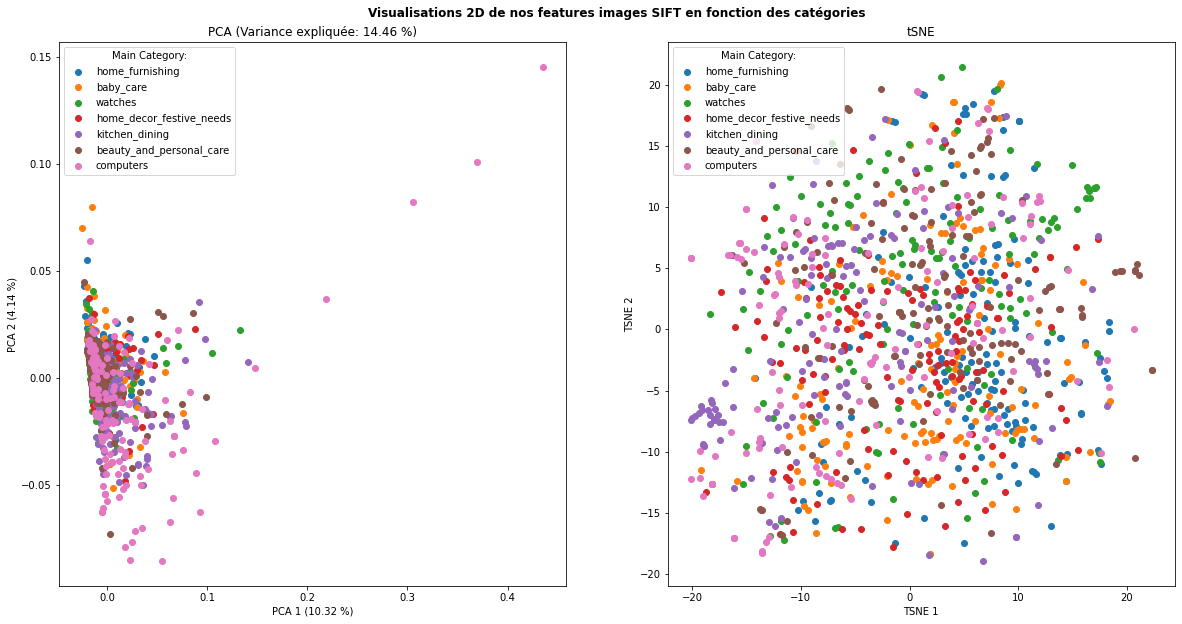

In [85]:
# PCA
pca_red = decomposition.PCA(n_components=2)
img_features_pca_projected = pca_red.fit_transform(img_features_sift)
# tSNE
tsne_red = manifold.TSNE(n_components=2, perplexity=30,
                         n_jobs=-1, random_state=0)
img_features_tsne_projected = tsne_red.fit_transform(img_features_sift)
# Ploting
figure_2D_Visualization = plt.figure(figsize=(20, 10))
plt.title('Visualisations 2D de nos features images SIFT en fonction des catégories', fontweight='bold', pad=25)
plt.axis('off')

figure_2D_Visualization.add_subplot(1,2,1)
plt.title(f'PCA (Variance expliquée: {pca_red.explained_variance_ratio_.sum()*100:.2f} %)')
for g in df_data_img['main_category'].unique():
    i = np.where(df_data_img['main_category'] == g)
    plt.scatter(img_features_pca_projected[i, 0], img_features_pca_projected[i, 1], label=g)
plt.xlabel(f'PCA 1 ({pca_red.explained_variance_ratio_[0]*100:.2f} %)')
plt.ylabel(f'PCA 2 ({pca_red.explained_variance_ratio_[1]*100:.2f} %)')
plt.legend(title='Main Category:')
figure_2D_Visualization.add_subplot(1,2,2)
plt.title('tSNE')
for g in df_data_img['main_category'].unique():
    i = np.where(df_data_img['main_category'] == g)
    plt.scatter(img_features_tsne_projected[i, 0], img_features_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Main Category:')
plt.show()

--> The visualization makes it not easy to separate our categories, maybe the features extraction is not good we may have to much cluster for our descriptors<br/>
--> Let's try the same approach with less descriptors clusters (400)

Nombre de clusters pour les descripteurs: 400 
Temps de traitement du clustering: 33.00848317146301 s
Taille du bag of visual words: 1050
Dimension des features BoVW:(1050, 400)


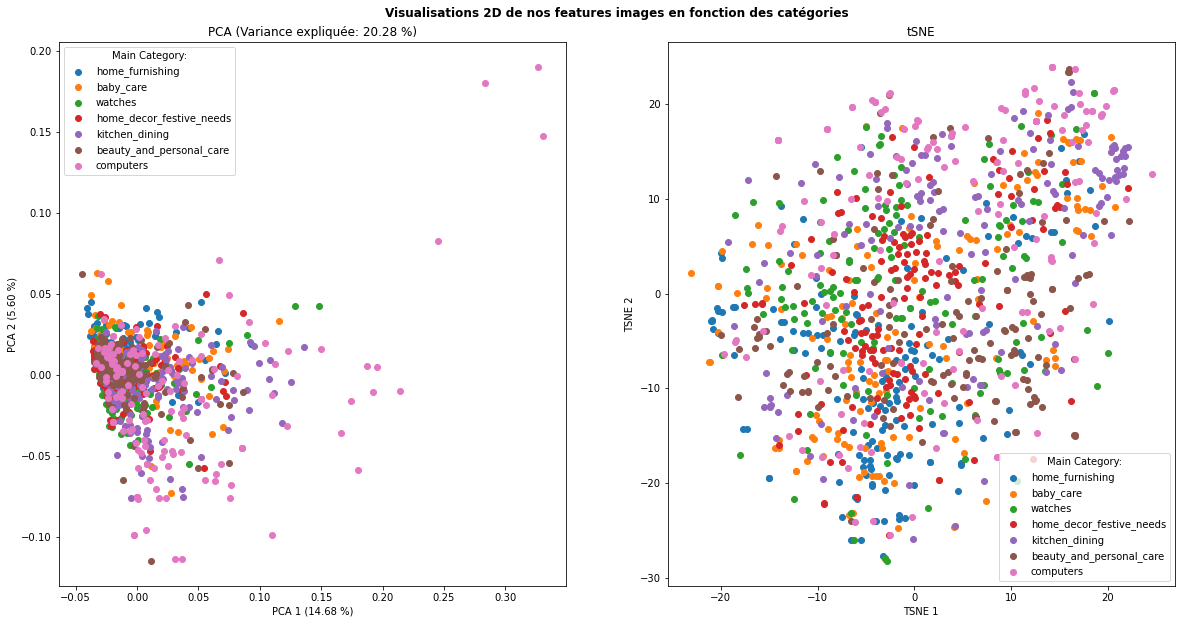

In [86]:
# CLUSTERING
init_time = time.time()
# let's use the square roots of our number of cluster to find kmeans clusters of our descriptors
k_clusters = 400
# clustering
k_means_mini_batch_descr1 = MiniBatchKMeans(n_clusters=k_clusters, init_size=3*k_clusters, batch_size=2048, random_state=10)
k_means_mini_batch_descr1.fit(sift_descr_all)
time1 = time.time()
time_minibatch_kmeans = time1 - init_time

print(f"Nombre de clusters pour les descripteurs: {k_clusters} ")
print(f"Temps de traitement du clustering: {time_minibatch_kmeans} s")

# HISTOGRAM
# treatment of all the image
hist_desc_all_img = list()
for index, desc_img in enumerate(sift_descr_img):
    hist_img = hist_count_img(k_means_mini_batch_descr1, desc_img)
    hist_desc_all_img.append(hist_img)

print(f'Taille du bag of visual words: {len(hist_desc_all_img)}')
img_features_sift1 = np.asarray(hist_desc_all_img)
print(f"Dimension des features BoVW:{img_features_sift1.shape}")
# VIZUALISATION
# PCA
pca_red = decomposition.PCA(n_components=2)
img_features_pca_projected = pca_red.fit_transform(img_features_sift1)
# tSNE
tsne_red = manifold.TSNE(n_components=2, perplexity=30,
                         n_jobs=-1, random_state=0)
img_features_tsne_projected = tsne_red.fit_transform(img_features_sift1)
# Ploting
figure_2D_Visualization = plt.figure(figsize=(20, 10))
plt.title('Visualisations 2D de nos features images en fonction des catégories', fontweight='bold', pad=25)
plt.axis('off')

figure_2D_Visualization.add_subplot(1,2,1)
plt.title(f'PCA (Variance expliquée: {pca_red.explained_variance_ratio_.sum()*100:.2f} %)')
for g in df_data_img['main_category'].unique():
    i = np.where(df_data_img['main_category'] == g)
    plt.scatter(img_features_pca_projected[i, 0], img_features_pca_projected[i, 1], label=g)
plt.xlabel(f'PCA 1 ({pca_red.explained_variance_ratio_[0]*100:.2f} %)')
plt.ylabel(f'PCA 2 ({pca_red.explained_variance_ratio_[1]*100:.2f} %)')
plt.legend(title='Main Category:')
figure_2D_Visualization.add_subplot(1,2,2)
plt.title('tSNE')
for g in df_data_img['main_category'].unique():
    i = np.where(df_data_img['main_category'] == g)
    plt.scatter(img_features_tsne_projected[i, 0], img_features_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Main Category:')
plt.show()

--> It seems that there is no improvement in the visualization of our products...

#### Clustering with image features SIFT

Kmeans

figure not saved


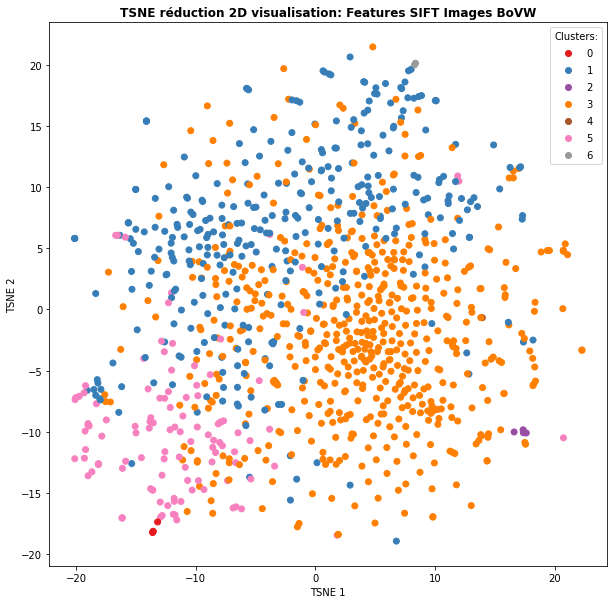

In [87]:
X = img_features_sift
k_means7_model0_bovw_sift = KMeans(n_clusters=7, random_state=4)
k_means7_model0_bovw_sift.fit(X)
cluster_2D_TSNE_viz(X, k_means7_model0_bovw_sift, comment='Features SIFT Images BoVW')

Agglomerative clustering

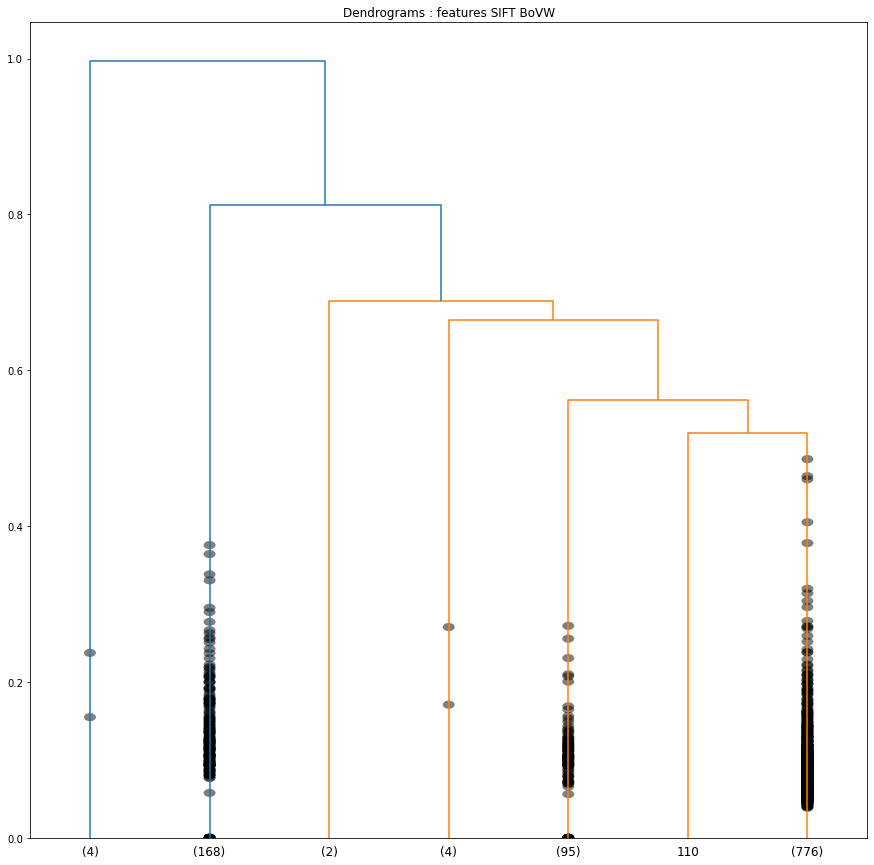

figure not saved


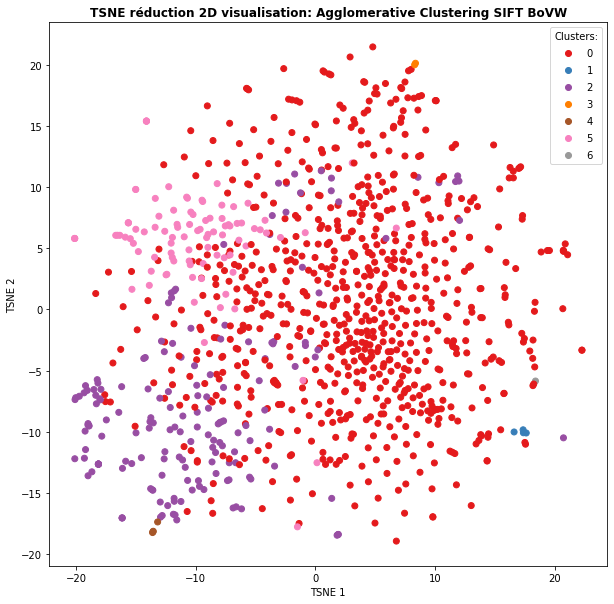

In [88]:
# let's use a dendogram to represent our data
plt.figure(figsize=(15, 15))
plt.title("Dendrograms : features SIFT BoVW")
dend = shc.dendrogram(shc.linkage(X, method='ward'),
                      p=7, truncate_mode='lastp', show_contracted=True)
plt.show()
# training model and viz
h_model0_bovw_sift = AgglomerativeClustering(n_clusters=7)
h_model0_bovw_sift.fit_predict(X)
cluster_2D_TSNE_viz(X, h_model0_bovw_sift,
                    comment='Agglomerative Clustering SIFT BoVW')

Kmeans with dimension reduction (99% of the variance explained)

Dimension des nouvelles features: (1050, 556)
figure not saved


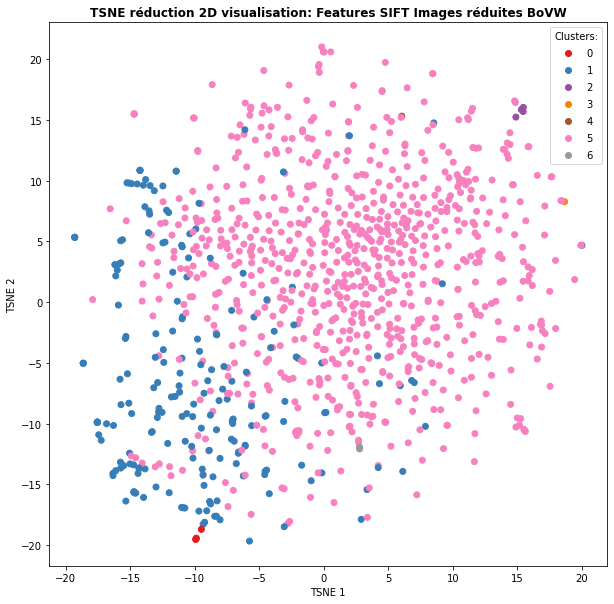

In [89]:
pca_red = decomposition.PCA(n_components=0.99)
X_reduced = pca_red.fit_transform(img_features_sift)
print(f"Dimension des nouvelles features: {X_reduced.shape}")
k_means7_model0_bovw_sift_reduced = KMeans(n_clusters=7, random_state=4)
k_means7_model0_bovw_sift_reduced.fit(X_reduced)
cluster_2D_TSNE_viz(X_reduced, k_means7_model0_bovw_sift_reduced, comment='Features SIFT Images réduites BoVW')

Clustering Results

In [90]:
tab_result2 = pd.DataFrame(
    [], columns=['Model', 'nb_cluster', 'Davies_bouldin_score', 'Silhouette_score', 'comment', 'similarity with category'])
# Function to add result to our dataframe results


def metrics_clusters_img(data, nb_clusters, cluster_model, model_name, tab_result, comment=None):
    '''Function create a Series of metrics for a model input with its data
    You must enter model name as str, nb of cluster and the data used for the model'''
    row = pd.Series(data={'Model': model_name, 'nb_cluster': f'{nb_clusters:.0f}', 'Davies_bouldin_score': metrics.davies_bouldin_score(
        data, cluster_model.labels_), 'Silhouette_score': metrics.silhouette_score(data, cluster_model.labels_), 'comment': comment,
        'similarity with category': metrics.adjusted_rand_score(df_data_img['True_labels'], cluster_model.labels_)}, name=len(tab_result))
    tab_result = tab_result.append(row)
    return tab_result

In [91]:
tab_result2 = metrics_clusters_img(X, 7, k_means7_model0_bovw_sift, 'Kmeans', tab_result2, 'features SIFT')
tab_result2 = metrics_clusters_img(X, 7, h_model0_bovw_sift, 'Agglomerative clustering', tab_result2, 'features SIFT')
tab_result2 = metrics_clusters_img(X_reduced, 7, k_means7_model0_bovw_sift_reduced, 'Kmeans', tab_result2, 'features SIFT reduced')
tab_result2

Model nb_cluster  Davies_bouldin_score  \
0                    Kmeans          7              2.502546   
1  Agglomerative clustering          7              1.952732   
2                    Kmeans          7              1.537859   

   Silhouette_score                comment  similarity with category  
0          0.060763          features SIFT                  0.043956  
1          0.090348          features SIFT                  0.024528  
2          0.197191  features SIFT reduced                  0.022229

### **Features detection and clustering with ORB**

#### Example features detection on one image

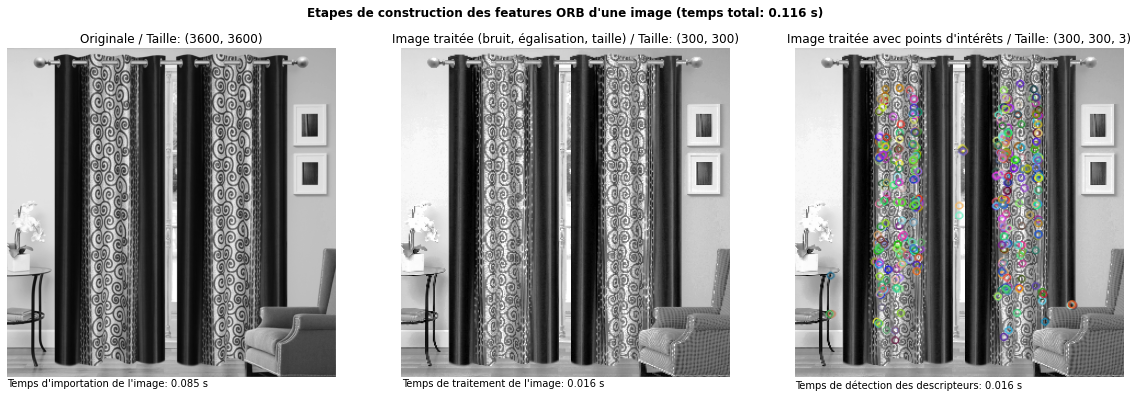

In [93]:
init_time = time.time()
# Image import
img = cv.imread(f'Images\\{df_data_img.image[0]}', cv.IMREAD_GRAYSCALE)
time1 = time.time()
# Image preprocessing
img_test = img_preprocess(img, (300, 300))
time2 = time.time()
# Features extraction with SIFT
orb = cv.ORB_create()
kp, desc = orb.detectAndCompute(img_test, None)
time3 = time.time()
img_test_orb = cv.drawKeypoints(img_test, kp, None)
# Plotting
figure_treatment = plt.figure(figsize=(20, 7))
plt.title(f"Etapes de construction des features ORB d'une image (temps total: {time3-init_time:.3f} s)", fontweight='bold')
plt.axis('off')
figure_treatment.add_subplot(1,3,1)
plt.title(f"Originale / Taille: {img.shape}")
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.text( 0, 3700, f"Temps d'importation de l'image: {time1-init_time:.3f} s")
figure_treatment.add_subplot(1,3,2)
plt.title(f"Image traitée (bruit, égalisation, taille) / Taille: {img_test.shape}")
plt.axis('off')
plt.imshow(img_test, cmap='gray')
plt.text( 0, 308, f"Temps de traitement de l'image: {time2-time1:.3f} s")
figure_treatment.add_subplot(1,3,3)
plt.title(f"Image traitée avec points d'intérêts / Taille: {img_test_sift.shape}")
plt.axis('off')
plt.imshow(img_test_orb)
plt.text( 0, 310, f"Temps de détection des descripteurs: {time3-time2:.3f} s")
plt.show()

In [94]:
desc.shape

(459, 32)

#### Treatment and ORB features extractions and creation of histogram features (by clustering)

Temps de traitement ORB: 14.96 s
Nombre total de descpriteurs: 467101
Nombre de clusters pour les descripteurs: 683 
Temps de traitement du clustering: 47.797693490982056 s
Taille du bag of visual words: 1050
Dimension des features BoVW:(1050, 683)


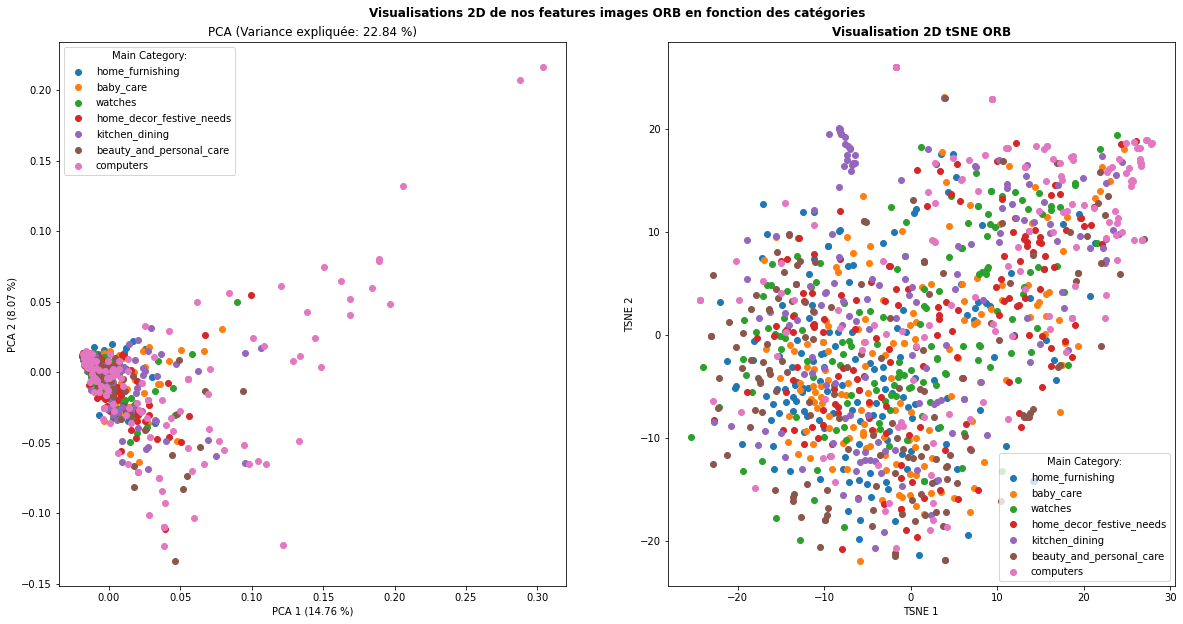

In [95]:
# ORB descriptors for all image
init_time = time.time()
orb_descr_img = list()
orb = cv.ORB_create()
for im in df_data_img['image']:
    img = cv.imread(f'Images\\{im}', cv.IMREAD_GRAYSCALE)
    img = img_preprocess(img, (300, 300))
    kp, desc = orb.detectAndCompute(img, None)
    orb_descr_img.append(desc)
    time_end = time.time()
orb_descr_all = np.concatenate(orb_descr_img, axis=0)
print(f"Temps de traitement ORB: {time_end - init_time:.2f} s")
print(f"Nombre total de descpriteurs: {orb_descr_all.shape[0]}")

# CLUSTERING
init_time = time.time()
# let's use the square roots of our number of cluster to find kmeans clusters of our descriptors
k_clusters = int(round(np.sqrt(orb_descr_all.shape[0]),0))
# clustering
k_means_mini_batch_descr2 = MiniBatchKMeans(n_clusters=k_clusters, init_size=3*k_clusters, batch_size=2048, random_state=10)
k_means_mini_batch_descr2.fit(orb_descr_all)
time1 = time.time()
time_minibatch_kmeans = time1 - init_time

print(f"Nombre de clusters pour les descripteurs: {k_clusters} ")
print(f"Temps de traitement du clustering: {time_minibatch_kmeans} s")

# HISTOGRAM
# treatment of all the image
hist_desc_all_img = list()
for index, desc_img in enumerate(orb_descr_img):
    hist_img = hist_count_img(k_means_mini_batch_descr2, desc_img)
    hist_desc_all_img.append(hist_img)

print(f'Taille du bag of visual words: {len(hist_desc_all_img)}')
img_features_orb = np.asarray(hist_desc_all_img)
print(f"Dimension des features BoVW:{img_features_orb.shape}")
# VIZUALISATION
# PCA
pca_red = decomposition.PCA(n_components=2)
img_features_pca_projected = pca_red.fit_transform(img_features_orb)
# tSNE
tsne_red = manifold.TSNE(n_components=2, perplexity=30,
                         n_jobs=-1, random_state=0)
img_features_tsne_projected = tsne_red.fit_transform(img_features_orb)
# Ploting
figure_2D_Visualization = plt.figure(figsize=(20, 10))
plt.title('Visualisations 2D de nos features images ORB en fonction des catégories', fontweight='bold', pad=25)
plt.axis('off')

figure_2D_Visualization.add_subplot(1,2,1)
plt.title(f'PCA (Variance expliquée: {pca_red.explained_variance_ratio_.sum()*100:.2f} %)')
for g in df_data_img['main_category'].unique():
    i = np.where(df_data_img['main_category'] == g)
    plt.scatter(img_features_pca_projected[i, 0], img_features_pca_projected[i, 1], label=g)
plt.xlabel(f'PCA 1 ({pca_red.explained_variance_ratio_[0]*100:.2f} %)')
plt.ylabel(f'PCA 2 ({pca_red.explained_variance_ratio_[1]*100:.2f} %)')
plt.legend(title='Main Category:')
figure_2D_Visualization.add_subplot(1,2,2)
plt.title('Visualisation 2D tSNE ORB', fontweight = 'bold')
for g in df_data_img['main_category'].unique():
    i = np.where(df_data_img['main_category'] == g)
    plt.scatter(img_features_tsne_projected[i, 0], img_features_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Main Category:')
plt.show()

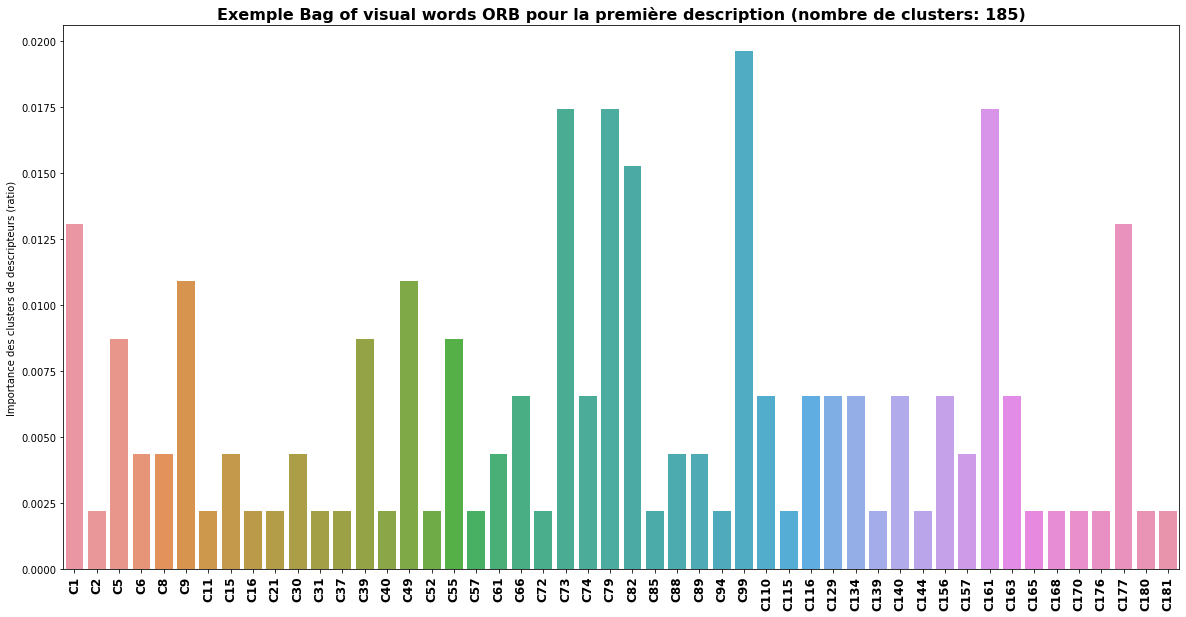

In [96]:
# Represent an example of Bag of visual words ORB feature
df_ORB_feat = pd.DataFrame(data = img_features_orb, columns=[f'C{i}' for i in range(0, img_features_orb.shape[1])])
example_ORB = df_ORB_feat.iloc[0,:].copy()
example_ORB = example_ORB[example_ORB != 0]
figure_5 = plt.figure(figsize=(20,10))
plt.title(f'Exemple Bag of visual words ORB pour la première description (nombre de clusters: {len(example_ORB.index)})',
          fontweight = 'bold', fontsize=16)
sns.barplot(x = example_ORB.index[0:50], y = example_ORB.values[0:50]) # There are to many visual words to represent, we only take the first 50.
plt.ylabel('Importance des clusters de descripteurs (ratio)')
plt.xticks(rotation = 90, fontweight='bold', fontsize=12)
# plt.savefig('Exemple ORB_50_first_cluster.jpg', dpi=300, bbox_inches='tight')
plt.show()

--> PCA Reduction

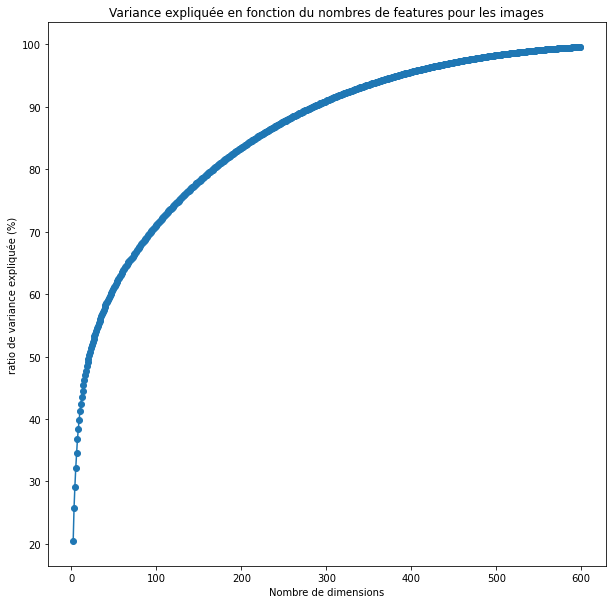

In [60]:
variance_expl_bovw = list()
for n in range(2, 600):
    pca_red = decomposition.PCA(n_components=n)
    data_pca_projected = pca_red.fit_transform(img_features_orb)
    variance_expl_bovw.append(pca_red.explained_variance_ratio_.sum()*100)

figure_PCA_variance = plt.figure(figsize=(10,10))
plt.title("Variance expliquée en fonction du nombres de features pour les images")
plt.plot(range(2, 600), variance_expl_bovw, 'o-')
plt.xlabel('Nombre de dimensions')
plt.ylabel('ratio de variance expliquée (%)')
plt.show()

Dimension reduction at 300 features should keep at least 90% of the variance explained

#### Clustering with image features ORB

Kmeans

figure not saved


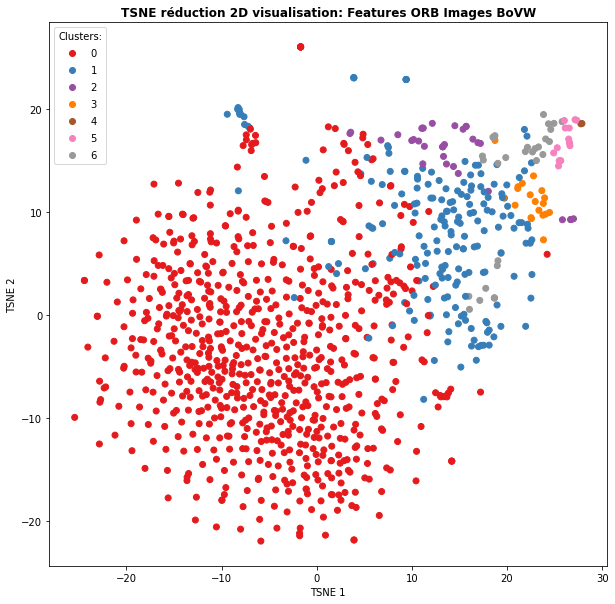

In [97]:
X = img_features_orb
k_means7_model0_bovw_orb = KMeans(n_clusters=7, random_state=4)
k_means7_model0_bovw_orb.fit(X)
cluster_2D_TSNE_viz(X, k_means7_model0_bovw_orb, comment='Features ORB Images BoVW')

Agglomerative Clustering

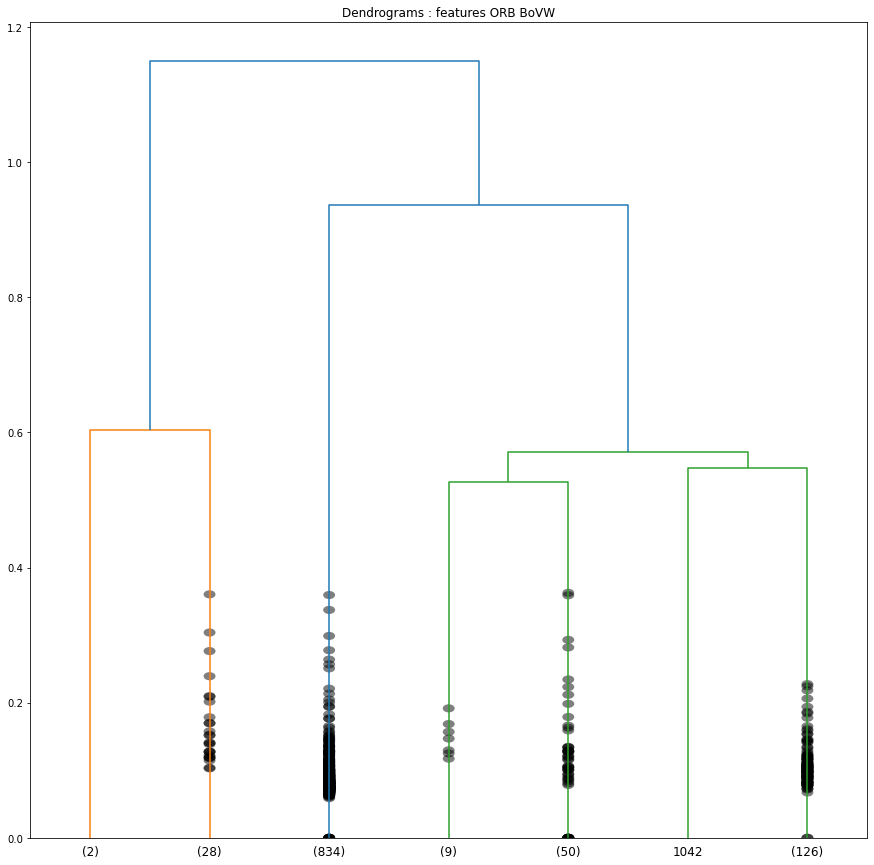

figure not saved


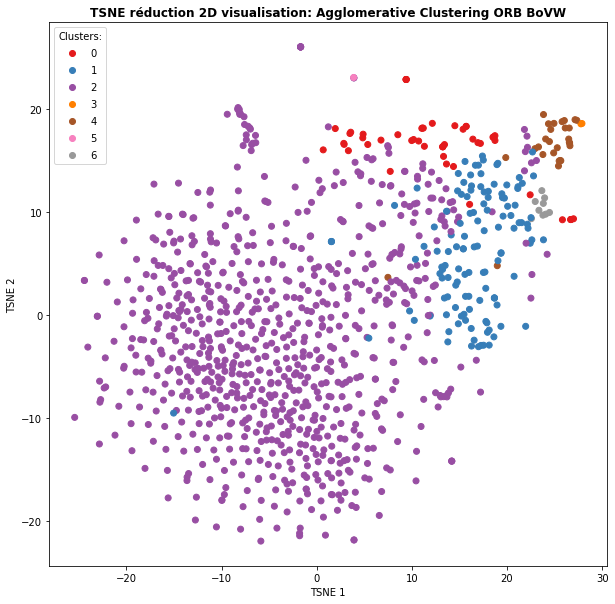

In [98]:
# let's use a dendogram to represent our data
plt.figure(figsize=(15, 15))
plt.title("Dendrograms : features ORB BoVW")
dend = shc.dendrogram(shc.linkage(X, method='ward'),
                      p=7, truncate_mode='lastp', show_contracted=True)
plt.show()
# training model and viz
h_model0_bovw_orb = AgglomerativeClustering(n_clusters=7)
h_model0_bovw_orb.fit_predict(X)
cluster_2D_TSNE_viz(X, h_model0_bovw_orb,
                    comment='Agglomerative Clustering ORB BoVW')

Kmeans with features reduced

Dimension des nouvelles features: (1050, 547)
figure not saved


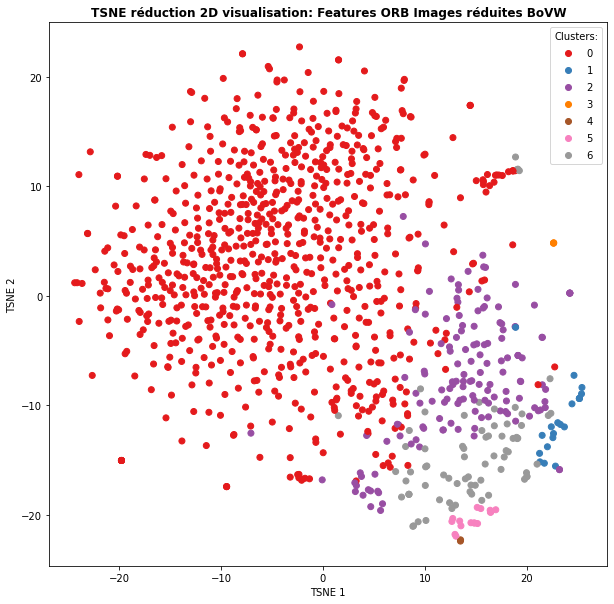

In [100]:
pca_red = decomposition.PCA(n_components=0.99)
X_reduced = pca_red.fit_transform(img_features_orb)
print(f"Dimension des nouvelles features: {X_reduced.shape}")
k_means7_model0_bovw_orb_reduced = KMeans(n_clusters=7, random_state=4)
k_means7_model0_bovw_orb_reduced.fit(X_reduced)
cluster_2D_TSNE_viz(X_reduced, k_means7_model0_bovw_orb_reduced, comment='Features ORB Images réduites BoVW')

Clustering Results

In [101]:
tab_result2 = metrics_clusters_img(X, 7, k_means7_model0_bovw_orb, 'Kmeans', tab_result2, 'features ORB')
tab_result2 = metrics_clusters_img(X, 7, h_model0_bovw_orb, 'Agglomerative clustering', tab_result2, 'features ORB')
tab_result2 = metrics_clusters_img(X_reduced, 7, k_means7_model0_bovw_orb_reduced, 'Kmeans', tab_result2, 'features ORB reduced')
tab_result2

Model nb_cluster  Davies_bouldin_score  \
0                    Kmeans          7              2.502546   
1  Agglomerative clustering          7              1.952732   
2                    Kmeans          7              1.537859   
3                    Kmeans          7              2.461319   
4  Agglomerative clustering          7              1.927591   
5                    Kmeans          7              2.199987   

   Silhouette_score                comment  similarity with category  
0          0.060763          features SIFT                  0.043956  
1          0.090348          features SIFT                  0.024528  
2          0.197191  features SIFT reduced                  0.022229  
3          0.130456           features ORB                  0.013844  
4          0.159531           features ORB                  0.012629  
5          0.146239   features ORB reduced                  0.013421

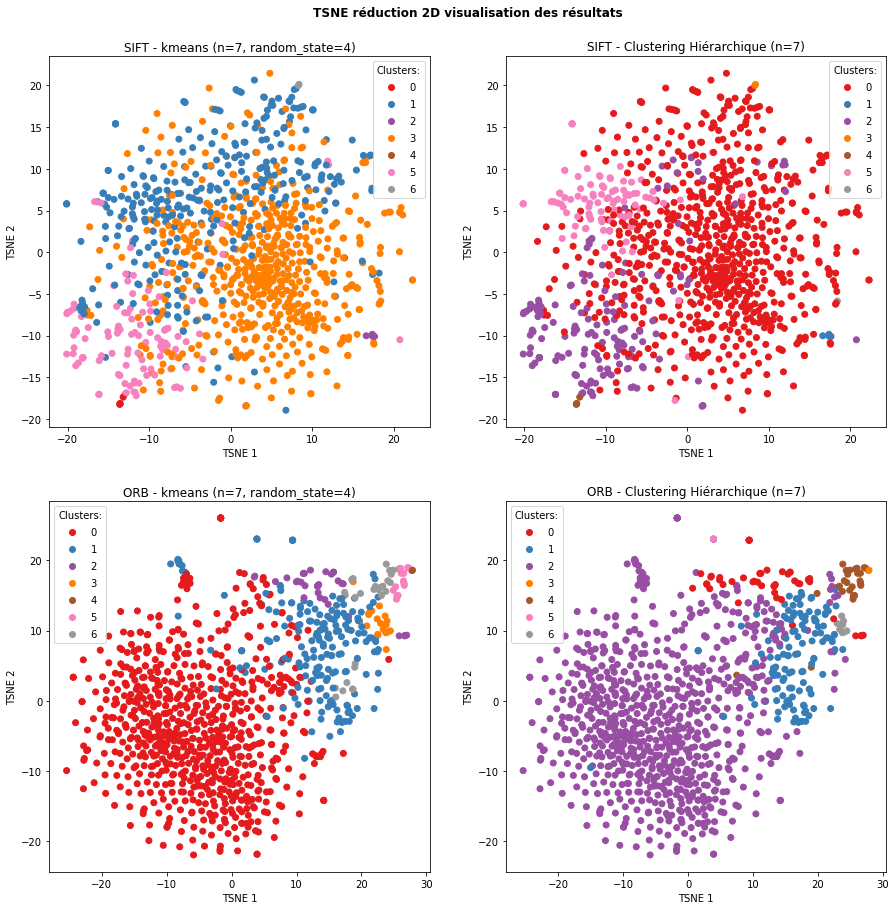

In [102]:
# Ploting 2D results
tsne_red = manifold.TSNE(
        n_components=2, perplexity=30, n_jobs=-1, random_state=0)
data_tsne_projected0 = tsne_red.fit_transform(img_features_sift)

tsne_red = manifold.TSNE(
        n_components=2, perplexity=30, n_jobs=-1, random_state=0)
data_tsne_projected1 = tsne_red.fit_transform(img_features_orb)

figure_results = plt.figure(figsize=(15, 15))
plt.title(f'TSNE réduction 2D visualisation des résultats', fontweight='bold', pad=40)
plt.axis('off')
figure_results.add_subplot(2,2,1)
plt.title('SIFT - kmeans (n=7, random_state=4)')
a = plt.scatter(data_tsne_projected0[:, 0], data_tsne_projected0[:, 1],
                    c=k_means7_model0_bovw_sift.labels_, cmap='Set1')
plt.legend(*a.legend_elements(), title='Clusters:')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
figure_results.add_subplot(2,2,2)
plt.title('SIFT - Clustering Hiérarchique (n=7)')
b = plt.scatter(data_tsne_projected0[:, 0], data_tsne_projected0[:, 1],
                    c=h_model0_bovw_sift.labels_, cmap='Set1')
plt.legend(*b.legend_elements(), title='Clusters:')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
figure_results.add_subplot(2,2,3)
plt.title('ORB - kmeans (n=7, random_state=4)')
c = plt.scatter(data_tsne_projected1[:, 0], data_tsne_projected1[:, 1],
                    c=k_means7_model0_bovw_orb.labels_, cmap='Set1')
plt.legend(*c.legend_elements(), title='Clusters:')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
figure_results.add_subplot(2,2,4)
plt.title('ORB - Clustering Hiérarchique (n=7)')
d = plt.scatter(data_tsne_projected1[:, 0], data_tsne_projected1[:, 1],
                    c=h_model0_bovw_orb.labels_, cmap='Set1')
plt.legend(*d.legend_elements(), title='Clusters:')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
#plt.savefig('Resultats_Images_SIFT_ORB_TSNE.jpg', dpi=300, bbox_inches='tight') 
plt.show()


### **Trying CNN algorithm with transfer learning (VGG 16) to extract feature with pre-trained model (without dense layers and classifier)**

#### Features extraction

In [103]:
# Model import without top (dense) layer and classifier
model_VGG16_feat = VGG16(include_top=False, input_shape=(224,224,3))
model_VGG16_feat.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [104]:
# Reading pictures, formating them to algorithm input and extract features
init_time = time.time()
features_vgg16_list = list()
for im in df_data_img['image']:
    img = load_img(f'Images\\{im}', target_size=(224,224))
    img = img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)
    img_features = model_VGG16_feat.predict(img)
    img_features = img_features.flatten()
    features_vgg16_list.append(img_features)

time1 = time.time()
print(f"Temps d'extraction des features avec le CNN pré_entrainé: {time1-init_time}")
# Transform list feature into array
features_vgg16 = np.array(features_vgg16_list)
print(f"Dimension des features: {features_vgg16.shape}")

C:\Users\ysene\anaconda3\envs\OpenClassRooms2\lib\site-packages\PIL\Image.py:2911: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Temps d'extraction des features avec le CNN pré_entrainé: 218.3974108695984
Dimension des features: (1050, 25088)


#### K_means clustering with features extract from VGG16 model

Temps de traitement du clustering final: 13.7220299243927


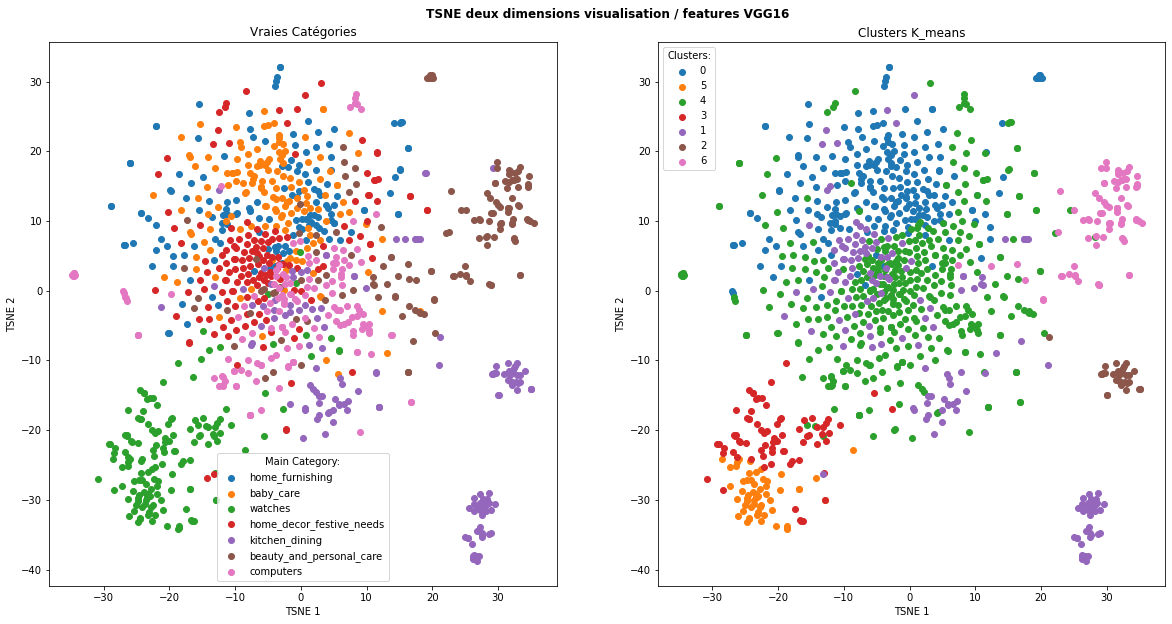

ARI score du clustering avec les vraies catégories: 0.25371533026996734


In [105]:
init_time = time.time()
X = features_vgg16
k_means7_model0_feat_vgg16 = KMeans(n_clusters=7, random_state=4)
k_means7_model0_feat_vgg16.fit(X)
time1 = time.time()
print(f"Temps de traitement du clustering final: {time1 - init_time}")
df_data_img['kmeans_clusters_features_VGG16_wh_top_layers'] = k_means7_model0_feat_vgg16.labels_
# plot true labels and cluster
tsne_red = manifold.TSNE(n_components=2, perplexity=30,
                         n_jobs=-1, random_state=0)
data_tsne_projected = tsne_red.fit_transform(X)
figure_tsne = plt.figure(figsize=(20, 10))
plt.title('TSNE deux dimensions visualisation / features VGG16',
          fontweight='bold', pad=25)
plt.axis('off')
figure_tsne.add_subplot(1, 2, 1)
plt.title('Vraies Catégories')
for g in df_data_img['main_category'].unique():
    i = np.where(df_data_img['main_category'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Main Category:')
figure_tsne.add_subplot(1, 2, 2)
plt.title('Clusters K_means')
for g in df_data_img['kmeans_clusters_features_VGG16_wh_top_layers'].unique():
    i = np.where(df_data_img['kmeans_clusters_features_VGG16_wh_top_layers'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Clusters:')
plt.show()
print(f"ARI score du clustering avec les vraies catégories: {metrics.adjusted_rand_score(df_data_img['True_labels'], k_means7_model0_feat_vgg16.labels_)}")

#### K_means clustering with features extract from VGG16 model reduced (99% of the variance explained)

Dimension des nouvelles features: (1050, 940)
Temps de traitement du clustering final: 0.8330049514770508


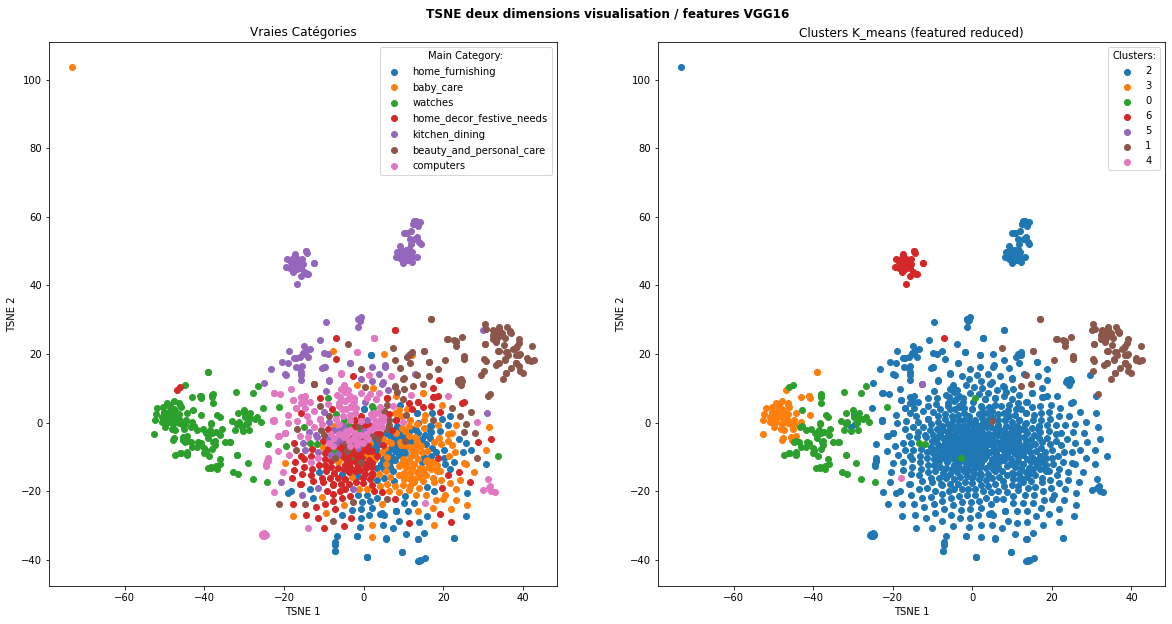

ARI score du clustering avec les vraies catégories: 0.09816375399526643


In [106]:
pca = decomposition.PCA(n_components=0.99)
features_vgg16_reduced = pca.fit_transform(features_vgg16)
print(f"Dimension des nouvelles features: {features_vgg16_reduced.shape}")
init_time = time.time()
X = features_vgg16_reduced
k_means7_model1_feat_vgg16 = KMeans(n_clusters=7, random_state=4)
k_means7_model1_feat_vgg16.fit(X)
time1 = time.time()
print(f"Temps de traitement du clustering final: {time1 - init_time}")
df_data_img['kmeans_clusters_features_red_VGG16_wh_top_layers'] = k_means7_model1_feat_vgg16.labels_
# plot true labels and cluster
tsne_red = manifold.TSNE(n_components=2, perplexity=30,
                         n_jobs=-1, random_state=0)
data_tsne_projected = tsne_red.fit_transform(X)
figure_tsne = plt.figure(figsize=(20, 10))
plt.title('TSNE deux dimensions visualisation / features VGG16',
          fontweight='bold', pad=25)
plt.axis('off')
figure_tsne.add_subplot(1, 2, 1)
plt.title('Vraies Catégories')
for g in df_data_img['main_category'].unique():
    i = np.where(df_data_img['main_category'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Main Category:')
figure_tsne.add_subplot(1, 2, 2)
plt.title('Clusters K_means (featured reduced)')
for g in df_data_img['kmeans_clusters_features_red_VGG16_wh_top_layers'].unique():
    i = np.where(df_data_img['kmeans_clusters_features_red_VGG16_wh_top_layers'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Clusters:')
plt.show()
print(f"ARI score du clustering avec les vraies catégories: {metrics.adjusted_rand_score(df_data_img['True_labels'], k_means7_model1_feat_vgg16.labels_)}")

#### Metrics

In [107]:
tab_result2 = metrics_clusters_img(features_vgg16, 7, k_means7_model0_feat_vgg16, 'Kmeans', tab_result2, 'features extracted VGG16 wh top layers')
tab_result2 = metrics_clusters_img(features_vgg16_reduced, 7, k_means7_model1_feat_vgg16, 'Kmeans', tab_result2, 'features extracted VGG16 reduced wh top layers')
tab_result2

Model nb_cluster  Davies_bouldin_score  \
0                    Kmeans          7              2.502546   
1  Agglomerative clustering          7              1.952732   
2                    Kmeans          7              1.537859   
3                    Kmeans          7              2.461319   
4  Agglomerative clustering          7              1.927591   
5                    Kmeans          7              2.199987   
6                    Kmeans          7              4.458182   
7                    Kmeans          7              2.351510   

   Silhouette_score                                         comment  \
0          0.060763                                   features SIFT   
1          0.090348                                   features SIFT   
2          0.197191                           features SIFT reduced   
3          0.130456                                    features ORB   
4          0.159531                                    features ORB   
5          0.146239                            features ORB reduced   
6          0.020824          features extracted VGG16 wh top layers   
7          0.097723  features extracted VGG16 reduced wh top layers   

   similarity with category  
0                  0.043956  
1                  0.024528  
2                  0.022229  
3                  0.013844  
4                  0.012629  
5                  0.013421  
6                  0.253715  
7                  0.098164

#### Confusion matrix with real category and selected model

In [108]:
metrics.confusion_matrix(df_data_img['True_labels'], k_means7_model0_feat_vgg16.labels_)

array([[108,   7,   0,   0,  35,   0,   0],
       [ 13,   7,   0,   0,  52,   0,  78],
       [  3,   2,   0,   0, 144,   0,   1],
       [ 14,  59,   0,   0,  76,   1,   0],
       [104,   1,   0,   0,  45,   0,   0],
       [  0,  78,  31,   0,  40,   0,   1],
       [  0,   2,   0,  75,  17,  56,   0]], dtype=int64)

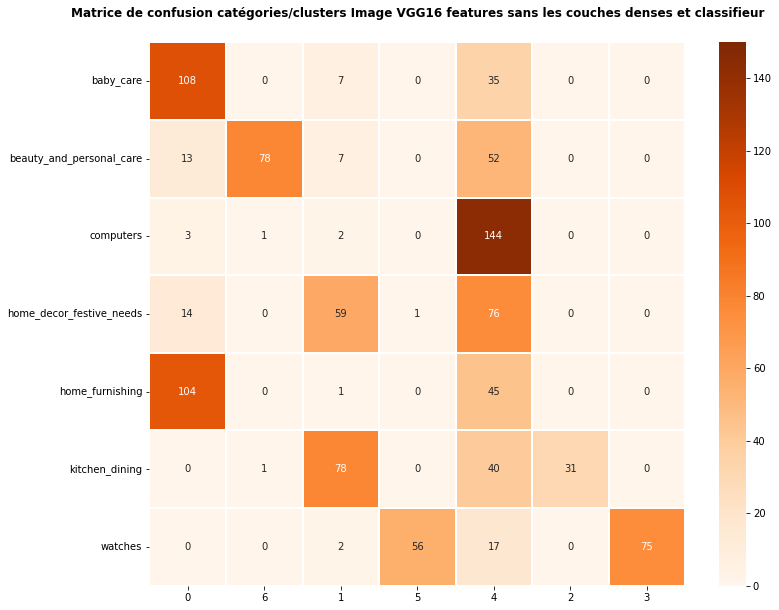

ARI score: 0.25


In [109]:
confu_m = metrics.confusion_matrix(
    df_data_img.True_labels, transform_manu_clusters(k_means7_model0_feat_vgg16.labels_, corresp = [0, 2, 5, 6, 4, 3, 1]))

df_confusion_m1 = pd.DataFrame(confu_m, index=label_encod.classes_,
                              columns=[0, 6, 1, 5, 4, 2, 3])
figure_confm = plt.figure(figsize=(12, 10))
plt.title('Matrice de confusion catégories/clusters Image VGG16 features sans les couches denses et classifieur', fontweight='bold', pad=25)
sns.heatmap(df_confusion_m1, fmt='.3g',cmap='Oranges', annot=True, vmin=0, vmax=150, linewidths= 0.3)
plt.show()
print(f'ARI score: {metrics.adjusted_rand_score(df_data_img.True_labels, k_means7_model0_feat_vgg16.labels_):.2f}')

### **Trying CNN algorithm with transfer learning (VGG 16) to extract feature with pre-trained model (without classifier)**

#### Features extraction

In [110]:
# Model import and modifications to include the dense layer without classifier
model_VGG16_1_feat = VGG16(input_shape=(224,224,3))
# Removing the classifier
model_VGG16_1_feat = Model(inputs=model_VGG16_1_feat.inputs, outputs=model_VGG16_1_feat.layers[-2].output)
model_VGG16_1_feat.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [111]:
# Reading pictures, formating them to algorithm input and extract features
init_time = time.time()
features_vgg16_1_list = list()
for im in df_data_img['image']:
    img = load_img(f'Images\\{im}', target_size=(224,224))
    img = img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)
    img_features = model_VGG16_1_feat.predict(img)
    features_vgg16_1_list.append(img_features)

time1 = time.time()
print(f"Temps d'extraction des features avec le CNN pré_entrainé: {time1-init_time}")
# Transform list feature into array
features_vgg16_1 = np.array(features_vgg16_1_list)
features_vgg16_1 = np.concatenate(features_vgg16_1, axis=0)
print(f"Dimension des features: {features_vgg16_1.shape}")

C:\Users\ysene\anaconda3\envs\OpenClassRooms2\lib\site-packages\PIL\Image.py:2911: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Temps d'extraction des features avec le CNN pré_entrainé: 256.89347434043884
Dimension des features: (1050, 4096)


#### K_means clustering with features extract from VGG16 model without classifier

Temps de traitement du clustering final: 2.9565298557281494


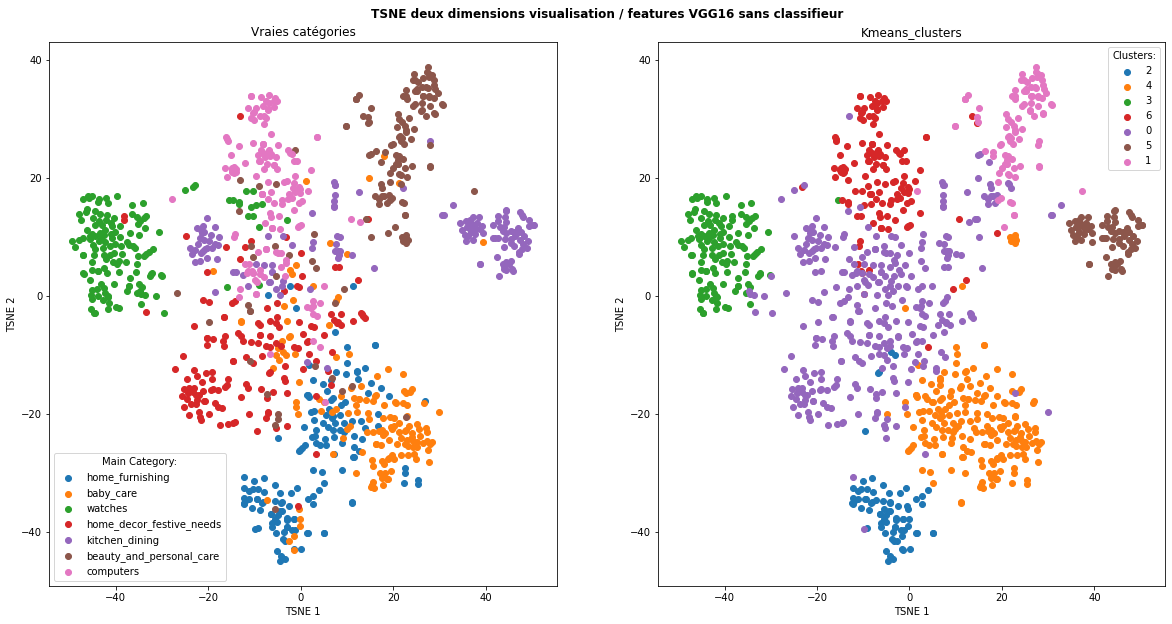

ARI score du clustering avec les vraies catégories: 0.42003968036595046


In [112]:
init_time = time.time()
X = features_vgg16_1
k_means7_model0_feat_vgg16_1 = KMeans(n_clusters=7, random_state=4)
k_means7_model0_feat_vgg16_1.fit(X)
time1 = time.time()
print(f"Temps de traitement du clustering final: {time1 - init_time}")
df_data_img['kmeans_clusters_features_VGG16_wh_classifier'] = k_means7_model0_feat_vgg16_1.labels_
# plot true labels and cluster
tsne_red = manifold.TSNE(n_components=2, perplexity=30,
                         n_jobs=-1, random_state=0)
data_tsne_projected = tsne_red.fit_transform(X)
figure_tsne = plt.figure(figsize=(20, 10))
plt.title('TSNE deux dimensions visualisation / features VGG16 sans classifieur',
          fontweight='bold', pad=25)
plt.axis('off')
figure_tsne.add_subplot(1, 2, 1)
plt.title('Vraies catégories')
for g in df_data_img['main_category'].unique():
    i = np.where(df_data_img['main_category'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Main Category:')
figure_tsne.add_subplot(1, 2, 2)
plt.title('Kmeans_clusters')
for g in df_data_img['kmeans_clusters_features_VGG16_wh_classifier'].unique():
    i = np.where(df_data_img['kmeans_clusters_features_VGG16_wh_classifier'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Clusters:')
plt.show()
print(f"ARI score du clustering avec les vraies catégories: {metrics.adjusted_rand_score(df_data_img['True_labels'], k_means7_model0_feat_vgg16_1.labels_)}")

#### K_means clustering with features extract from VGG16 model without classifier reduced (99% of the variance explained)

Dimension des nouvelles features: (1050, 940)
Temps de traitement du clustering final: 0.7361207008361816


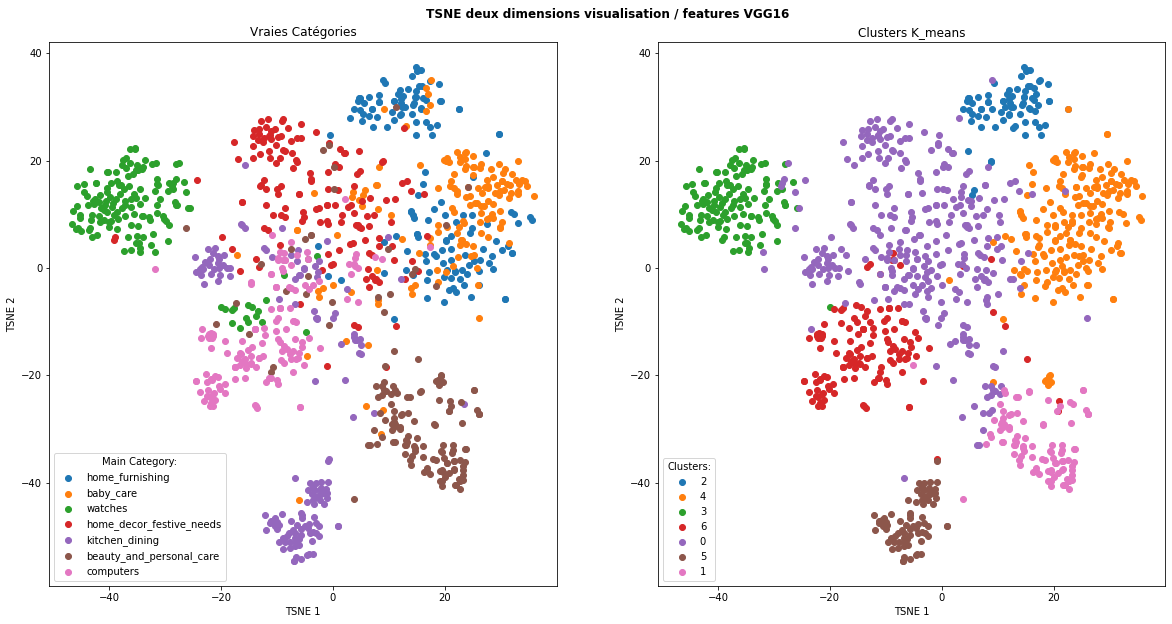

ARI score du clustering avec les vraies catégories: 0.4223202223892987


In [113]:
pca = decomposition.PCA(n_components=0.99)
features_vgg16_reduced_1 = pca.fit_transform(features_vgg16_1)
print(f"Dimension des nouvelles features: {features_vgg16_reduced.shape}")
init_time = time.time()
X = features_vgg16_reduced_1
k_means7_model1_feat_vgg16_1 = KMeans(n_clusters=7, random_state=4)
k_means7_model1_feat_vgg16_1.fit(X)
time1 = time.time()
print(f"Temps de traitement du clustering final: {time1 - init_time}")
df_data_img['kmeans_clusters_features_red_VGG16_wh_classifier'] = k_means7_model1_feat_vgg16_1.labels_
# plot true labels and cluster
tsne_red = manifold.TSNE(n_components=2, perplexity=30,
                         n_jobs=-1, random_state=0)
data_tsne_projected = tsne_red.fit_transform(X)
figure_tsne = plt.figure(figsize=(20, 10))
plt.title('TSNE deux dimensions visualisation / features VGG16',
          fontweight='bold', pad=25)
plt.axis('off')
figure_tsne.add_subplot(1, 2, 1)
plt.title('Vraies Catégories')
for g in df_data_img['main_category'].unique():
    i = np.where(df_data_img['main_category'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Main Category:')
figure_tsne.add_subplot(1, 2, 2)
plt.title('Clusters K_means')
for g in df_data_img['kmeans_clusters_features_red_VGG16_wh_classifier'].unique():
    i = np.where(df_data_img['kmeans_clusters_features_red_VGG16_wh_classifier'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend(title='Clusters:')
plt.show()
print(f"ARI score du clustering avec les vraies catégories: {metrics.adjusted_rand_score(df_data_img['True_labels'], k_means7_model1_feat_vgg16_1.labels_)}")

#### Metrics

In [114]:
tab_result2 = metrics_clusters_img(features_vgg16, 7, k_means7_model0_feat_vgg16_1, 'Kmeans', tab_result2, 'features extracted VGG16 without classifier')
tab_result2 = metrics_clusters_img(features_vgg16_reduced, 7, k_means7_model1_feat_vgg16_1, 'Kmeans', tab_result2, 'features extracted VGG16 without classifier reduced')
tab_result2

Model nb_cluster  Davies_bouldin_score  \
0                    Kmeans          7              2.502546   
1  Agglomerative clustering          7              1.952732   
2                    Kmeans          7              1.537859   
3                    Kmeans          7              2.461319   
4  Agglomerative clustering          7              1.927591   
5                    Kmeans          7              2.199987   
6                    Kmeans          7              4.458182   
7                    Kmeans          7              2.351510   
8                    Kmeans          7              5.028498   
9                    Kmeans          7              4.980836   

   Silhouette_score                                            comment  \
0          0.060763                                      features SIFT   
1          0.090348                                      features SIFT   
2          0.197191                              features SIFT reduced   
3          0.130456                                       features ORB   
4          0.159531                                       features ORB   
5          0.146239                               features ORB reduced   
6          0.020824             features extracted VGG16 wh top layers   
7          0.097723     features extracted VGG16 reduced wh top layers   
8         -0.012876        features extracted VGG16 without classifier   
9         -0.012200  features extracted VGG16 without classifier re...   

   similarity with category  
0                  0.043956  
1                  0.024528  
2                  0.022229  
3                  0.013844  
4                  0.012629  
5                  0.013421  
6                  0.253715  
7                  0.098164  
8                  0.420040  
9                  0.422320

In [115]:
tab_result2['Test'] = ['SIFT_Kmeans', 'SIFT_Clustering_Hiérarchique', 'SIFT_Kmeans_feat_red99',
                       'ORB_Kmeans', 'ORB_Clustering_Hiérarchique', 'ORB_Kmeans_feat_red99',
                       'VGG16_Kmeans_wh_top', 'VGG16_Kmeans_wh_top_feat_red99', 'VGG16_Kmeans_wh_class', 'VGG16_Kmeans_wh_class_feat_red99']
tab_result2

Model nb_cluster  Davies_bouldin_score  \
0                    Kmeans          7              2.502546   
1  Agglomerative clustering          7              1.952732   
2                    Kmeans          7              1.537859   
3                    Kmeans          7              2.461319   
4  Agglomerative clustering          7              1.927591   
5                    Kmeans          7              2.199987   
6                    Kmeans          7              4.458182   
7                    Kmeans          7              2.351510   
8                    Kmeans          7              5.028498   
9                    Kmeans          7              4.980836   

   Silhouette_score                                            comment  \
0          0.060763                                      features SIFT   
1          0.090348                                      features SIFT   
2          0.197191                              features SIFT reduced   
3          0.130456                                       features ORB   
4          0.159531                                       features ORB   
5          0.146239                               features ORB reduced   
6          0.020824             features extracted VGG16 wh top layers   
7          0.097723     features extracted VGG16 reduced wh top layers   
8         -0.012876        features extracted VGG16 without classifier   
9         -0.012200  features extracted VGG16 without classifier re...   

   similarity with category                              Test  
0                  0.043956                       SIFT_Kmeans  
1                  0.024528      SIFT_Clustering_Hiérarchique  
2                  0.022229            SIFT_Kmeans_feat_red99  
3                  0.013844                        ORB_Kmeans  
4                  0.012629       ORB_Clustering_Hiérarchique  
5                  0.013421             ORB_Kmeans_feat_red99  
6                  0.253715               VGG16_Kmeans_wh_top  
7                  0.098164    VGG16_Kmeans_wh_top_feat_red99  
8                  0.420040             VGG16_Kmeans_wh_class  
9                  0.422320  VGG16_Kmeans_wh_class_feat_red99

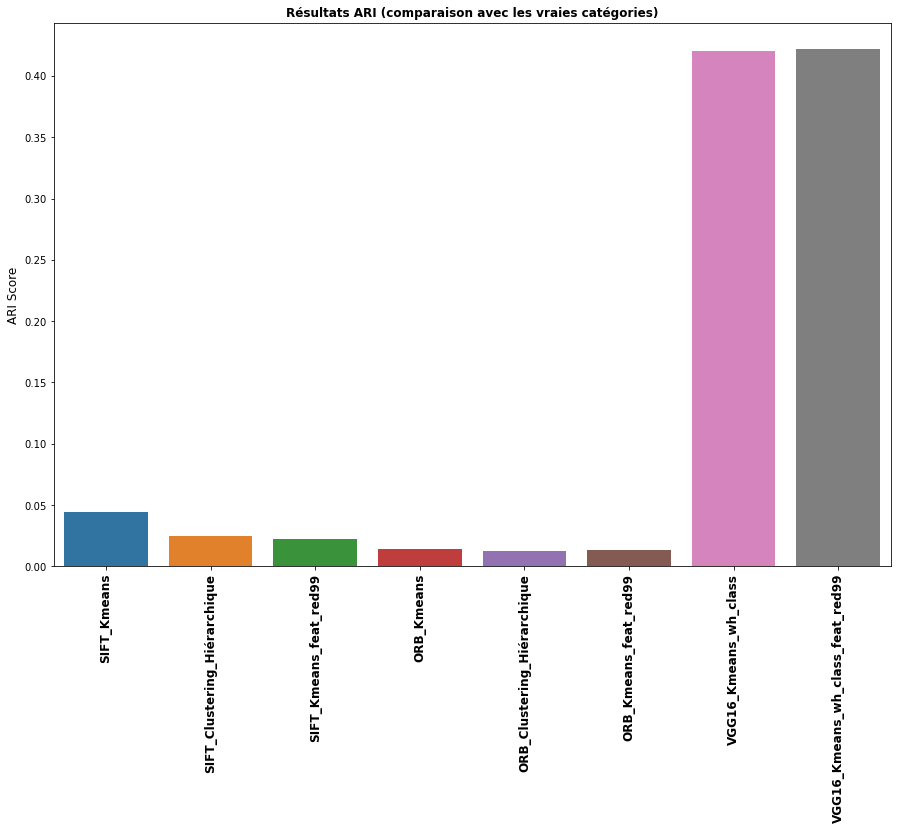

In [116]:
figure_results1 = plt.figure(figsize=(15,10))
plt.title('Résultats ARI (comparaison avec les vraies catégories)', fontweight='bold')
sns.barplot(x = tab_result2['Test'][[0,1,2,3,4,5,8,9]], y = tab_result2['similarity with category'][[0,1,2,3,4,5,8,9]])
plt.xticks(rotation=90, fontweight='bold', fontsize=12)
plt.xlabel('')
plt.ylabel( 'ARI Score', fontsize=12)
plt.savefig('Résultats ARI Images.jpg', dpi=300, bbox_inches='tight')
plt.show()

#### Confusion matrix with real category and selected model

In [117]:
metrics.confusion_matrix(df_data_img['True_labels'], k_means7_model1_feat_vgg16_1.labels_)

array([[ 30,   1,   9,   0, 108,   1,   1],
       [ 33,  94,   1,   0,  13,   0,   9],
       [ 36,   1,   0,   0,   1,   0, 112],
       [140,   0,   4,   2,   2,   0,   2],
       [  6,   0,  62,   0,  82,   0,   0],
       [ 71,   1,   0,   0,   0,  76,   2],
       [ 10,   0,   0, 127,   0,   0,  13]], dtype=int64)

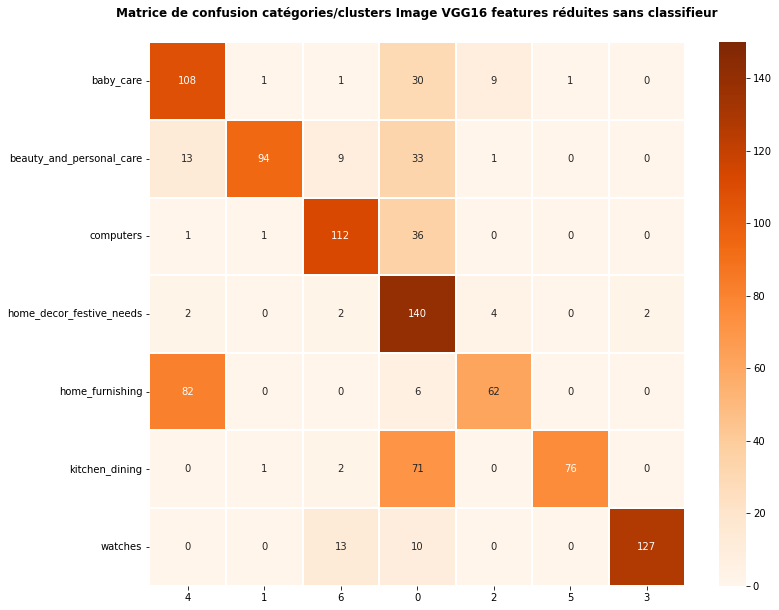

ARI score: 0.42


In [118]:
confu_m = metrics.confusion_matrix(
    df_data_img.True_labels, transform_manu_clusters(k_means7_model1_feat_vgg16_1.labels_, corresp = [3, 1, 4, 6, 0, 5, 2]))

df_confusion_m1 = pd.DataFrame(confu_m, index=label_encod.classes_,
                              columns=[4, 1, 6, 0, 2, 5, 3])
figure_confm = plt.figure(figsize=(12, 10))
plt.title('Matrice de confusion catégories/clusters Image VGG16 features réduites sans classifieur', fontweight='bold', pad=25)
sns.heatmap(df_confusion_m1, fmt='.3g',cmap='Oranges', annot=True, vmin=0, vmax=150, linewidths= 0.3)
plt.show()
print(f'ARI score: {metrics.adjusted_rand_score(df_data_img.True_labels, k_means7_model1_feat_vgg16_1.labels_):.2f}')

## **VI) Combination of features Images + Text**

### **Concatenate features Images and texte and using Kmeans**

#### Using raw features reduced for minimizing the number of feature in our Kmeans

In [119]:
print(f" Dimension features, Texte: {X_pca_tfidf.shape} / Images: {features_vgg16_reduced_1.shape}")
features_text_images_reduced = np.concatenate((X_pca_tfidf, features_vgg16_reduced_1), axis=1)
print(f" Dimension concatenate features: {features_text_images_reduced.shape}")

 Dimension features, Texte: (1050, 809) / Images: (1050, 803)
 Dimension concatenate features: (1050, 1612)


#### Kmeans clustering with all features

Temps de traitement du clustering final: 0.7987632751464844


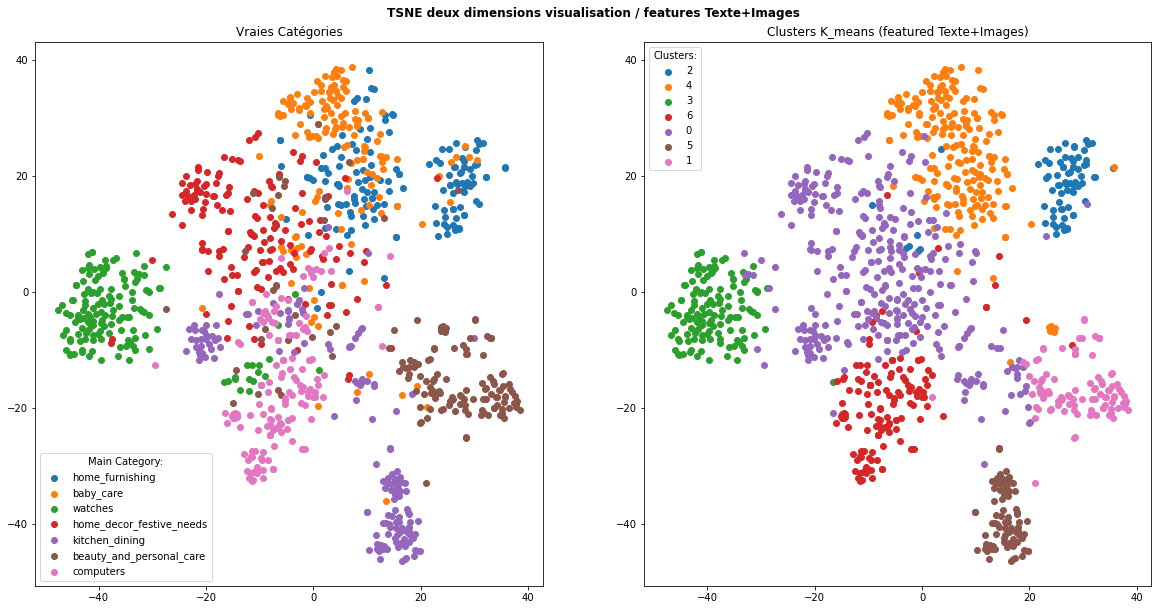

ARI score du clustering avec les vraies catégories: 0.4223202223892987


In [120]:
init_time = time.time()
X = features_text_images_reduced
k_means7_model_all_feat0 = KMeans(n_clusters=7, random_state=4)
k_means7_model_all_feat0.fit(X)
time1 = time.time()
print(f"Temps de traitement du clustering final: {time1 - init_time}")
df_data_img['kmeans_clusters_all_features'] = k_means7_model_all_feat0.labels_
# plot true labels and cluster
tsne_red = manifold.TSNE(n_components=2, perplexity=30,
                         n_jobs=-1, random_state=0)
data_tsne_projected = tsne_red.fit_transform(X)
figure_tsne = plt.figure(figsize=(20, 10))
plt.title('TSNE deux dimensions visualisation / features Texte+Images',
          fontweight='bold', pad=25)
plt.axis('off')
figure_tsne.add_subplot(1, 2, 1)
plt.title('Vraies Catégories')
for g in df_data_img['main_category'].unique():
    i = np.where(df_data_img['main_category'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.legend(title='Main Category:')
figure_tsne.add_subplot(1, 2, 2)
plt.title('Clusters K_means (featured Texte+Images)')
for g in df_data_img['kmeans_clusters_all_features'].unique():
    i = np.where(df_data_img['kmeans_clusters_all_features'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.legend(title='Clusters:')
plt.show()
print(f"ARI score du clustering avec les vraies catégories: {metrics.adjusted_rand_score(df_data_img['True_labels'], k_means7_model_all_feat0.labels_)}")

#### Metrics

In [123]:
tab_result2 = metrics_clusters_img(features_text_images_reduced, 7, k_means7_model_all_feat0, 'Kmeans', tab_result2, 'features Texte+Images reduced')
tab_result2

Model nb_cluster  Davies_bouldin_score  \
0                     Kmeans          7              2.502546   
1   Agglomerative clustering          7              1.952732   
2                     Kmeans          7              1.537859   
3                     Kmeans          7              2.461319   
4   Agglomerative clustering          7              1.927591   
5                     Kmeans          7              2.199987   
6                     Kmeans          7              4.458182   
7                     Kmeans          7              2.351510   
8                     Kmeans          7              5.028498   
9                     Kmeans          7              4.980836   
10                    Kmeans          7              2.980581   

    Silhouette_score                                            comment  \
0           0.060763                                      features SIFT   
1           0.090348                                      features SIFT   
2           0.197191                              features SIFT reduced   
3           0.130456                                       features ORB   
4           0.159531                                       features ORB   
5           0.146239                               features ORB reduced   
6           0.020824             features extracted VGG16 wh top layers   
7           0.097723     features extracted VGG16 reduced wh top layers   
8          -0.012876        features extracted VGG16 without classifier   
9          -0.012200  features extracted VGG16 without classifier re...   
10          0.087199                      features Texte+Images reduced   

    similarity with category  
0                   0.043956  
1                   0.024528  
2                   0.022229  
3                   0.013844  
4                   0.012629  
5                   0.013421  
6                   0.253715  
7                   0.098164  
8                   0.420040  
9                   0.422320  
10                  0.422320

#### Confusion matrix with real category and selected model

In [121]:
metrics.confusion_matrix(df_data_img['True_labels'], k_means7_model_all_feat0.labels_)

array([[ 30,   1,   9,   0, 108,   1,   1],
       [ 33,  94,   1,   0,  13,   0,   9],
       [ 36,   1,   0,   0,   1,   0, 112],
       [140,   0,   4,   2,   2,   0,   2],
       [  6,   0,  62,   0,  82,   0,   0],
       [ 71,   1,   0,   0,   0,  76,   2],
       [ 10,   0,   0, 127,   0,   0,  13]], dtype=int64)

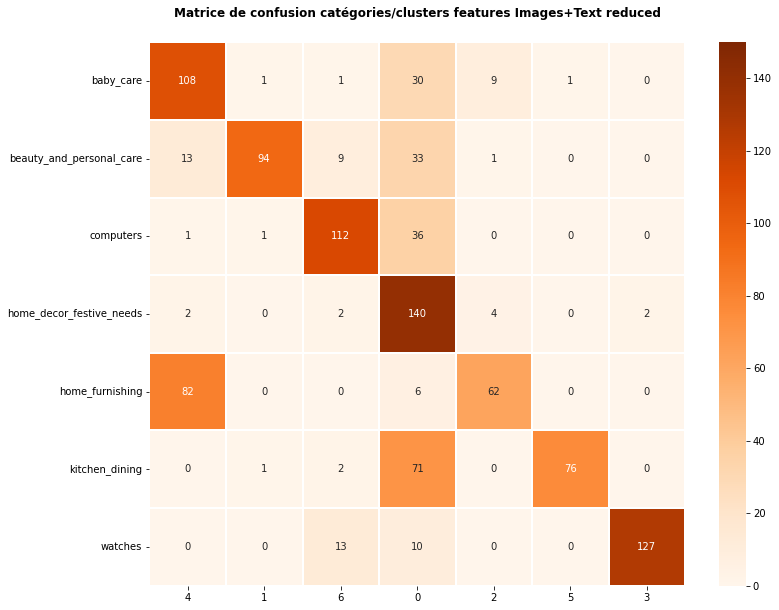

ARI score: 0.42


In [122]:
confu_m = metrics.confusion_matrix(
    df_data_img.True_labels, transform_manu_clusters(k_means7_model_all_feat0.labels_, corresp = [3, 1, 4, 6, 0, 5, 2]))

df_confusion_m1 = pd.DataFrame(confu_m, index=label_encod.classes_,
                              columns=[4, 1, 6, 0, 2, 5, 3])
figure_confm = plt.figure(figsize=(12, 10))
plt.title('Matrice de confusion catégories/clusters features Images+Text reduced', fontweight='bold', pad=25)
sns.heatmap(df_confusion_m1, fmt='.3g',cmap='Oranges', annot=True, vmin=0, vmax=150, linewidths= 0.3)
plt.show()
print(f'ARI score: {metrics.adjusted_rand_score(df_data_img.True_labels, k_means7_model_all_feat0.labels_):.2f}')

### **Concatenate clusters results of kmeans models of Images and Text and take a decision on the most accurate**

#### CLustering models precision calcul

In [123]:
precisions_clusters_img = metrics.precision_score(df_data_img.True_labels, transform_manu_clusters(k_means7_model1_feat_vgg16_1.labels_,
                                                                         corresp = [3, 1, 4, 6, 0, 5, 2]), average=None)
precisions_clusters_txt = metrics.precision_score(df_data_text.True_labels, transform_manu_clusters(k_means7_model_tfidf0.labels_,
                                                                                                  corresp = [3, 5, 6, 4, 1, 2, 0]), average=None)

#### Add corresp labels to each best kmeans model Images+Text to our base dataframe

In [124]:
df_data['True_labels'] = df_data_img['True_labels']
df_data['kmeans_clusters_tfidf_cor'] = transform_manu_clusters(k_means7_model_tfidf0.labels_, corresp = [3, 5, 6, 4, 1, 2, 0])
df_data['kmeans_clusters_VGG16_wh_classifier_red_cor'] = transform_manu_clusters(k_means7_model1_feat_vgg16_1.labels_,
                                                                                 corresp = [3, 1, 4, 6, 0, 5, 2])
df_data

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

#### Attribute cluster of a product with the precisions of the models

In [125]:
list_cluster_attr = list()
# comparing each cluster assignement by the kmeans model
for ind in df_data.index:
    a = df_data['kmeans_clusters_tfidf_cor'][ind]
    b = df_data['kmeans_clusters_VGG16_wh_classifier_red_cor'][ind]
    # Comparing clustering attributions
    if a != b:
        # Attribute the cluster on the more efficient clustering (by precision)
        if precisions_clusters_txt[a] > precisions_clusters_img[b]:
            list_cluster_attr.append(a)
        else:
            list_cluster_attr.append(b)        
    else:
        list_cluster_attr.append(a)
df_data['Cluster_combine_text_images'] = list_cluster_attr

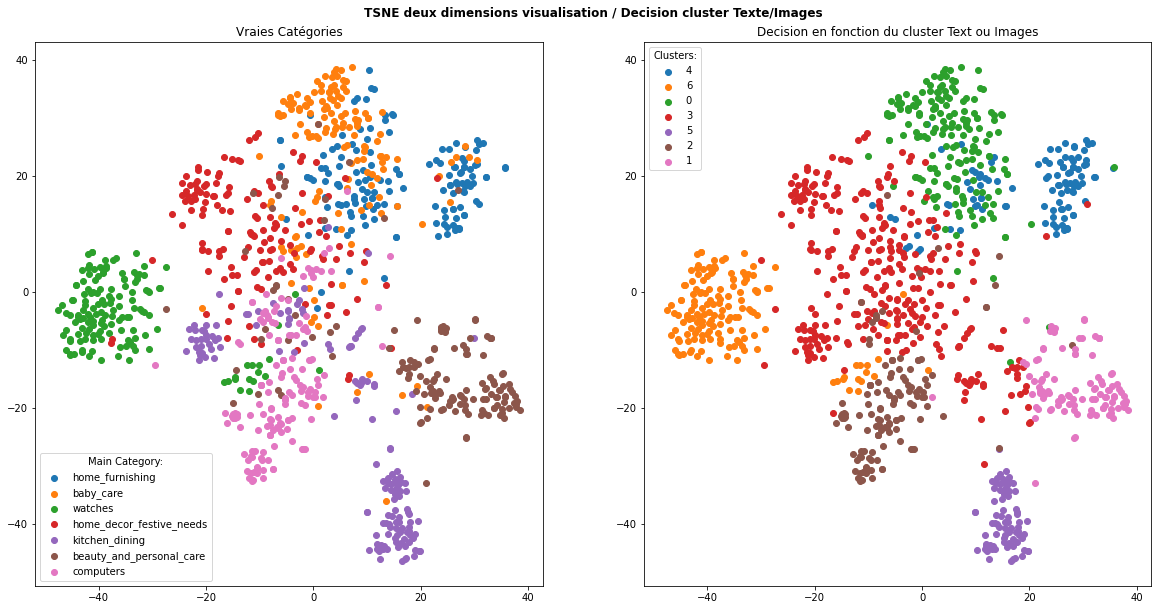

ARI score du clustering avec les vraies catégories: 0.4848667874834533


In [126]:
# plot true labels and cluster
tsne_red = manifold.TSNE(n_components=2, perplexity=30,
                         n_jobs=-1, random_state=0)
data_tsne_projected = tsne_red.fit_transform(X)
figure_tsne = plt.figure(figsize=(20, 10))
plt.title('TSNE deux dimensions visualisation / Decision cluster Texte/Images',
          fontweight='bold', pad=25)
plt.axis('off')
figure_tsne.add_subplot(1, 2, 1)
plt.title('Vraies Catégories')
for g in df_data['main_category'].unique():
    i = np.where(df_data['main_category'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.legend(title='Main Category:')
figure_tsne.add_subplot(1, 2, 2)
plt.title('Decision en fonction du cluster Text ou Images')
for g in df_data['Cluster_combine_text_images'].unique():
    i = np.where(df_data['Cluster_combine_text_images'] == g)
    plt.scatter(data_tsne_projected[i, 0], data_tsne_projected[i, 1], label=g)
plt.legend(title='Clusters:')
plt.show()
print(f"ARI score du clustering avec les vraies catégories: {metrics.adjusted_rand_score(df_data['True_labels'], df_data['Cluster_combine_text_images'])}")

#### Confusion matrix with real category and decision on combine kmeans text+Images

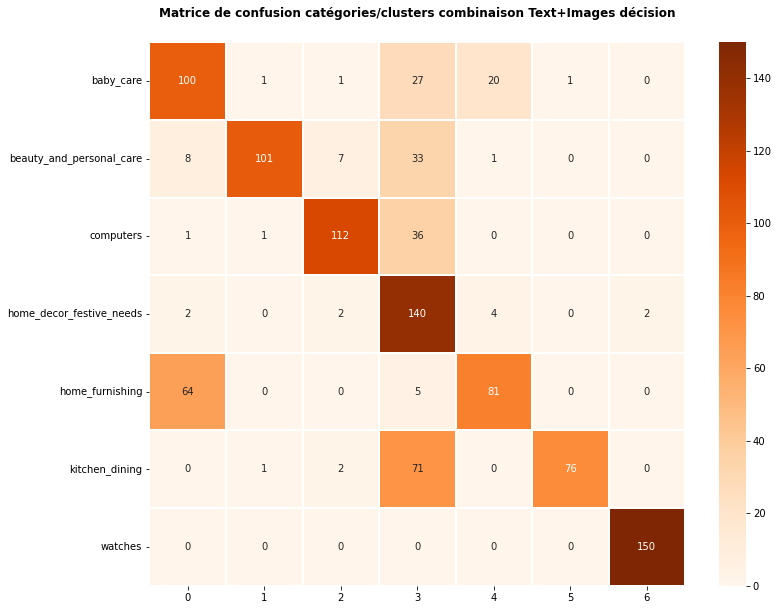

In [127]:
confu_m = metrics.confusion_matrix(
    df_data.True_labels, df_data.Cluster_combine_text_images)

df_confusion_m2 = pd.DataFrame(confu_m, index=label_encod.classes_,
                              columns=[0, 1, 2, 3, 4, 5, 6])
figure_confm = plt.figure(figsize=(12, 10))
plt.title('Matrice de confusion catégories/clusters combinaison Text+Images décision', fontweight='bold', pad=25)
sns.heatmap(df_confusion_m2, fmt='.3g',cmap='Oranges', annot=True, vmin=0, vmax=150, linewidths= 0.3)
plt.show()

#### Last results summary

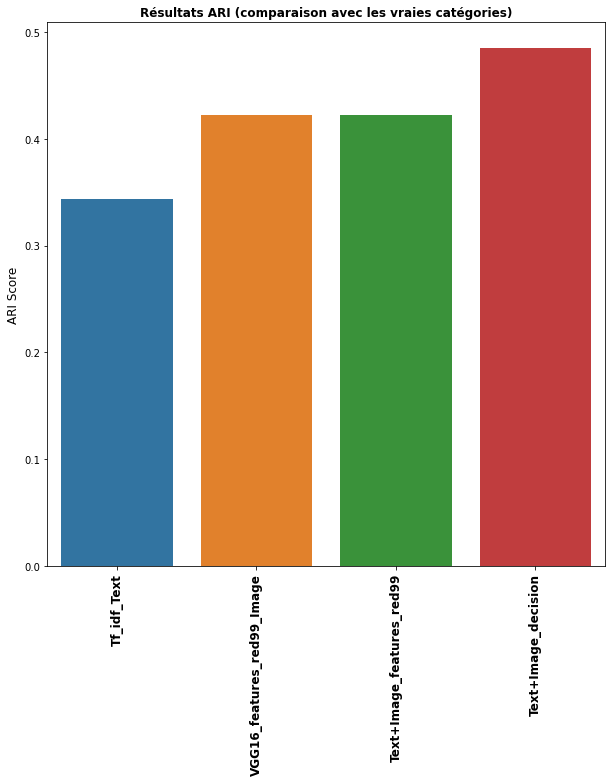

In [128]:
figure_summary = plt.figure(figsize=(10,10))
plt.title('Résultats ARI (comparaison avec les vraies catégories)', fontweight='bold')
sns.barplot(x = ['Tf_idf_Text', 'VGG16_features_red99_Image', 'Text+Image_features_red99', 'Text+Image_decision'] , 
            y = [0.343890, 0.422320, 0.422320, 0.48487])
plt.xticks(rotation=90, fontweight='bold', fontsize=12)
plt.xlabel('')
plt.ylabel( 'ARI Score', fontsize=12)
# plt.savefig('Résultats ARI finaux.jpg', dpi=300, bbox_inches='tight')
plt.show()

### **Trying visualization scatterplot with images to evaluate the interest of our features combines on clustering**

In [129]:
df_data_sample = df_data.groupby('main_category').sample(n=40, random_state=0).copy()

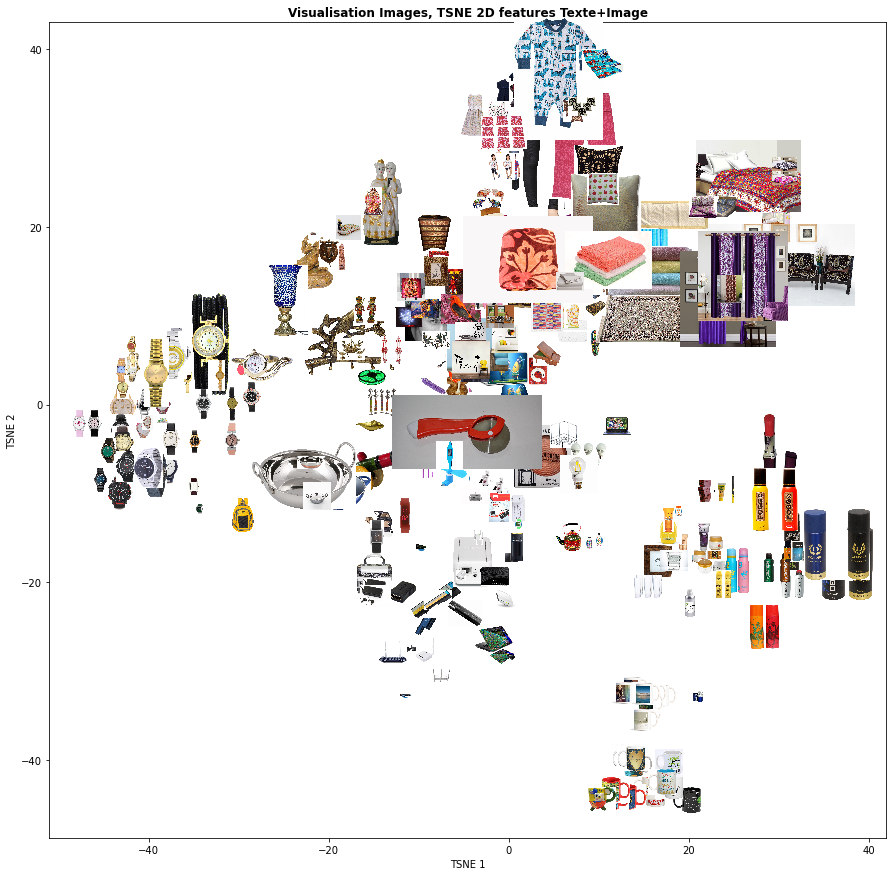

In [132]:
tsne_red = manifold.TSNE(n_components=2, perplexity=30,
                         n_jobs=-1, random_state=0)
# get sample data from feature text+images
X_sample = X[df_data_sample.index, :]
data_tsne_projected = tsne_red.fit_transform(X)
fig, ax = plt.subplots(figsize=(15,15))
plt.title('Visualisation Images, TSNE 2D features Texte+Image', fontweight='bold')
ax.scatter(data_tsne_projected[df_data_sample.index, 0], data_tsne_projected[df_data_sample.index, 1])
for x0, y0, path in zip(data_tsne_projected[df_data_sample.index, 0], data_tsne_projected[df_data_sample.index, 1],
                        (f'Images\\' + df_data_sample.image)):
    ab = AnnotationBbox(OffsetImage(plt.imread(path), zoom=0.025), (x0, y0), frameon=False)
    ax.add_artist(ab)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.savefig('ScatterplotImages.jpg', dpi=300, bbox_inches='tight')  
plt.show()